<a href="https://colab.research.google.com/github/joshdohler/FCTT_Project_3/blob/Diego/Project_3_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 2: Parametrisation**

**Automatic Separation of Pulses**

SOC Range: 90% - 100%
Pulse 1: Start Time: 16139.76901, End Time: 16239.633
Pulse 2: Start Time: 16749.931, End Time: 16849.79301
Pulse 3: Start Time: 17370.091, End Time: 17469.957
Pulse 4: Start Time: 17980.255, End Time: 18080.119
Pulse 5: Start Time: 18600.417, End Time: 18700.27901
Pulse 6: Start Time: 19210.577, End Time: 19310.437
Pulse 7: Start Time: 19835.735, End Time: 19935.599
Pulse 8: Start Time: 20445.897, End Time: 20545.759
SOC Range: 80% - 90%
Pulse 1: Start Time: 37236.148, End Time: 37336.012
Pulse 2: Start Time: 37846.31, End Time: 37946.172
Pulse 3: Start Time: 38466.47, End Time: 38566.334
Pulse 4: Start Time: 39076.632, End Time: 39176.494
Pulse 5: Start Time: 39696.79201, End Time: 39796.656
Pulse 6: Start Time: 40306.954, End Time: 40406.81601
Pulse 7: Start Time: 40932.114, End Time: 41031.974
Pulse 8: Start Time: 41542.272, End Time: 41642.136
SOC Range: 70% - 80%
Pulse 1: Start Time: 58332.302, End Time: 58432.164
Pulse 2: Start Time: 58942.462, End Time: 59

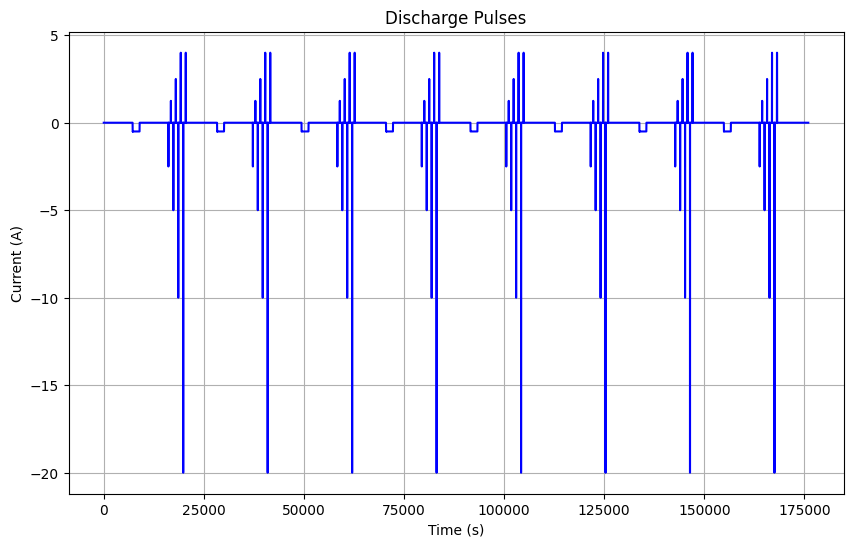

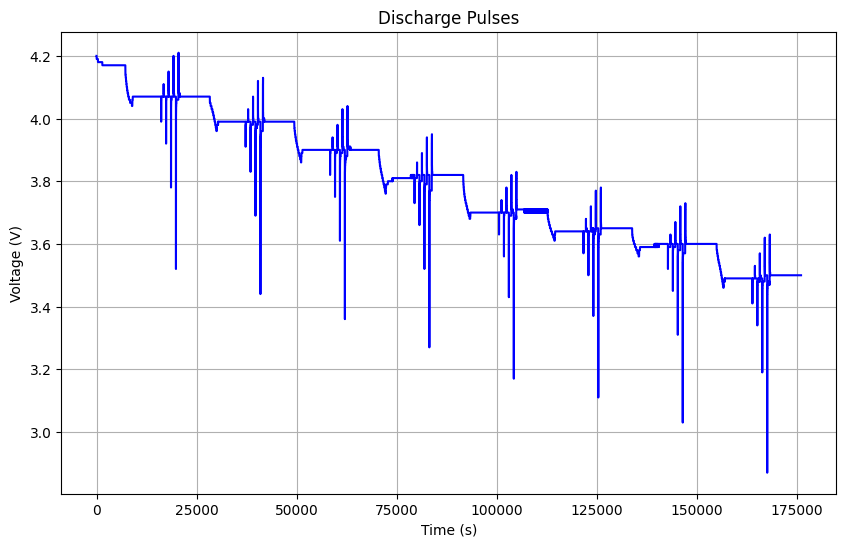

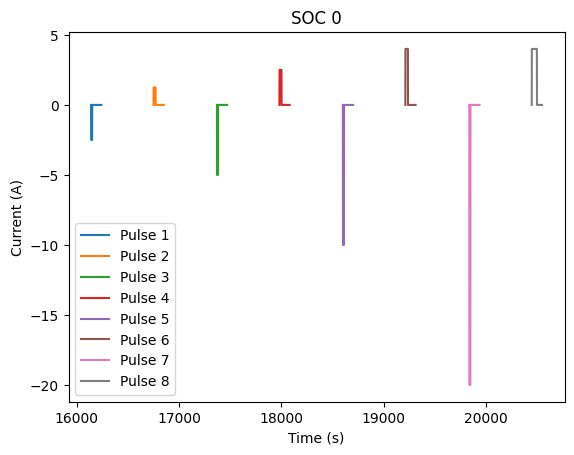

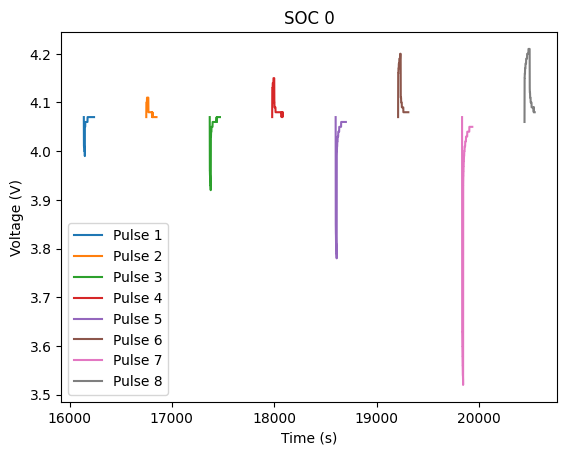

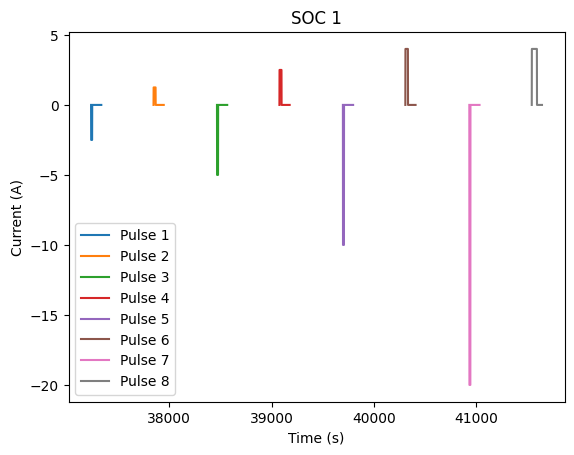

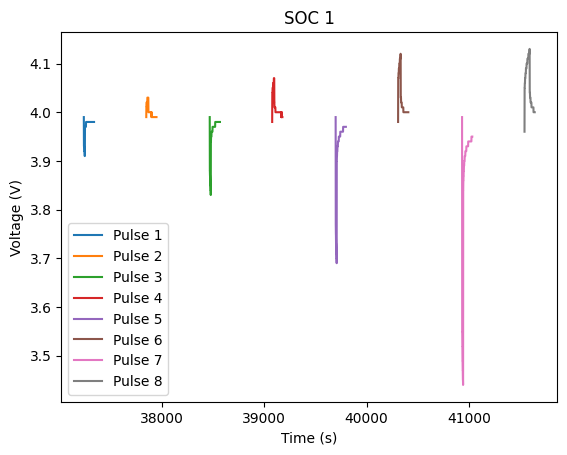

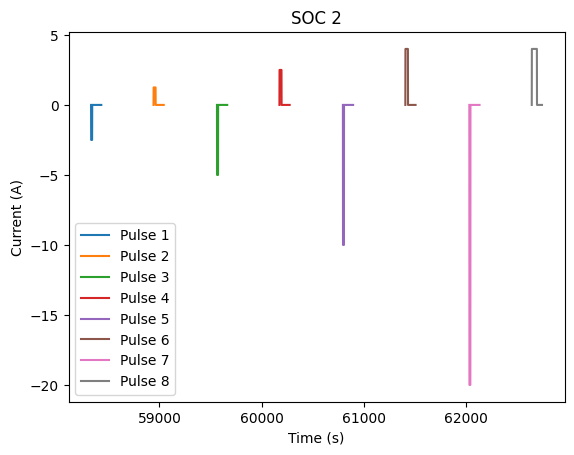

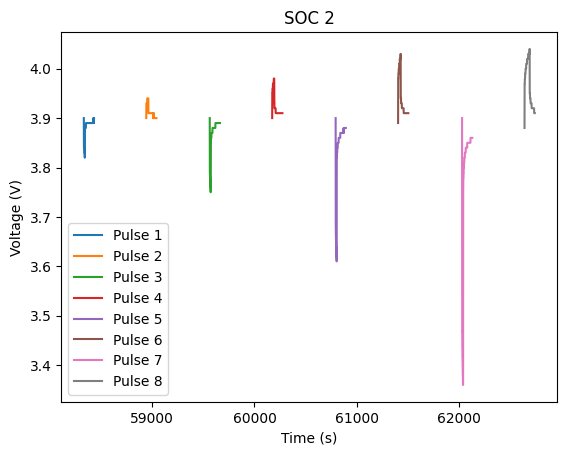

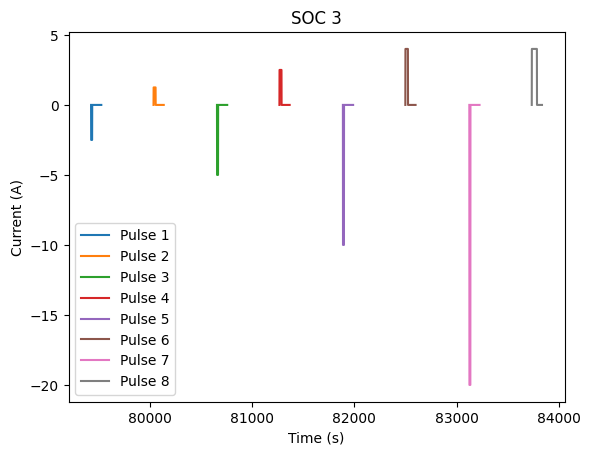

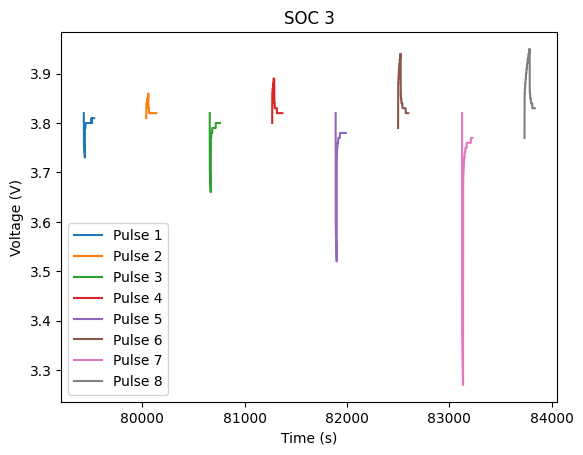

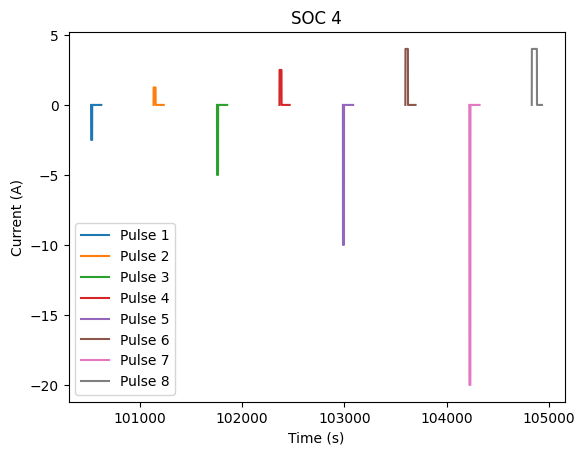

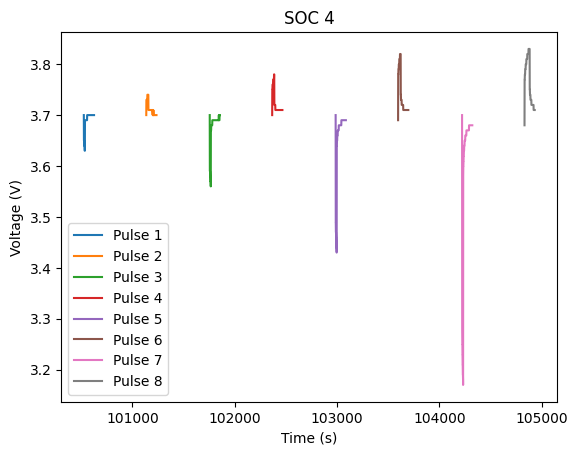

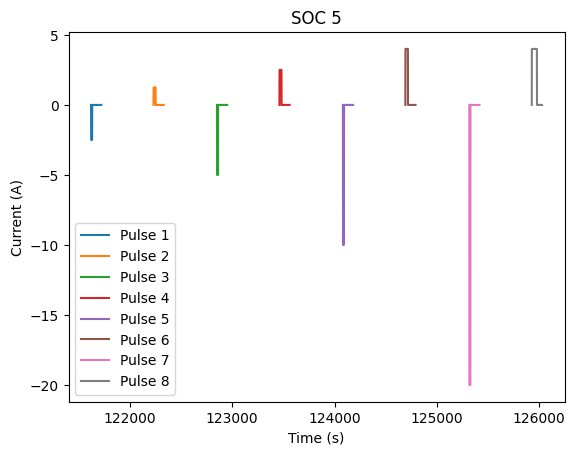

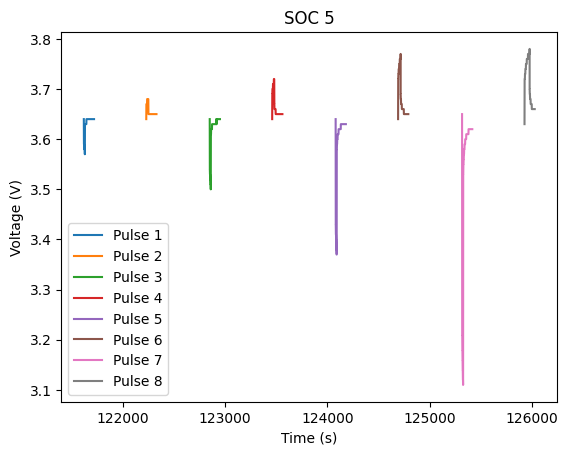

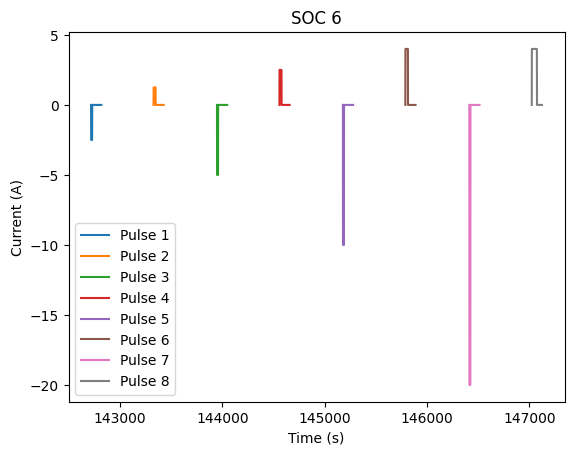

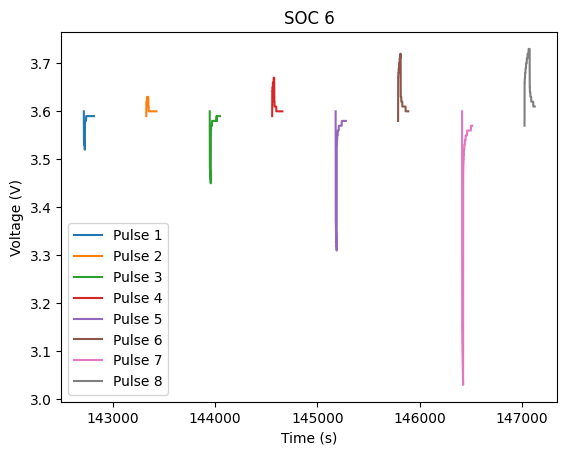

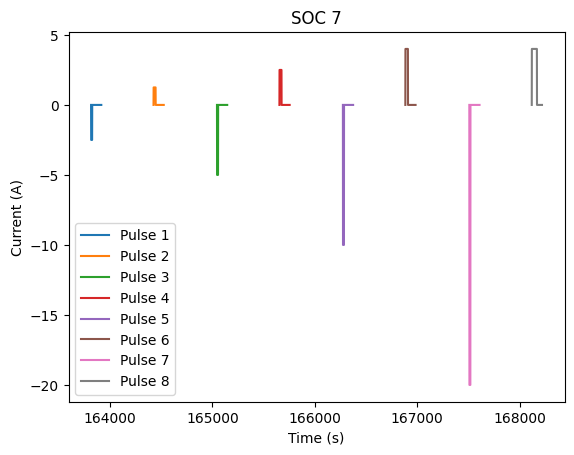

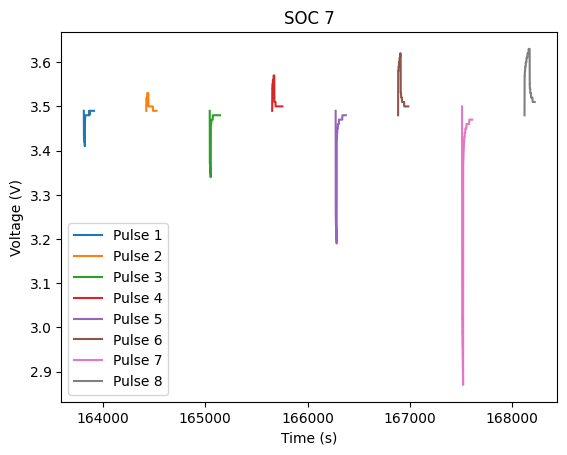

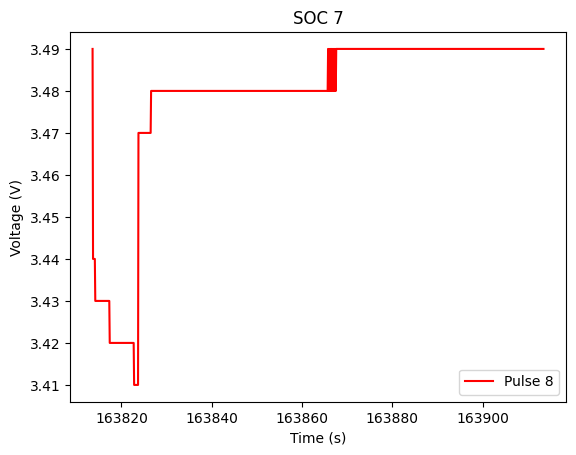

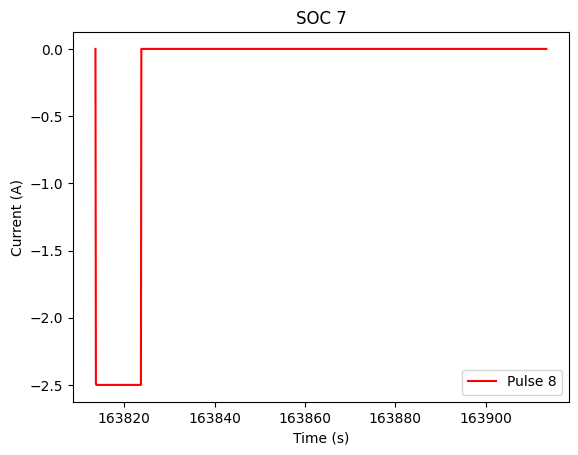

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV file containing training data Temp: 20ºC
df = pd.read_csv('Model_Training_Data_20.csv')
t = np.array(df['Time (s)'][:])
I = np.array(df['Current (A)'][:])
V = np.array(df['Voltage (V)'][:])

# Plot Data - Current
plt.figure(1, figsize=(10, 6))
plt.plot(t, I, label='Current (A)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Discharge Pulses')
plt.grid(True)

# Plot Data - Voltage
plt.figure(2, figsize=(10, 6))
plt.plot(t, V, label='Voltage (V)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Discharge Pulses')
plt.grid(True)

def identifypulses(I, threshold=0.5, pulse_duration=10):
    pulses = []
    in_pulse = False
    pulse_start = 0

    for i in range(1, len(I)):
        if abs(I[i] - I[i-1]) > threshold:
            if not in_pulse:
                pulse_start = i - 1
                in_pulse = True
        elif in_pulse:
            if i - pulse_start >= pulse_duration * 100:  # Check if pulse duration is approximately 10 seconds
                pulses.append((pulse_start, i))
                in_pulse = False
    return pulses

# Analyze pulses for the full data range
pulses = identifypulses(I)
pulsestimes = []

for start, end in pulses:
  tpulsestart = t[start]
  tpulsesend = t[end-1]
  pulsestimes.append((tpulsestart, tpulsesend))

# Divide list: 8 subsections - 8 SOC levels
nSOCs = 8
nPulsesSOC = 8
SOCpulseintervals = [[] for _ in range(nSOCs)]

for i, (tstart, tend) in enumerate(pulsestimes):
    SOCindex = i // nPulsesSOC
    SOCpulseintervals[SOCindex].append((tstart, tend))

# Print the identified pulse intervals for each SOC range
for idx, pulses in enumerate(SOCpulseintervals):
    SOCstart = 90 - idx * 10
    SOCend = 100 - idx * 10
    print(f"SOC Range: {SOCstart}% - {SOCend}%")
    for pulse_idx, (start, end) in enumerate(pulses):
        print(f"Pulse {pulse_idx + 1}: Start Time: {start}, End Time: {end}")

# SOCind: list to hold results
SOCind = []

pp1 = 4
pp2 = 13

for i in range(8):
    SOC = SOCpulseintervals[i]
    Pulse = []
    plt.figure(pp1)
    plt.figure(pp2)
    tpulse = np.zeros((1000, 8))
    Ipulse = np.zeros((1000, 8))
    Vpulse = np.zeros((1000, 8))
    for j in range(8):
        pulserange = SOC[j]
        # Use NumPy indexing to find matching time indices
        k_indices = np.where((t >= pulserange[0]) & (t <= pulserange[1]))[0]
        # Populate corresponding pulse data
        tpulse[:len(k_indices), j] = t[k_indices]
        Ipulse[:len(k_indices), j] = I[k_indices]
        Vpulse[:len(k_indices), j] = V[k_indices]

        # Plot
        plt.figure(pp1)
        plt.plot(tpulse[:, j], Ipulse[:, j], label=f'Pulse {j+1}')
        plt.title(f'SOC {i}')
        plt.xlabel('Time (s)')
        plt.ylabel('Current (A)')
        plt.legend()
        plt.figure(pp2)
        plt.plot(tpulse[:, j], Vpulse[:, j], label=f'Pulse {j+1}')
        plt.title(f'SOC {i}')
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.legend()

        Pulse.append([j, np.copy(tpulse[:, j]), np.copy(Ipulse[:, j]), np.copy(Vpulse[:, j])])
    pp1 = pp1+1
    pp2 = pp2+1
    SOCind.append(Pulse)

plt.figure(3)
plt.plot(tpulse[:, 0], Vpulse[:, 0], label=f'Pulse {j+1}', color='red')
plt.title(f'SOC {i}')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()

fig, ax = plt.subplots()
plt.plot(tpulse[:, 0], Ipulse[:, 0], label=f'Pulse {j+1}', color='red')
plt.title(f'SOC {i}')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()

**Part A: *Ballpark Eq*. Pulse Voltage Variables (R0, R1, C1)**

Parameters (First Order ECN): 0.020000000000000018 0.010000000000000009 966.4000000004298


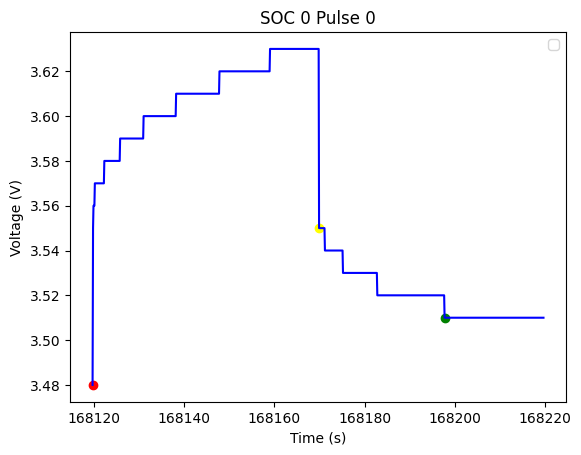

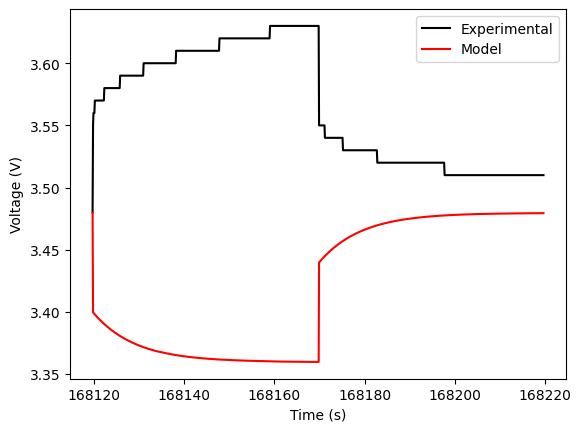

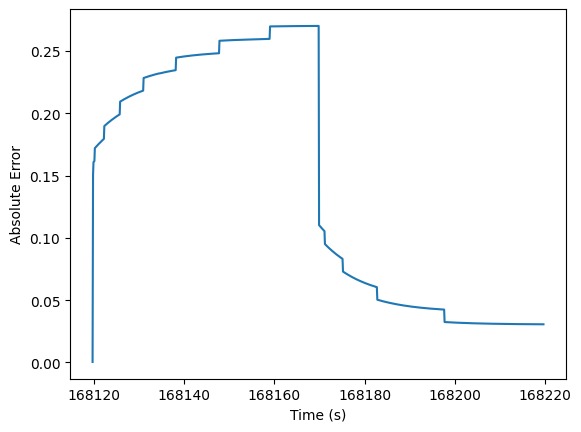

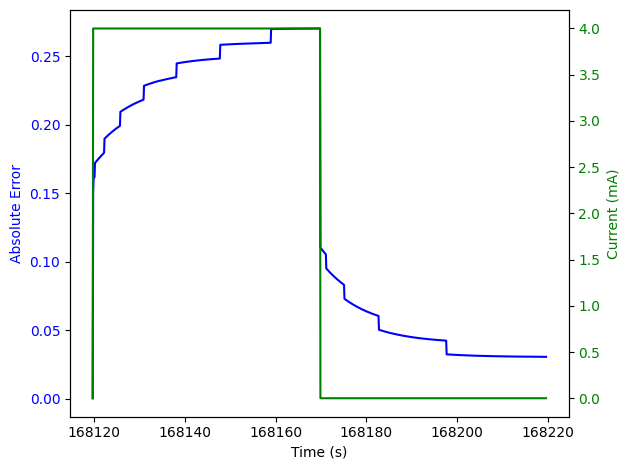

Parameters (First Order ECN): 0.02400000000000002 0.008000000000000007 1398.75000000029


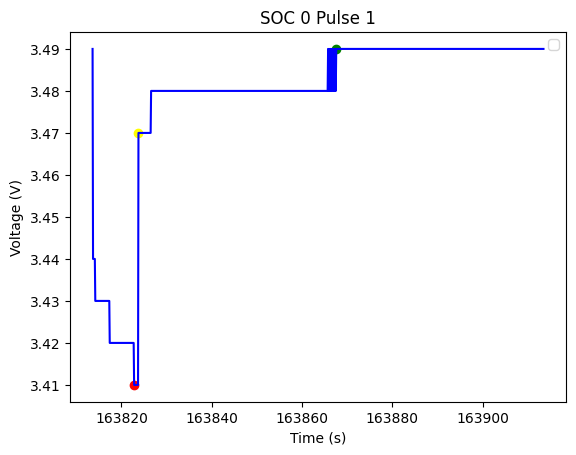

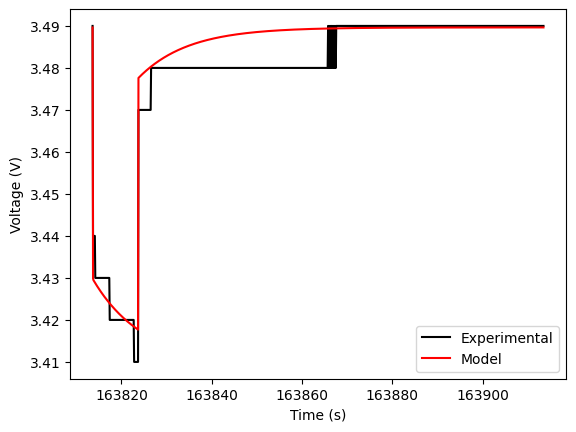

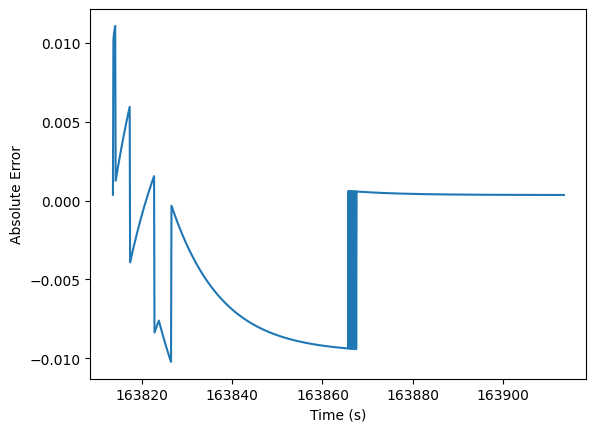

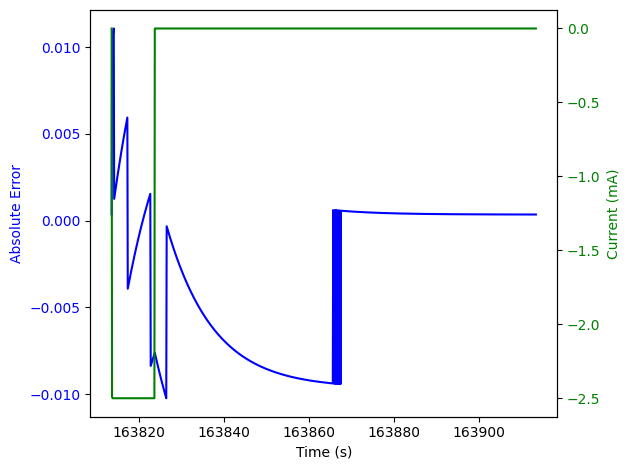

Parameters (First Order ECN): 0.016000000000000014 0.01599999999999966 882.1875000003462


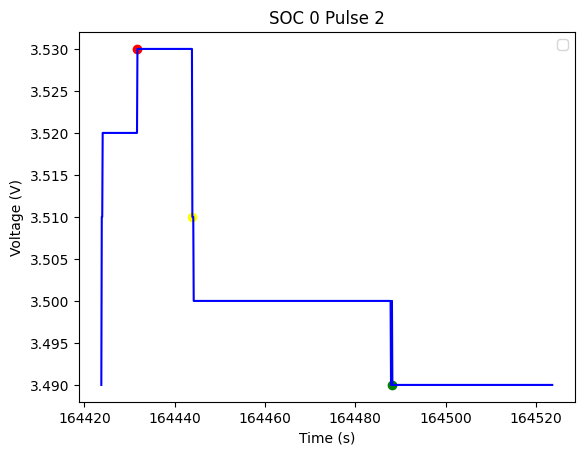

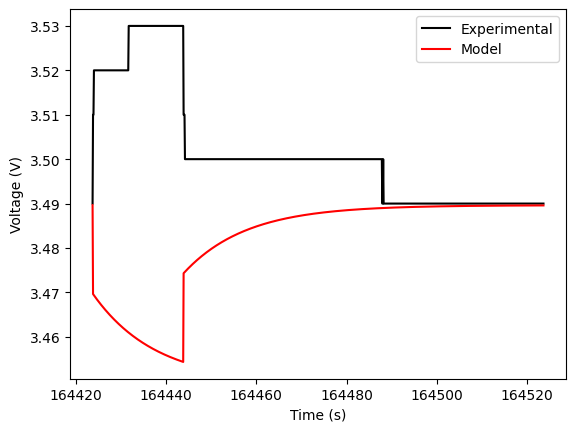

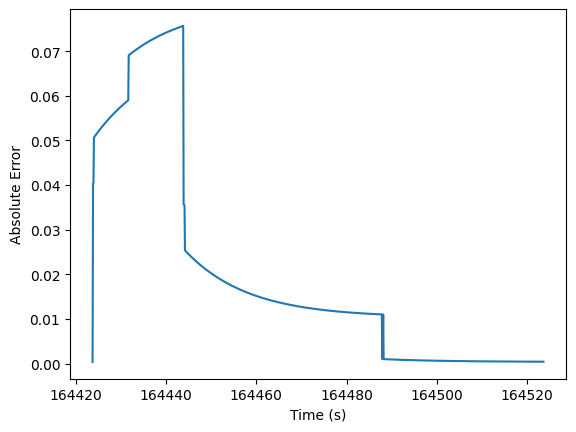

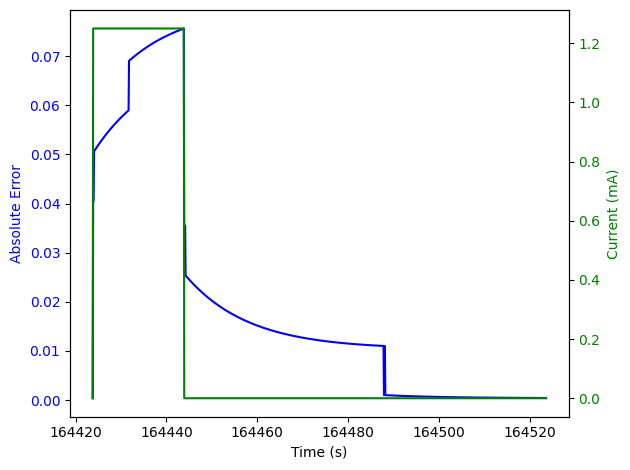

Parameters (First Order ECN): 0.022000000000000065 0.00599999999999996 914.9999999996666


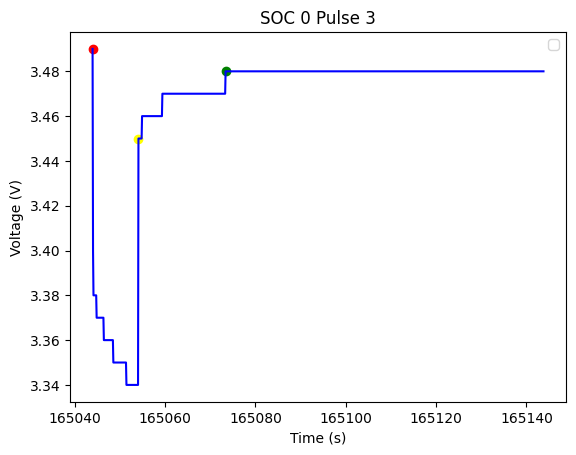

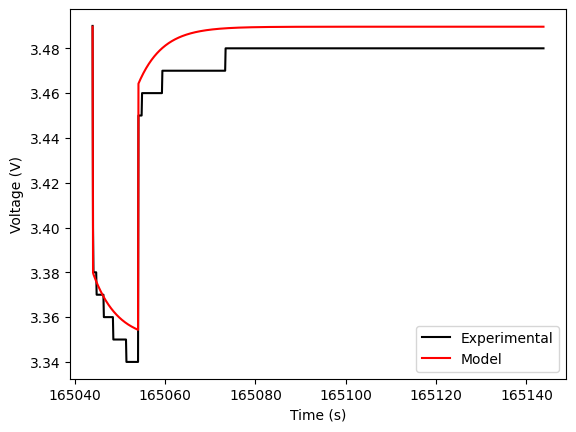

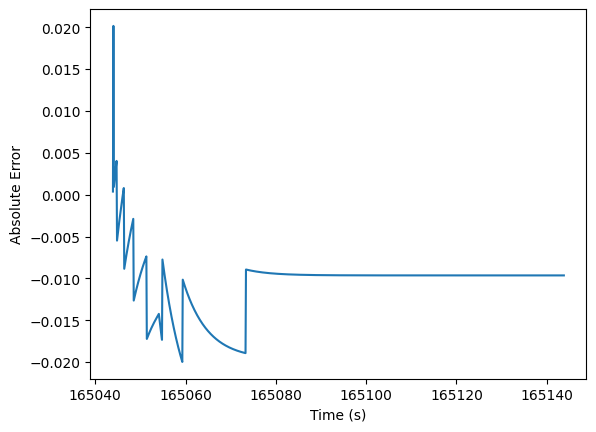

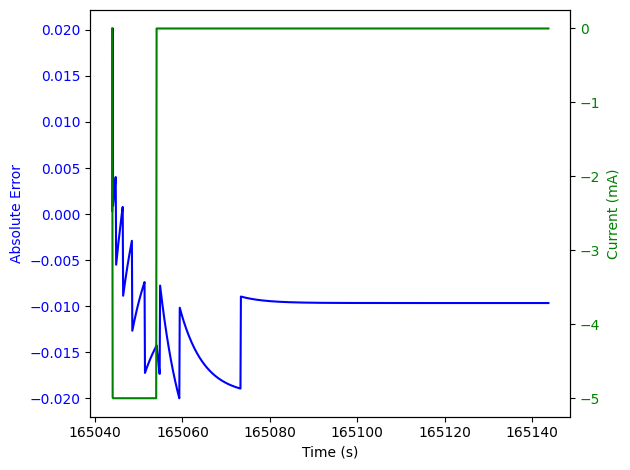

Parameters (First Order ECN): 0.019999999999999928 0.008000000000000007 608.1874999999849


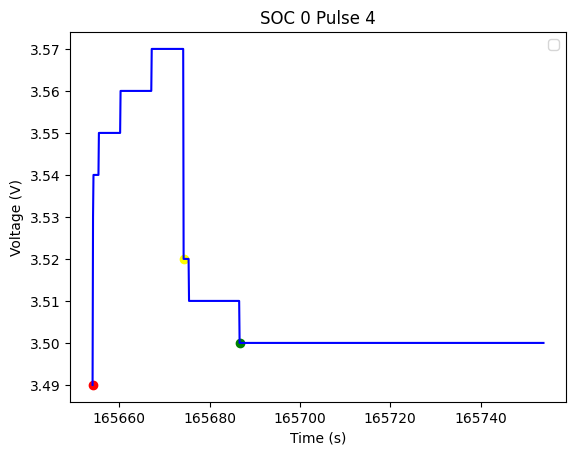

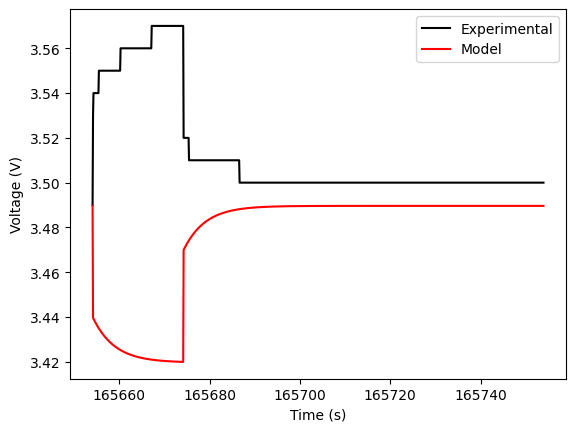

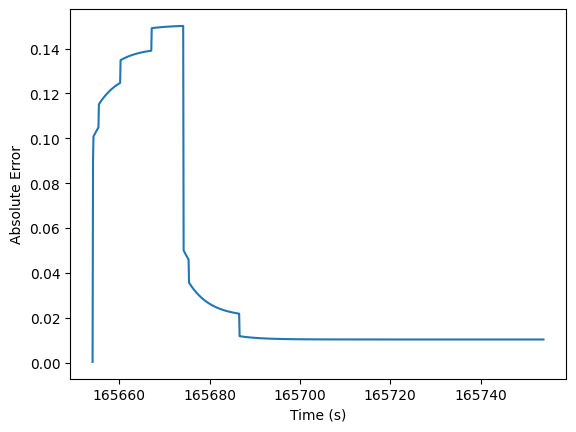

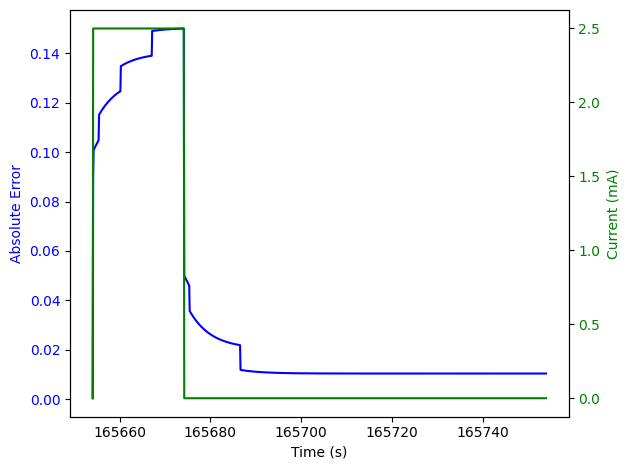

Parameters (First Order ECN): 0.02200000000000002 0.006999999999999985 2034.2142857137246


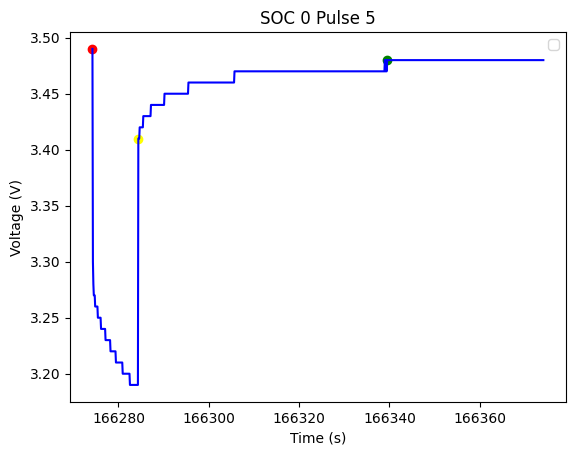

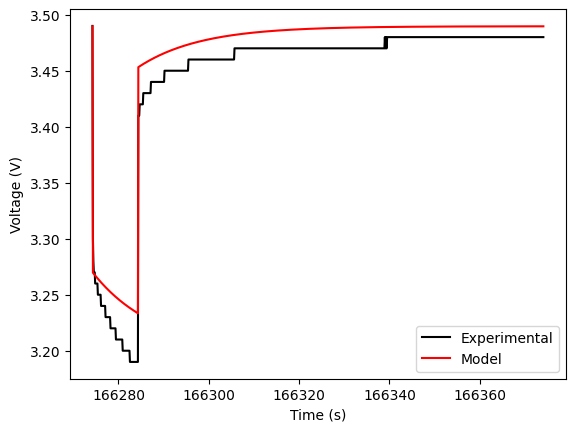

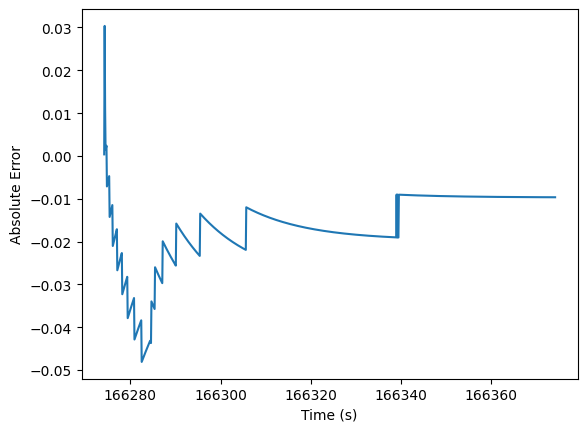

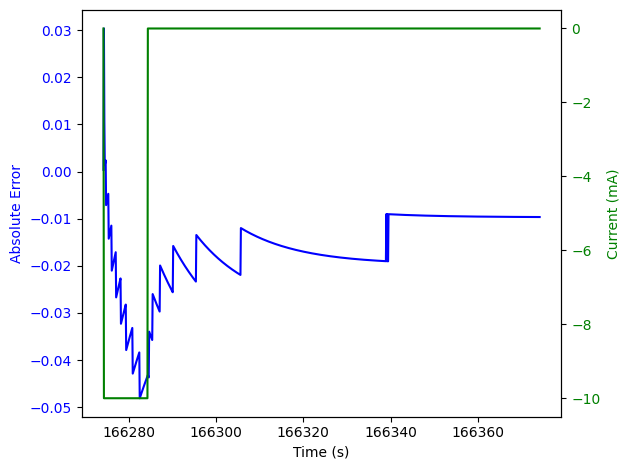

Parameters (First Order ECN): 0.020000000000000018 0.010000000000000009 984.0000000003774


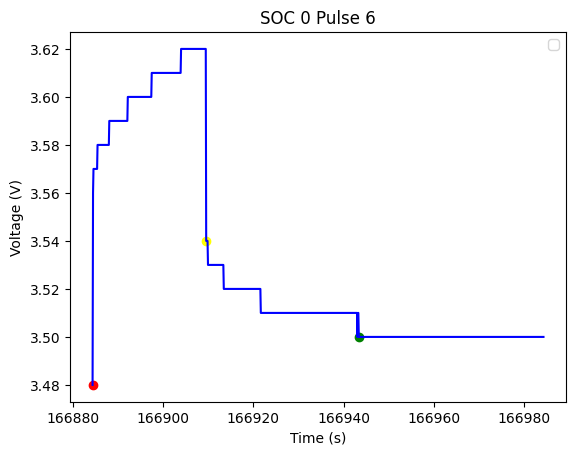

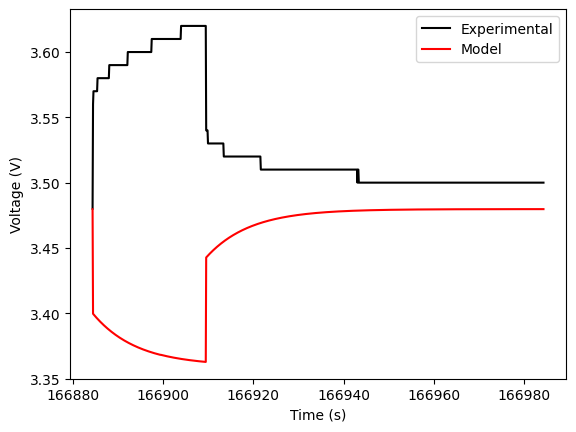

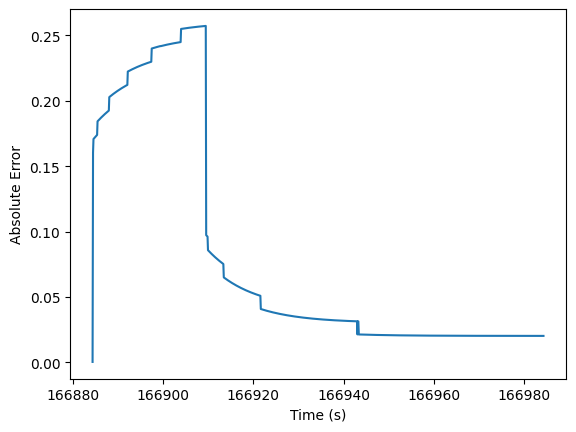

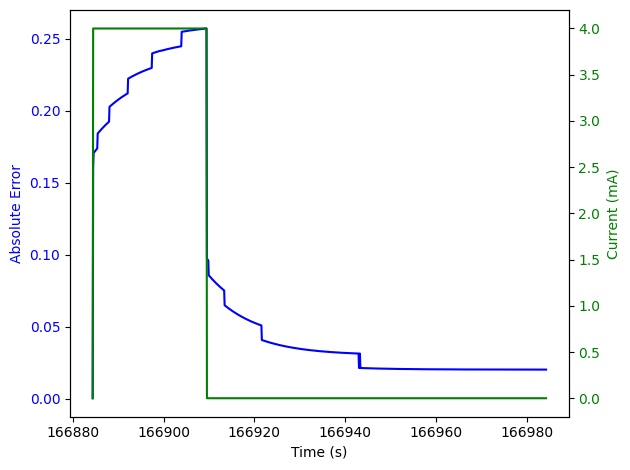

Parameters (First Order ECN): 0.022499999999999985 0.0075000000000000205 1988.7333333337003


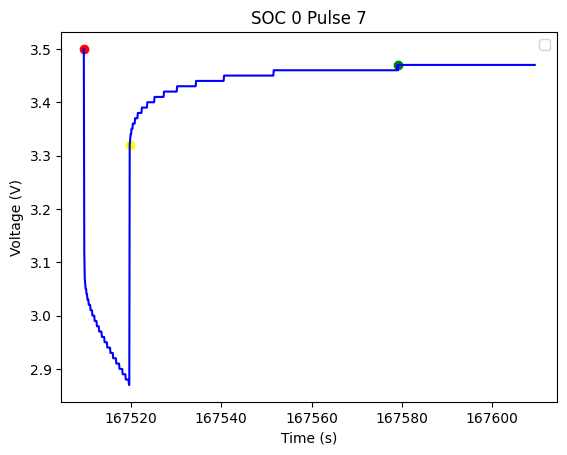

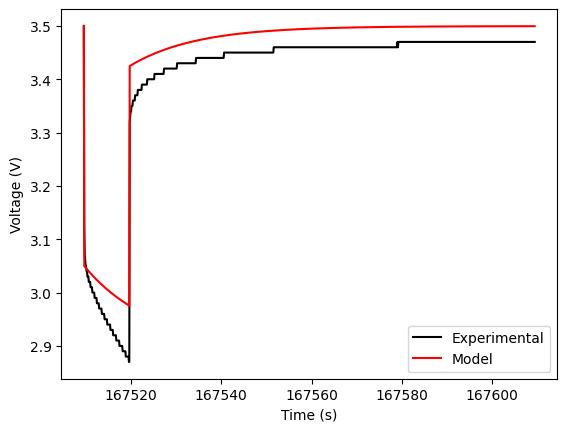

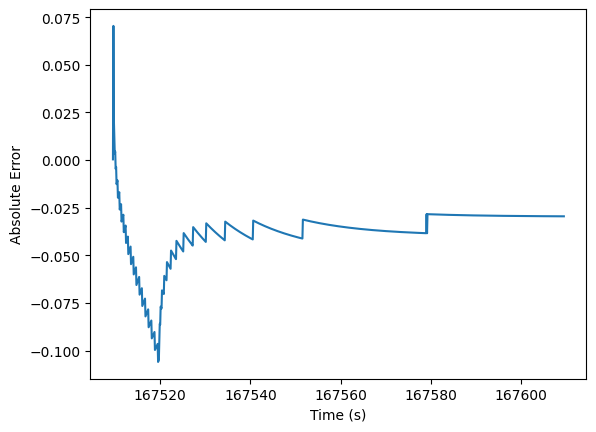

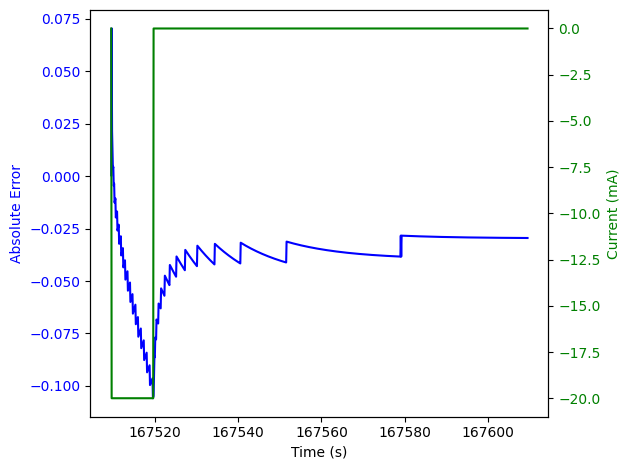

Parameters (First Order ECN): 0.020000000000000018 0.012499999999999956 1067.1600000000074


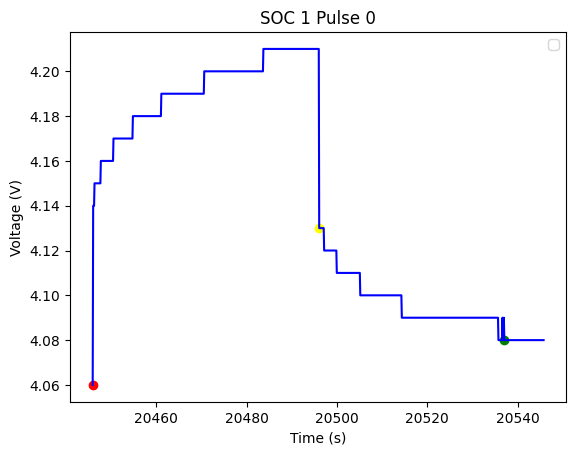

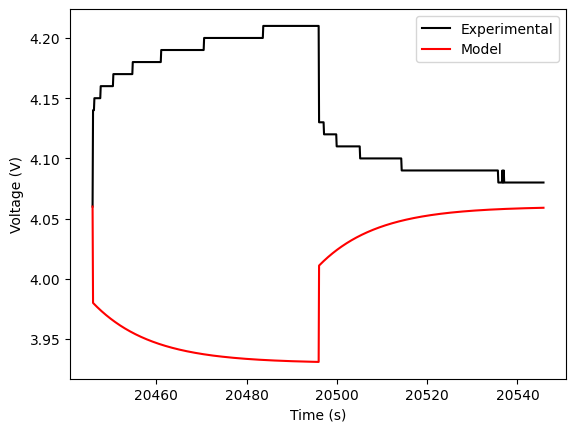

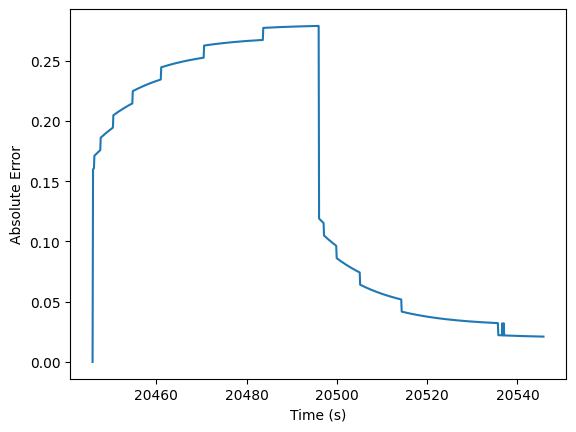

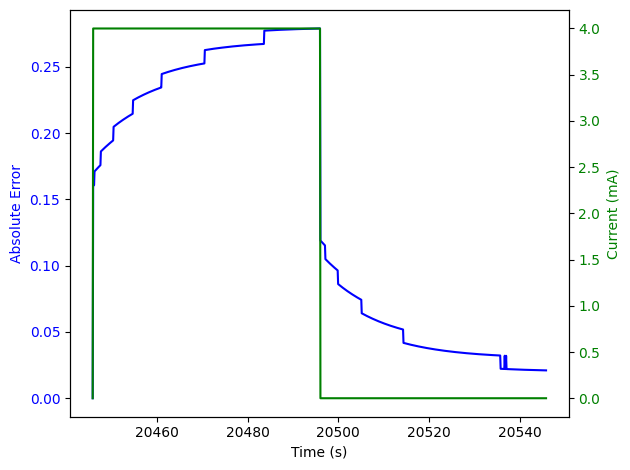

Parameters (First Order ECN): 0.023999999999999844 0.008000000000000184 826.8750000000106


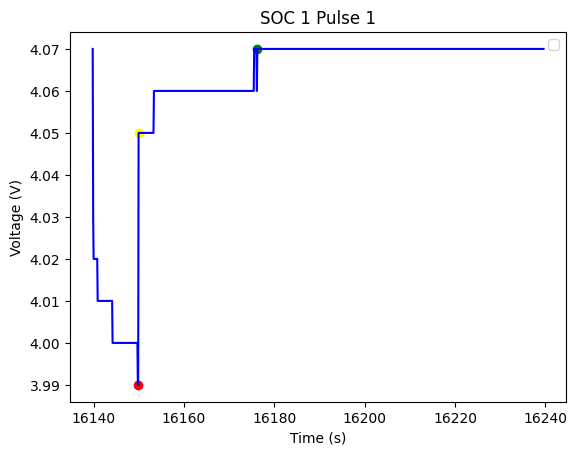

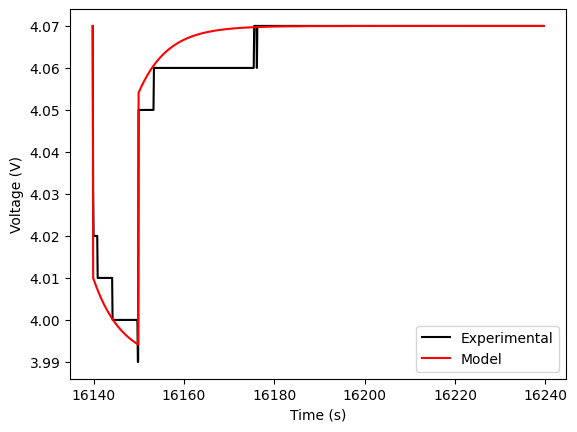

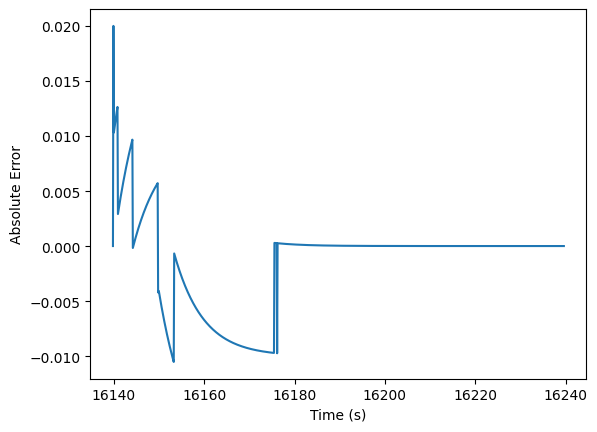

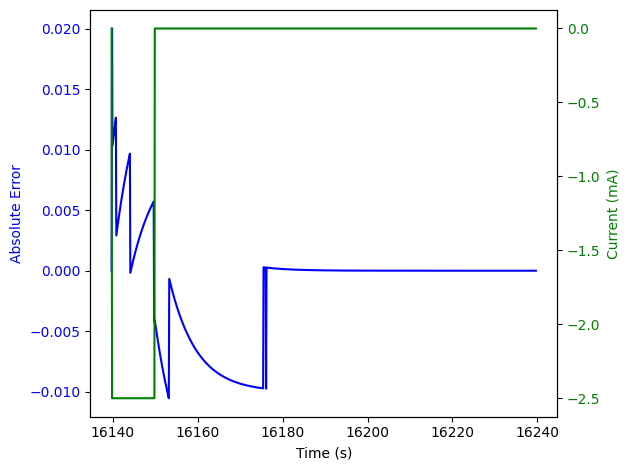

Parameters (First Order ECN): 0.016000000000000368 0.01599999999999966 832.1562499999862


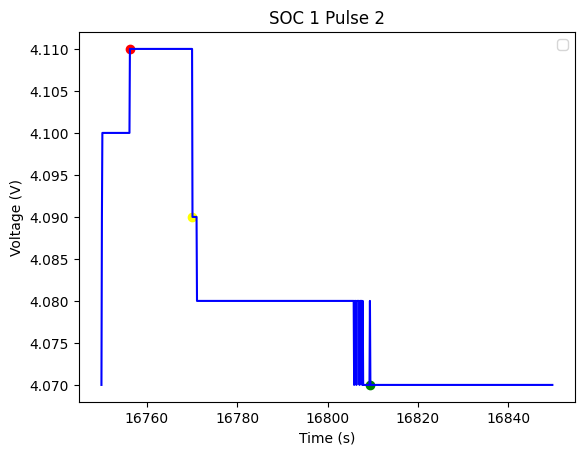

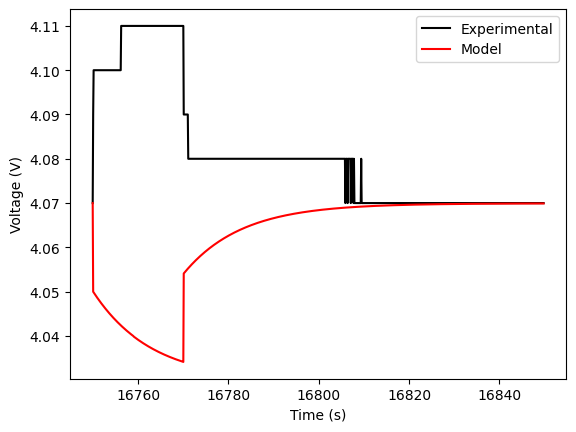

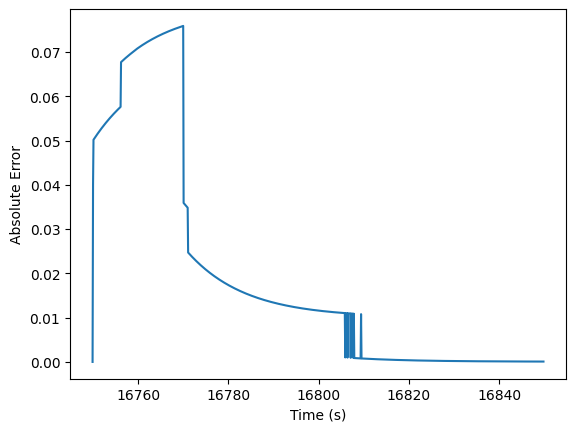

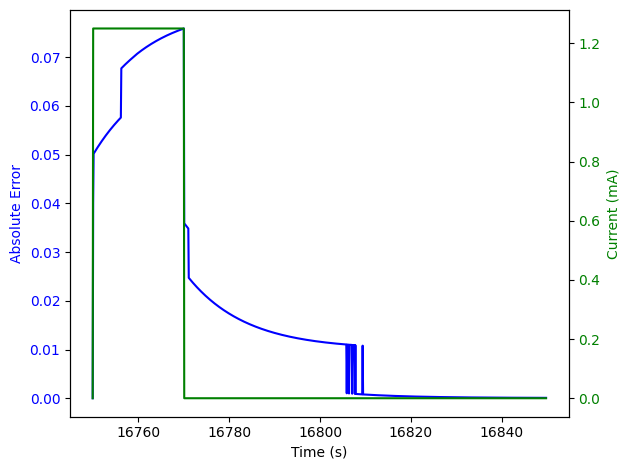

Parameters (First Order ECN): 0.019999999999999928 0.010000000000000144 1511.5499999999665


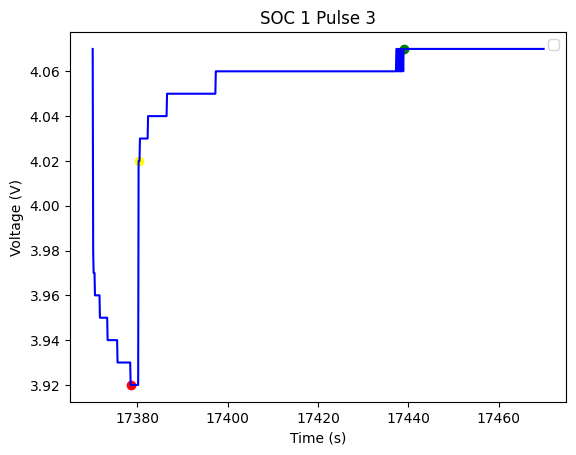

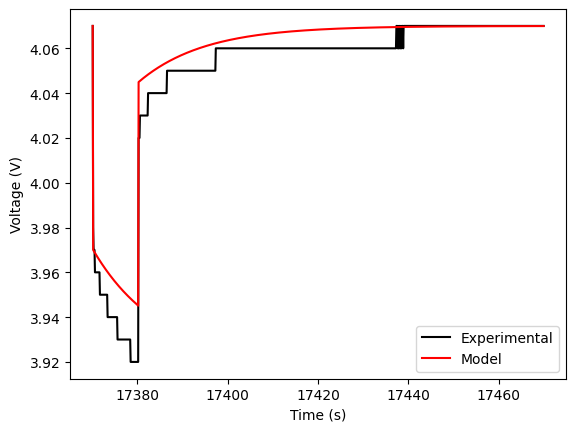

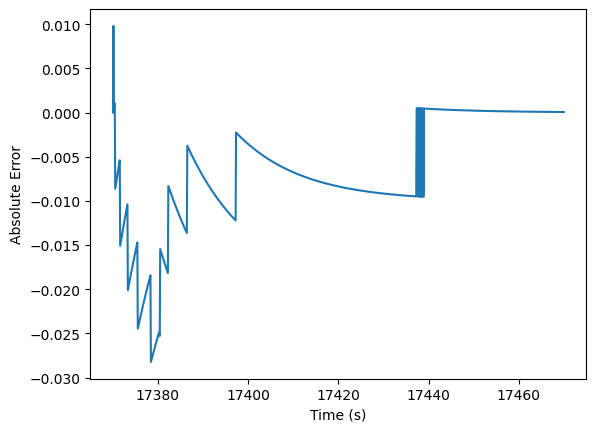

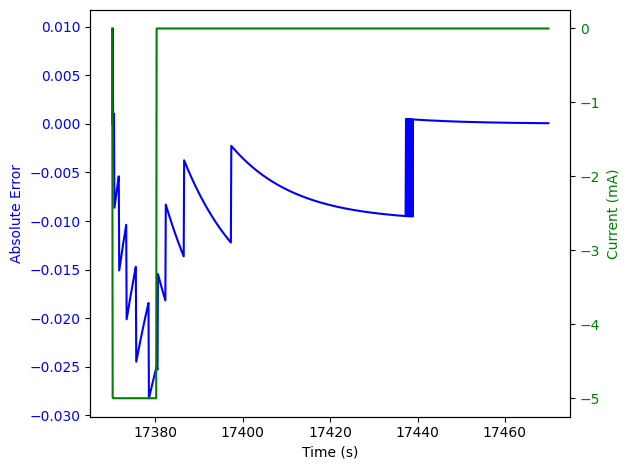

Parameters (First Order ECN): 0.020000000000000285 0.00799999999999983 626.8125000000415


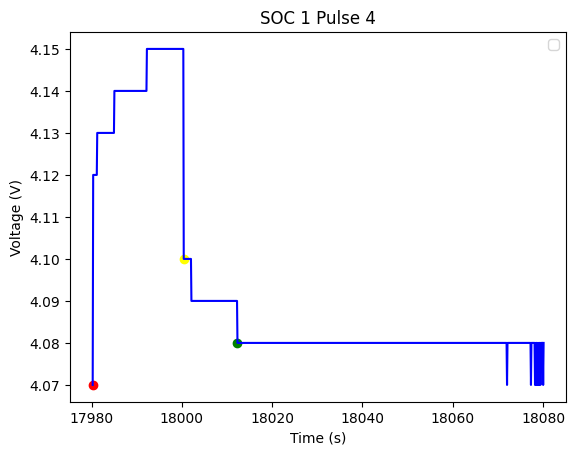

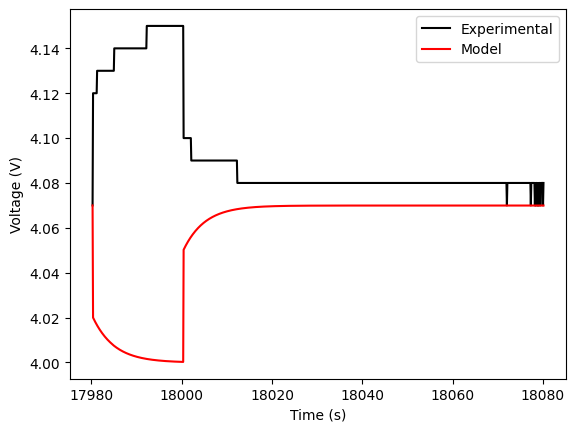

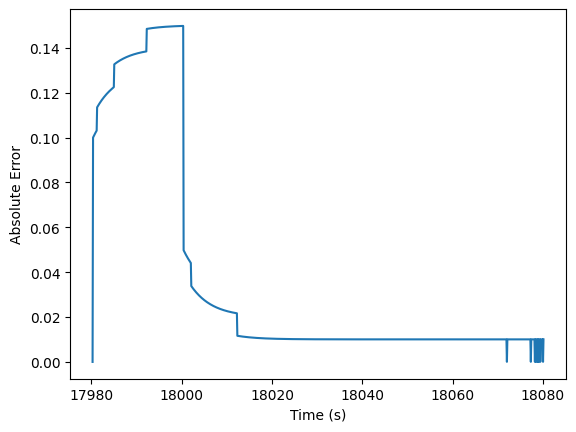

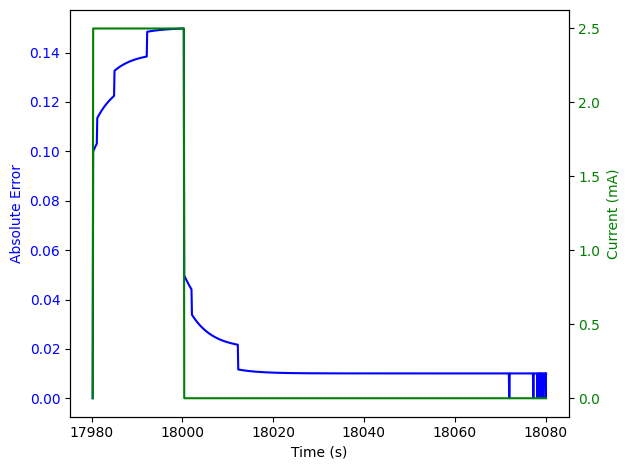

Parameters (First Order ECN): 0.020000000000000018 0.007999999999999962 1376.9374999999466


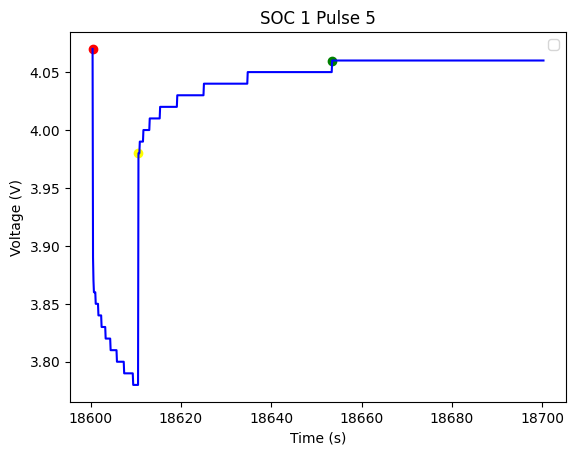

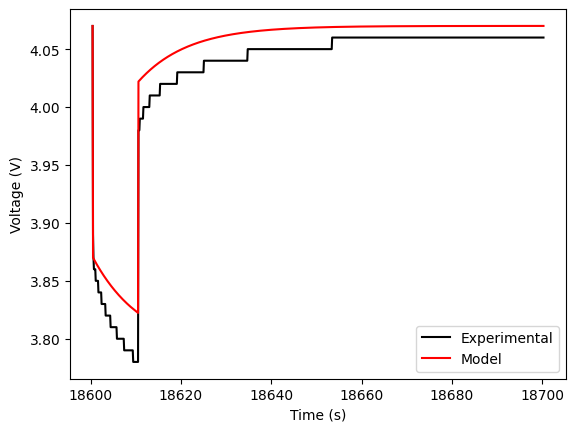

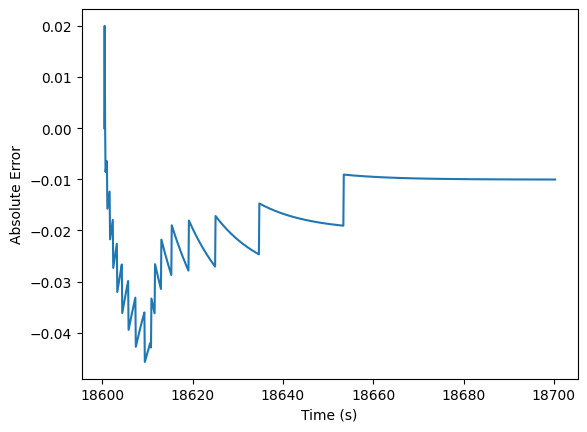

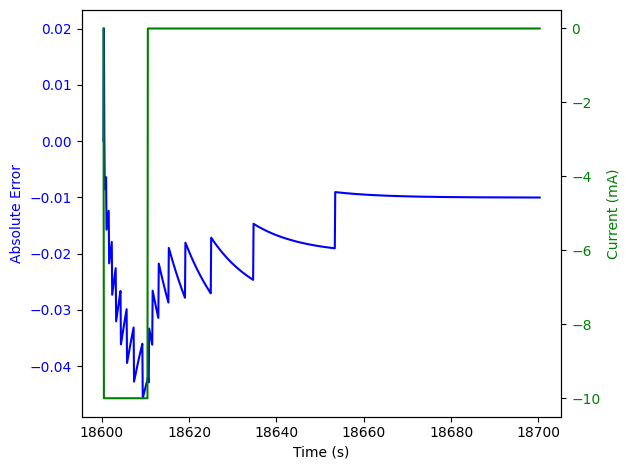

Parameters (First Order ECN): 0.020000000000000018 0.010000000000000009 803.900249999969


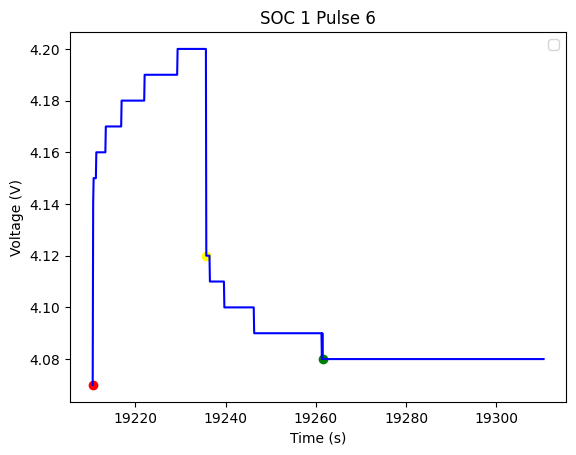

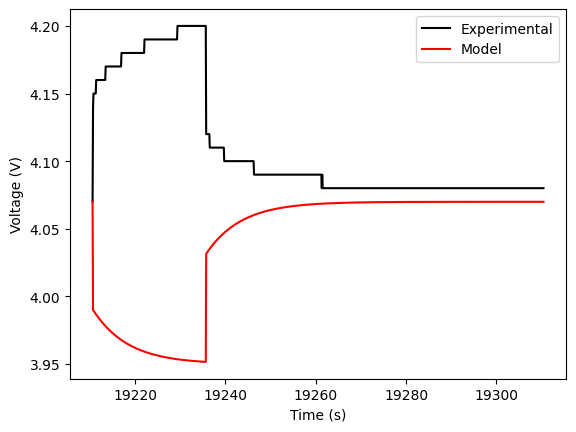

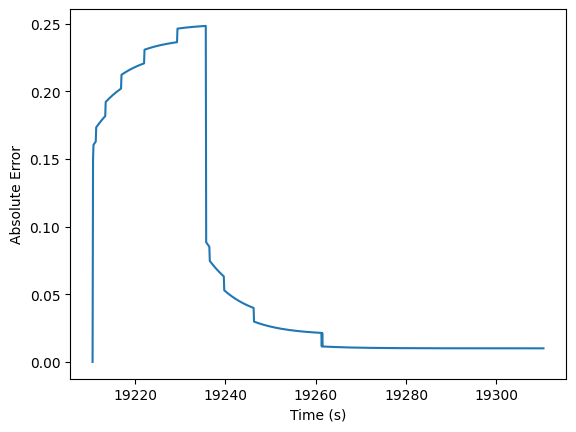

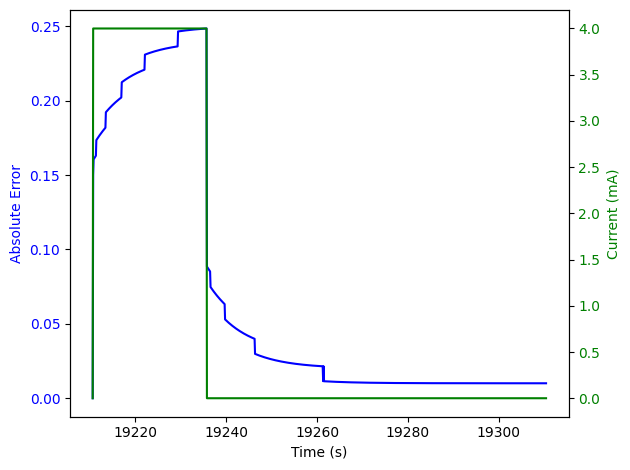

Parameters (First Order ECN): 0.018999999999999996 0.007499999999999993 2028.6666666666881


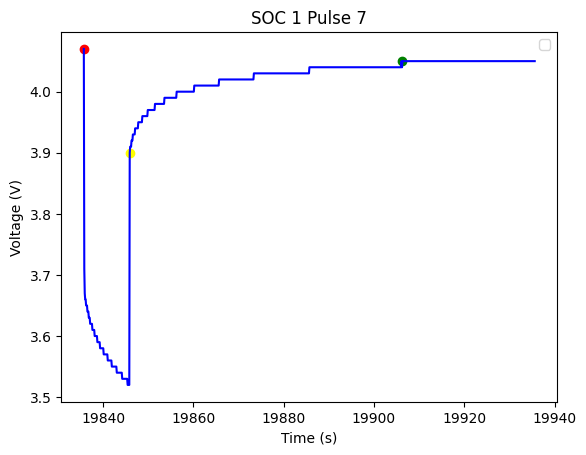

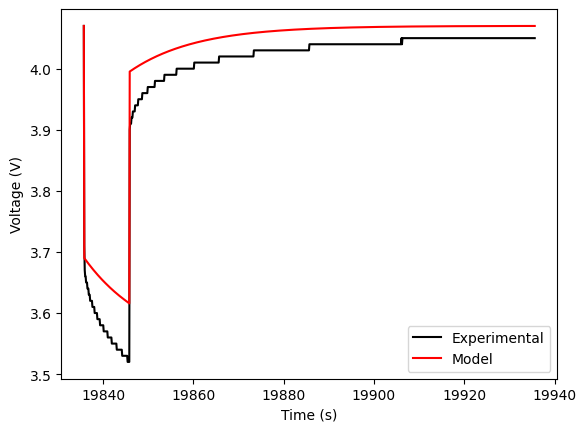

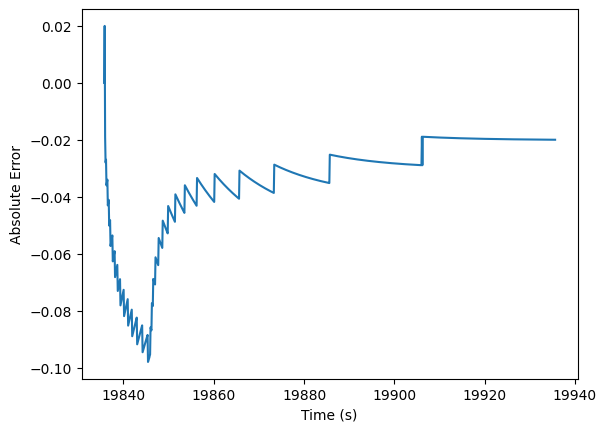

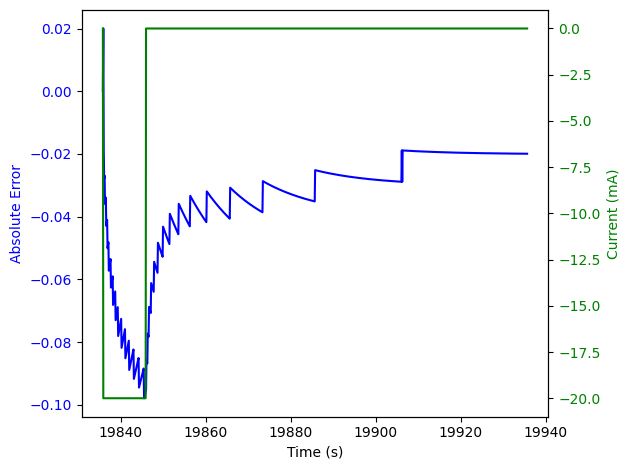

Parameters (First Order ECN): 0.022499999999999964 0.010000000000000009 971.600000000034


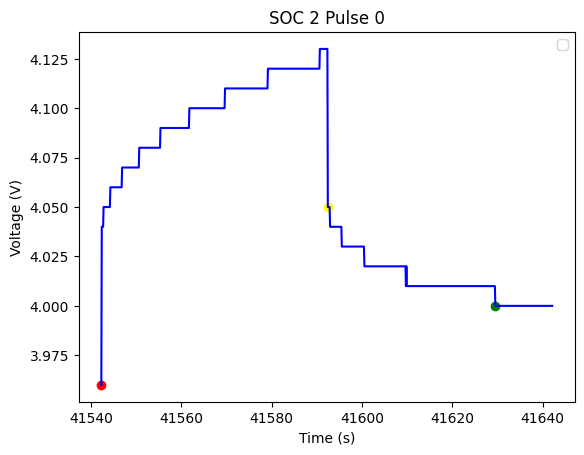

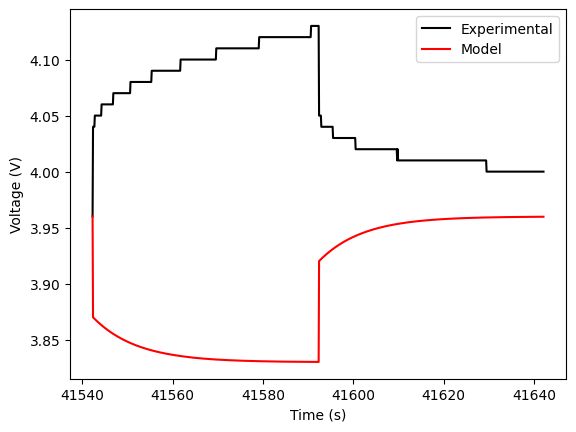

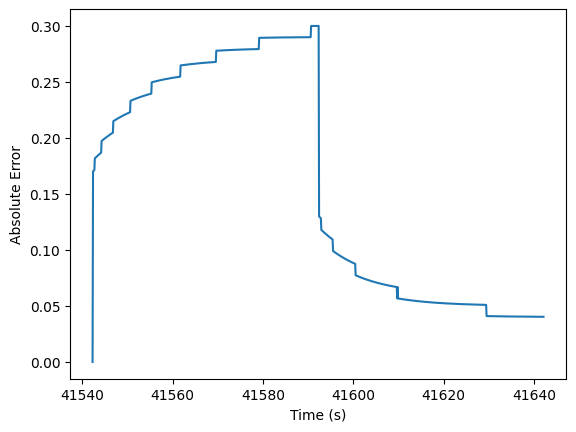

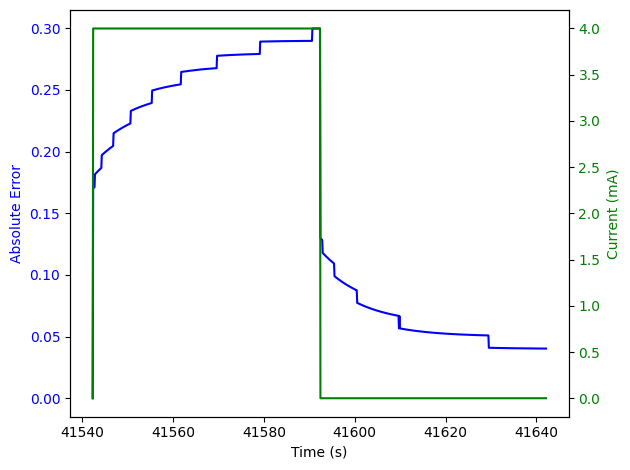

Parameters (First Order ECN): 0.019999999999999928 0.008000000000000007 405.12499999999784


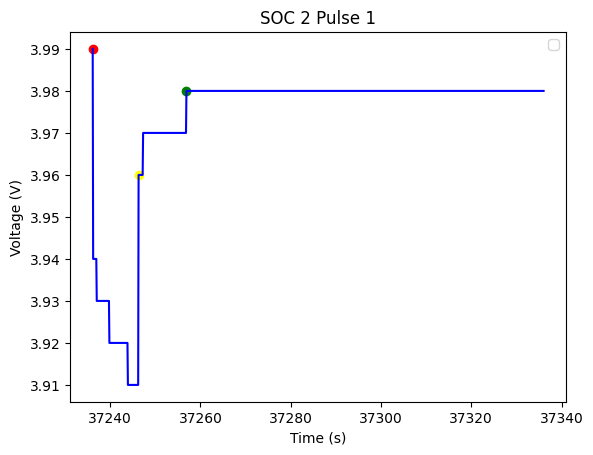

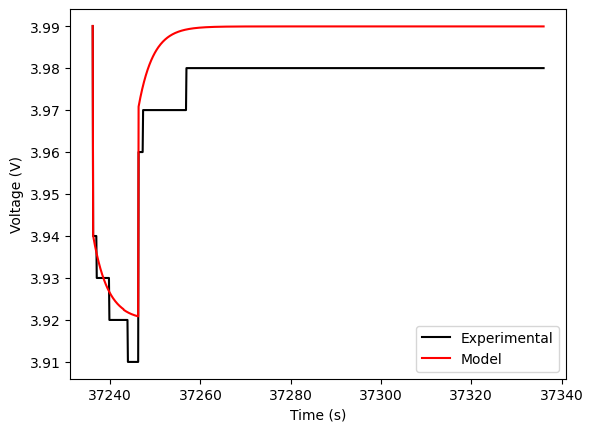

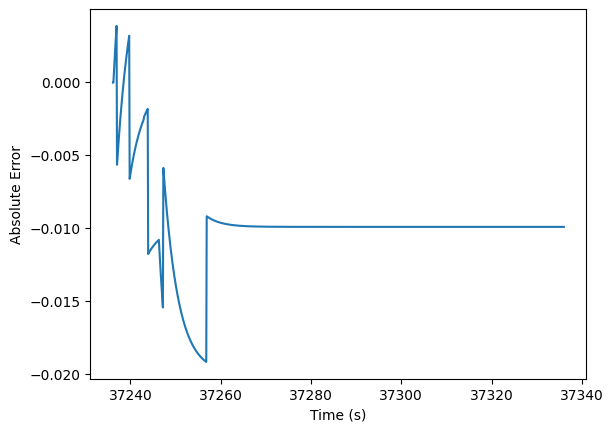

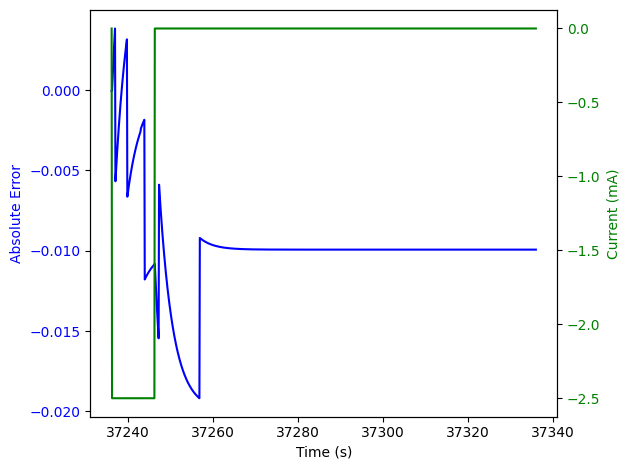

Parameters (First Order ECN): 0.016000000000000368 0.01599999999999966 655.5624999999875


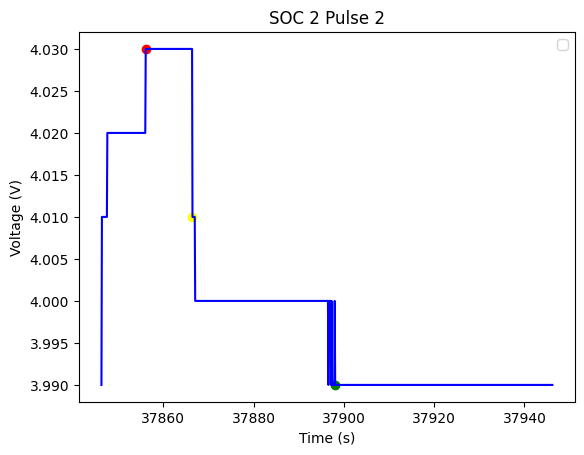

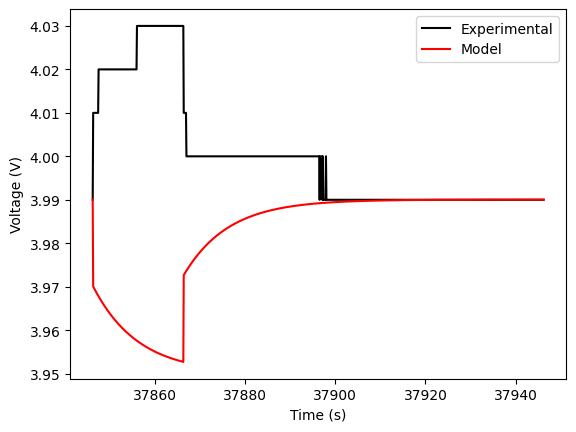

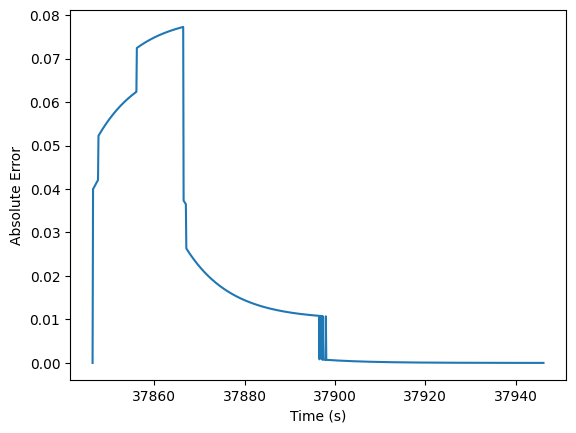

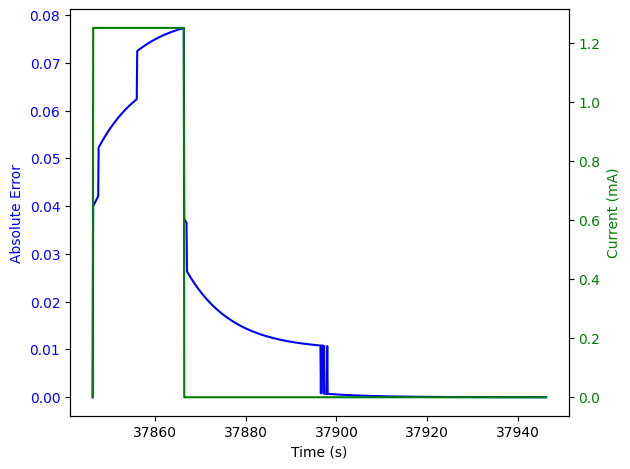

Parameters (First Order ECN): 0.020000000000000018 0.009999999999999964 1091.5499999999195


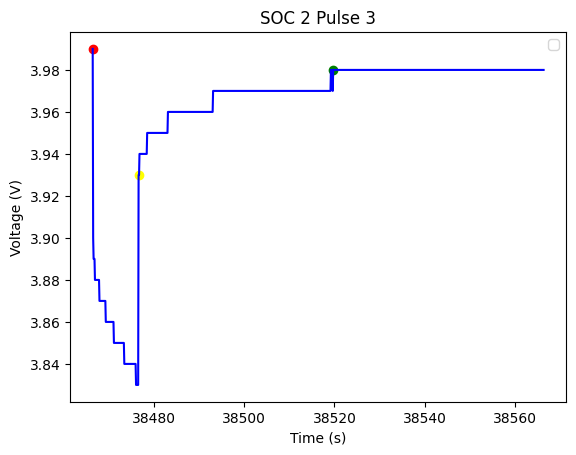

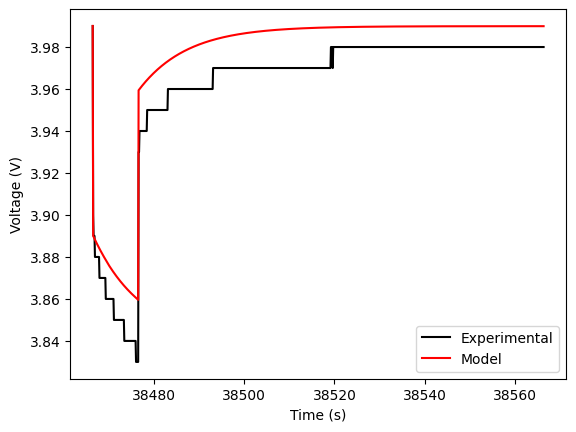

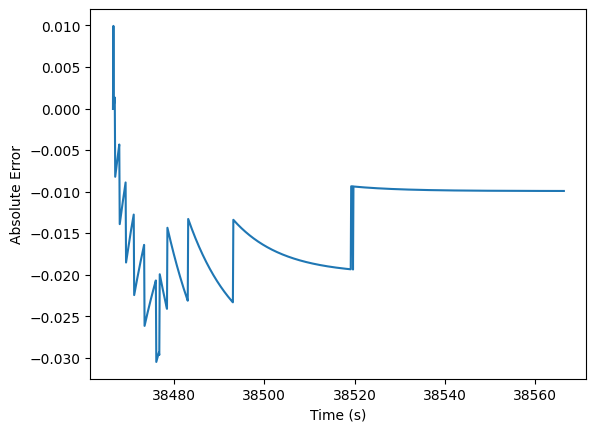

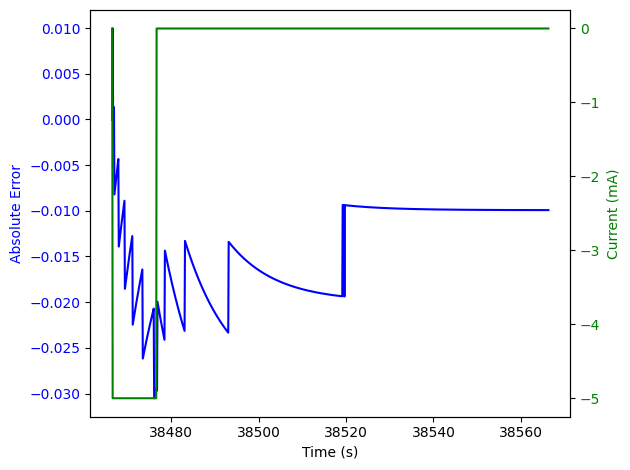

Parameters (First Order ECN): 0.020000000000000285 0.00799999999999983 504.8750000000944


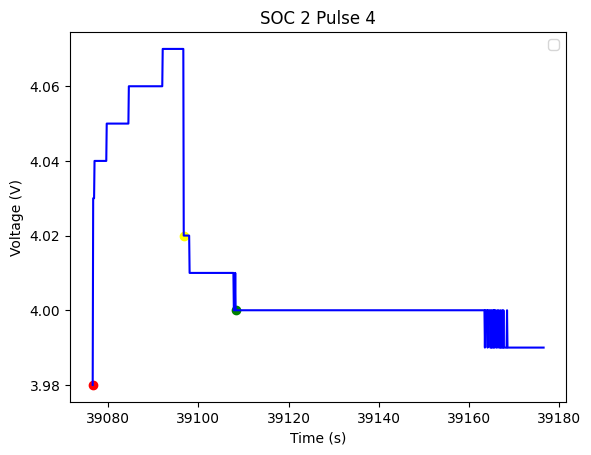

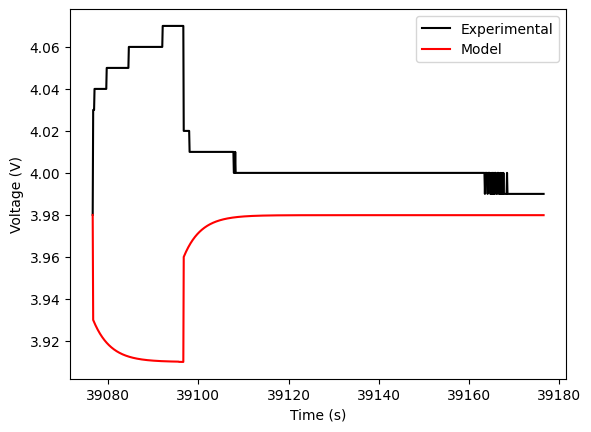

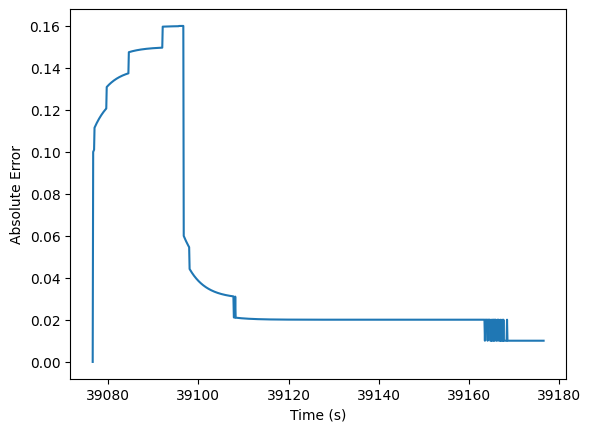

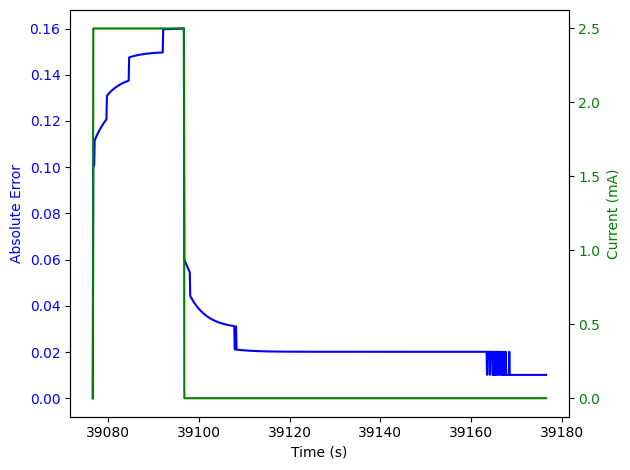

Parameters (First Order ECN): 0.020000000000000018 0.008000000000000007 1973.6874999998672


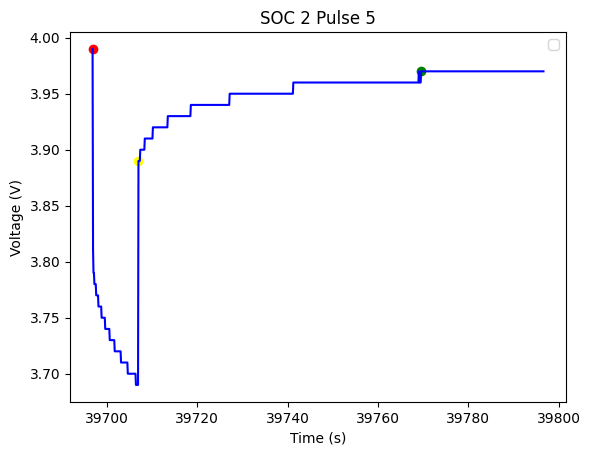

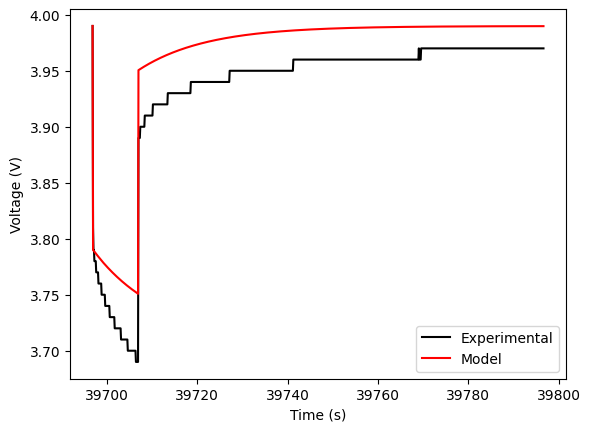

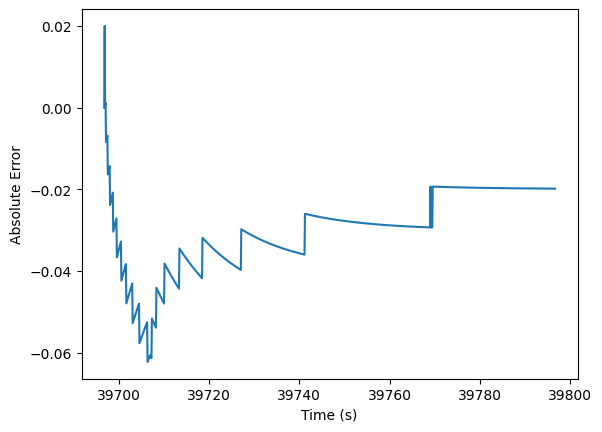

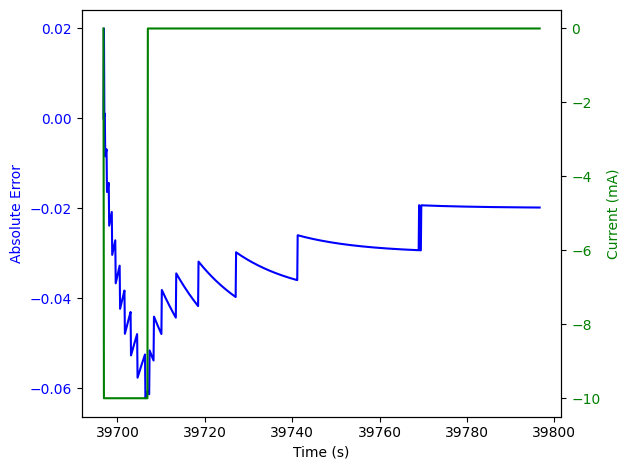

Parameters (First Order ECN): 0.020000000000000018 0.010000000000000009 683.8999999999936


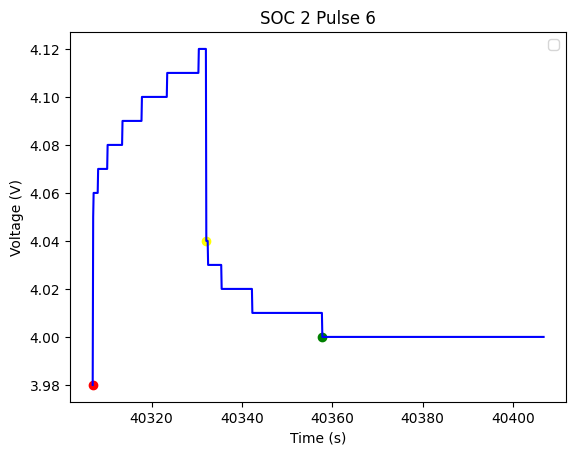

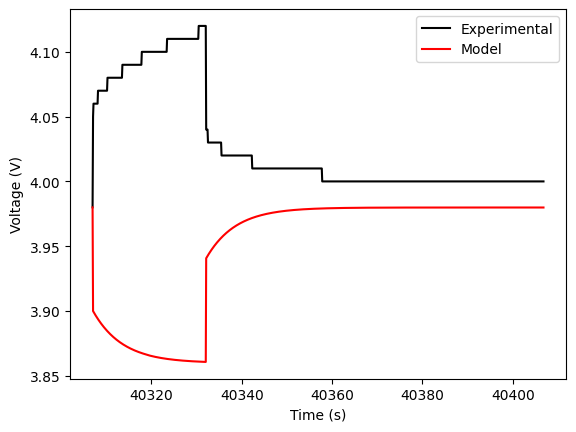

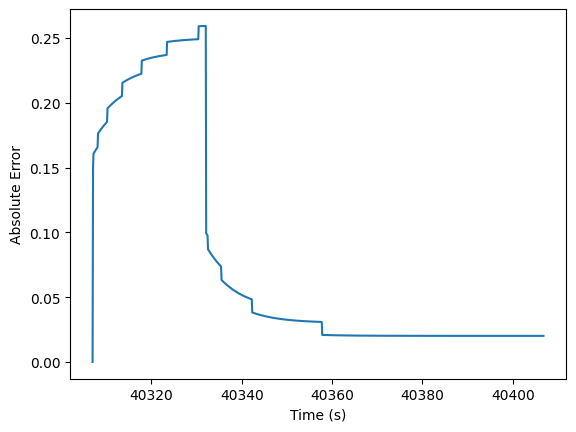

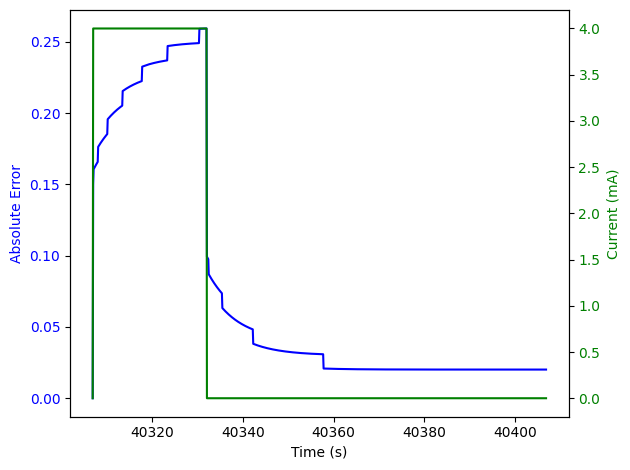

Parameters (First Order ECN): 0.018500000000000006 0.007000000000000006 2941.21428571452


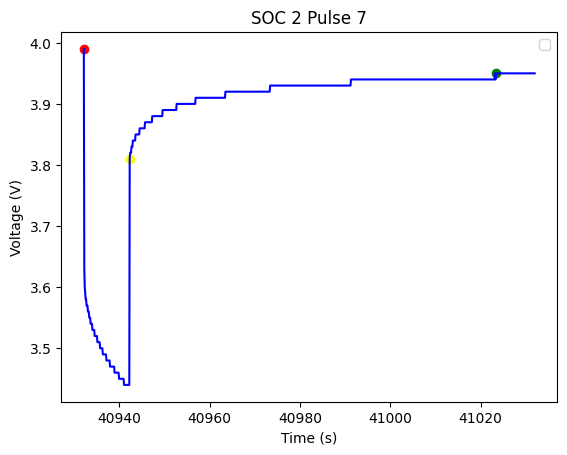

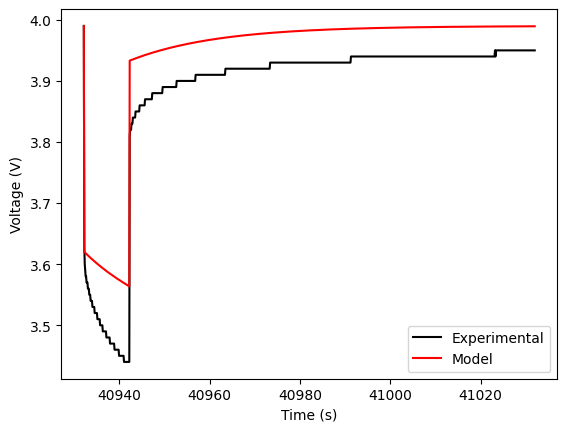

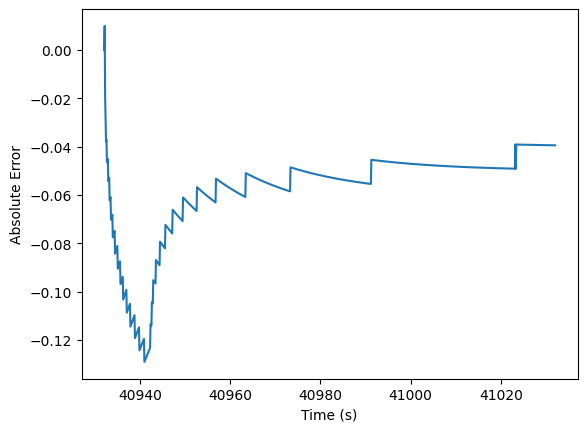

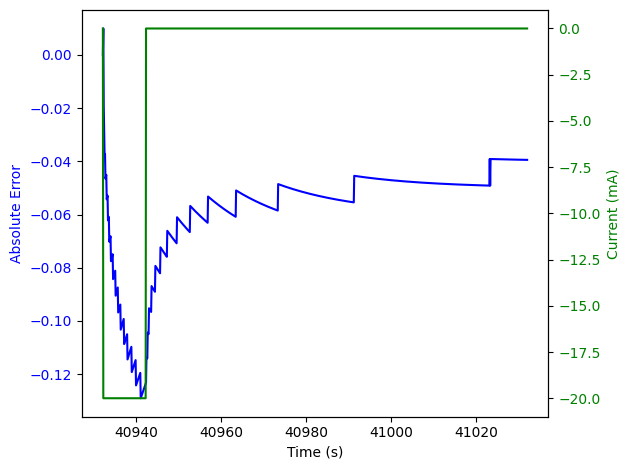

Parameters (First Order ECN): 0.020000000000000018 0.012499999999999956 893.200000000073


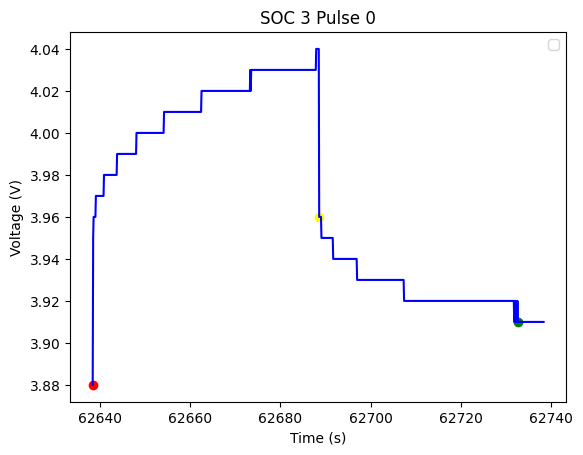

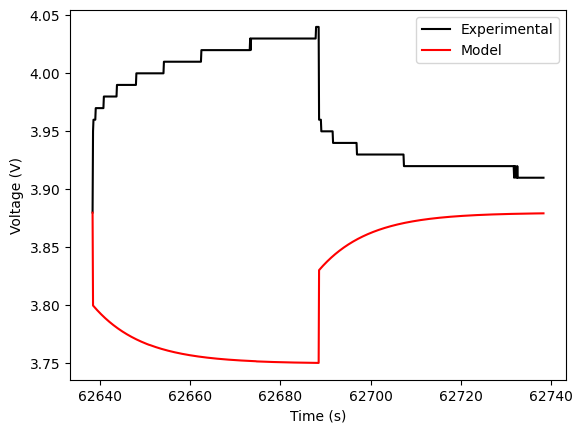

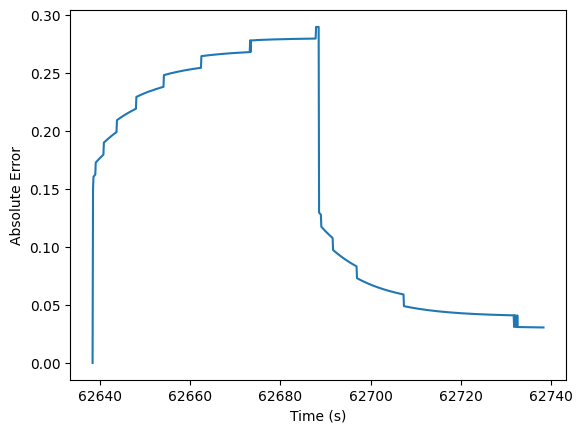

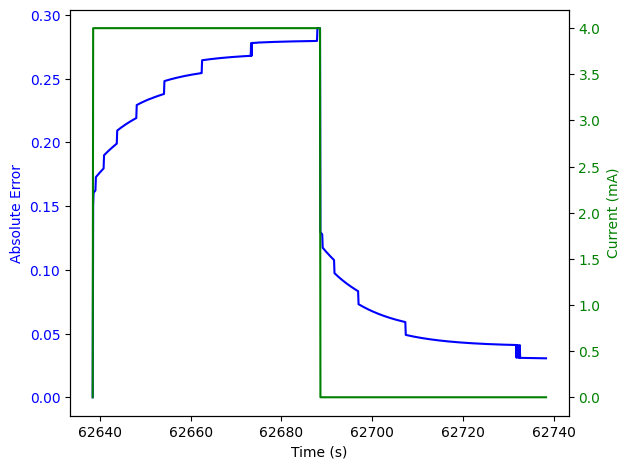

Parameters (First Order ECN): 0.020000000000000108 0.008000000000000007 370.5625000000051


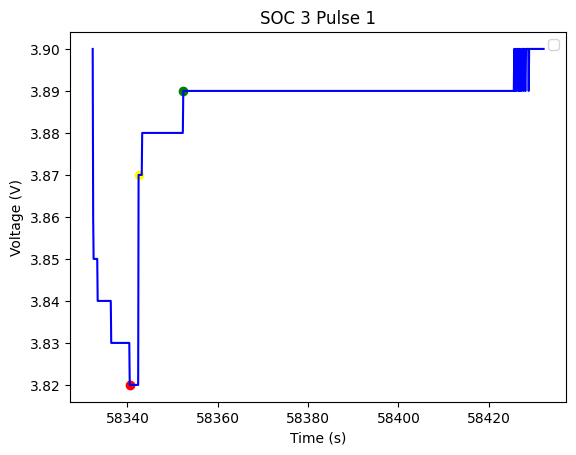

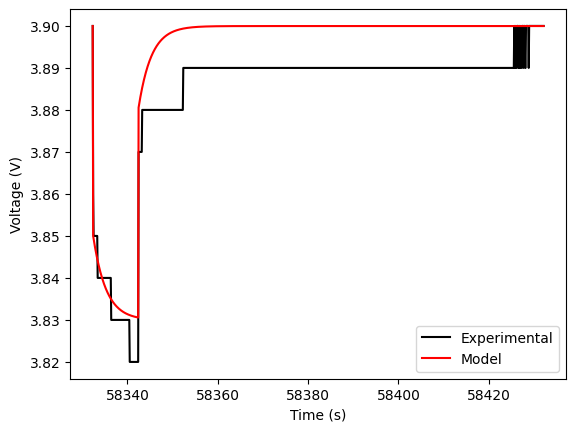

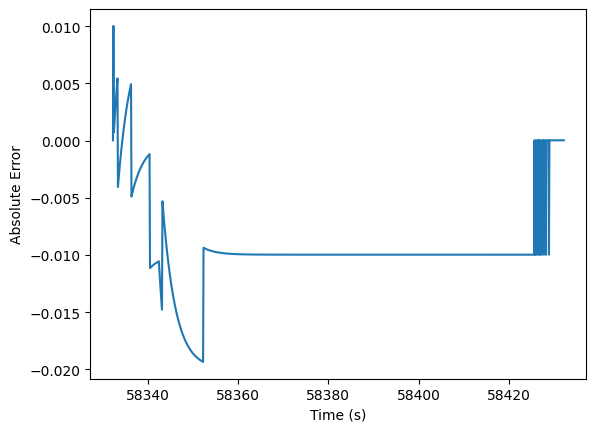

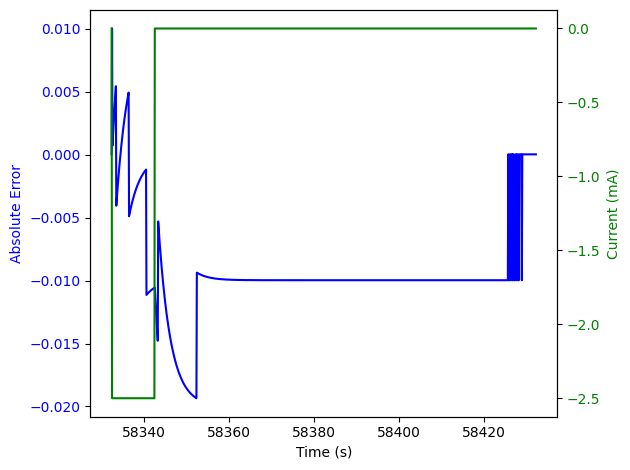

Parameters (First Order ECN): 0.016000000000000014 0.016000000000000014 977.5000000000764


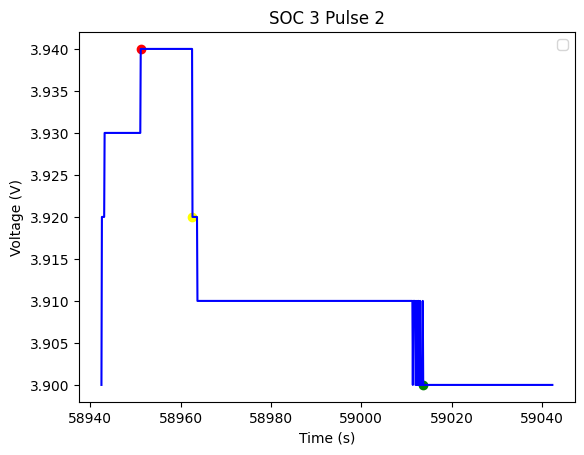

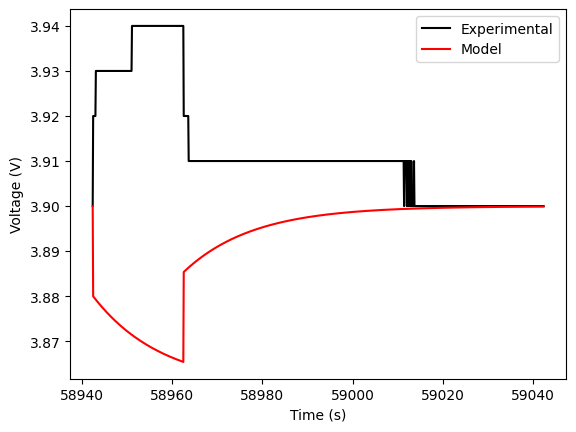

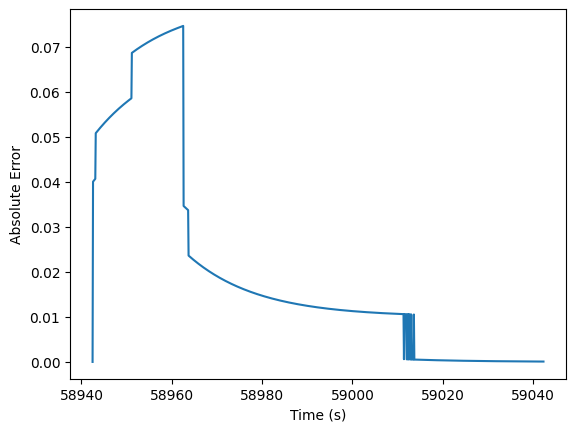

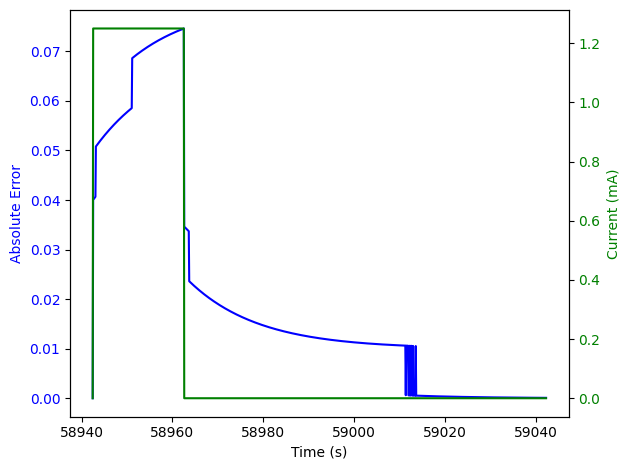

Parameters (First Order ECN): 0.01799999999999997 0.010000000000000054 1193.9000000000242


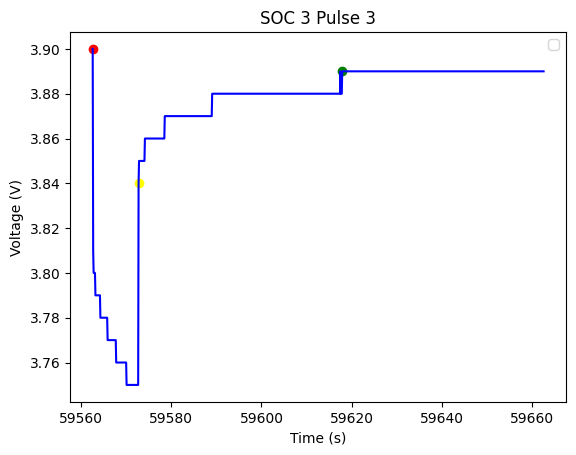

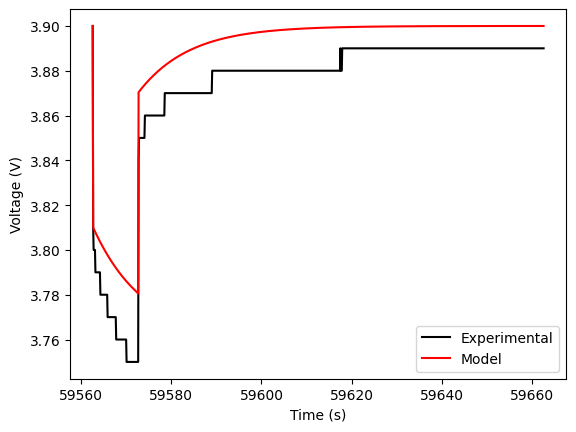

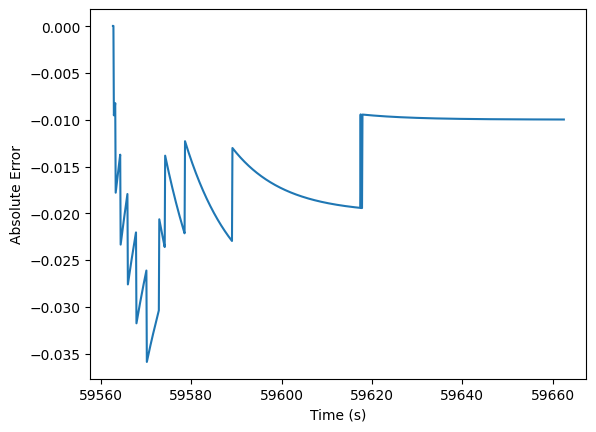

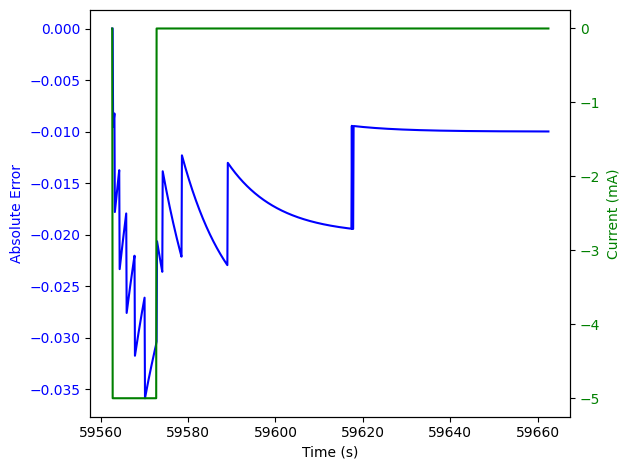

Parameters (First Order ECN): 0.019999999999999928 0.008000000000000007 576.8749999999721


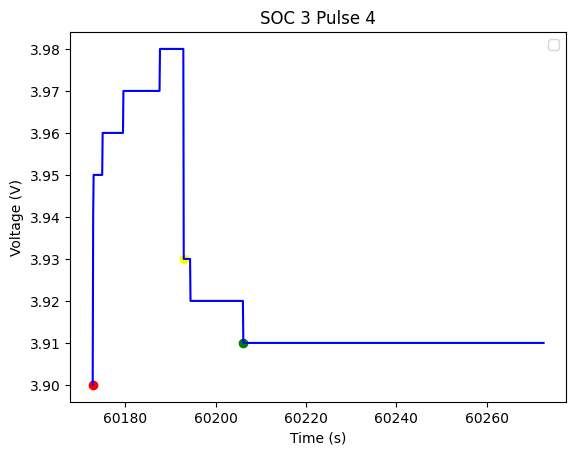

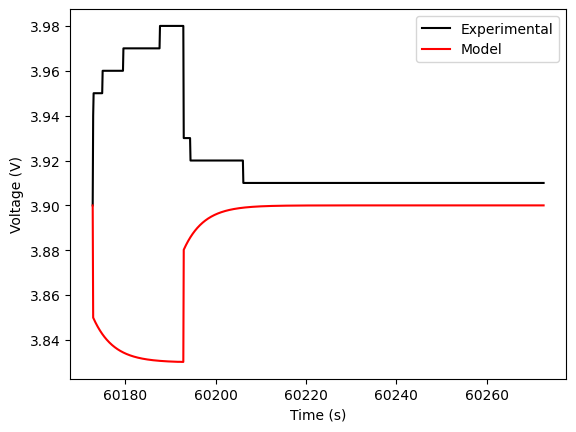

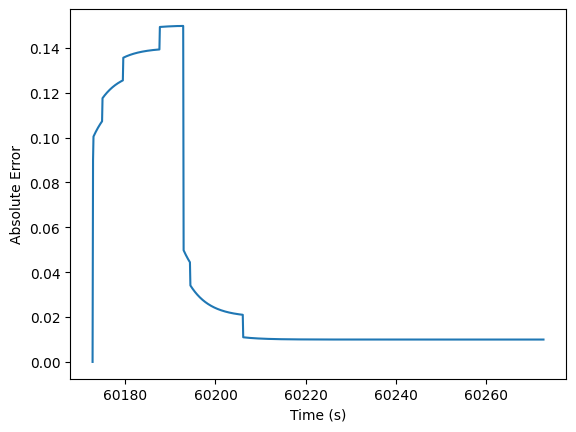

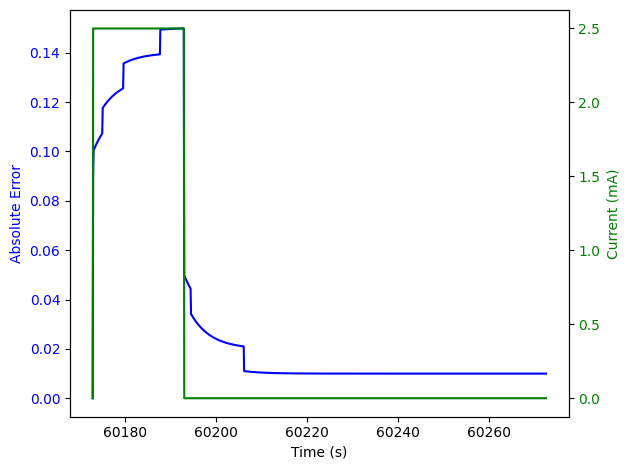

Parameters (First Order ECN): 0.018999999999999996 0.008000000000000007 2195.7500000000873


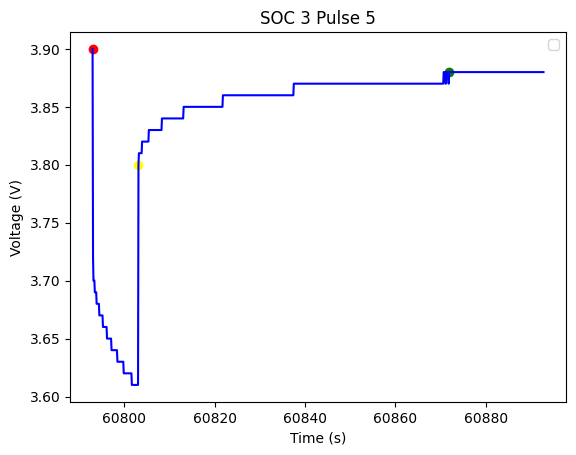

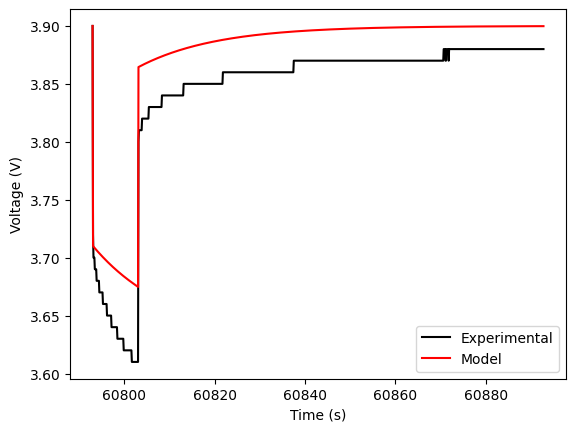

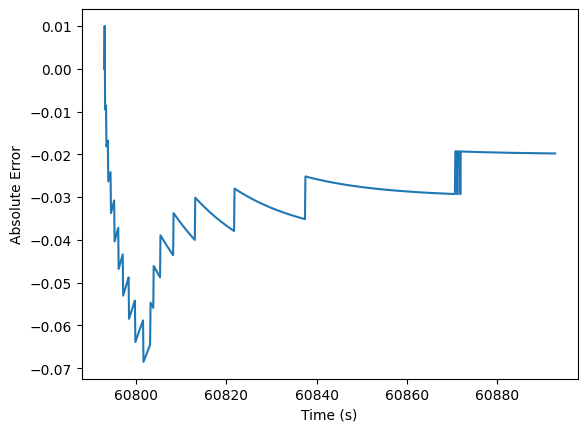

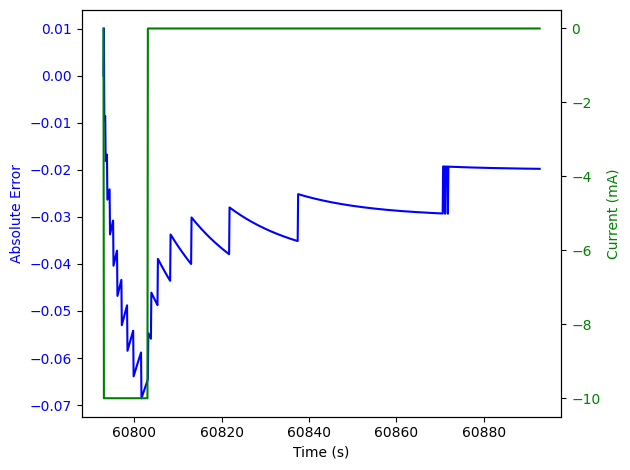

Parameters (First Order ECN): 0.020000000000000018 0.010000000000000009 748.8999999999571


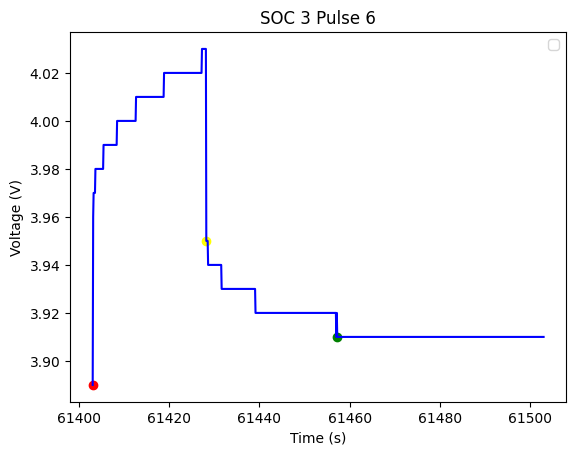

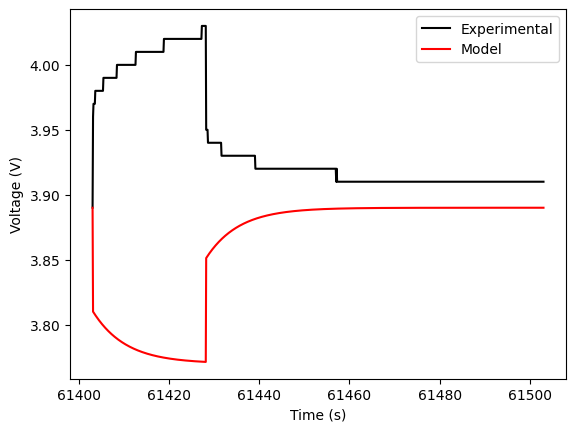

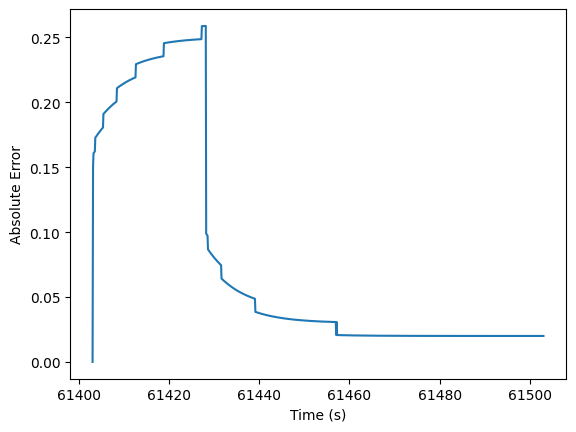

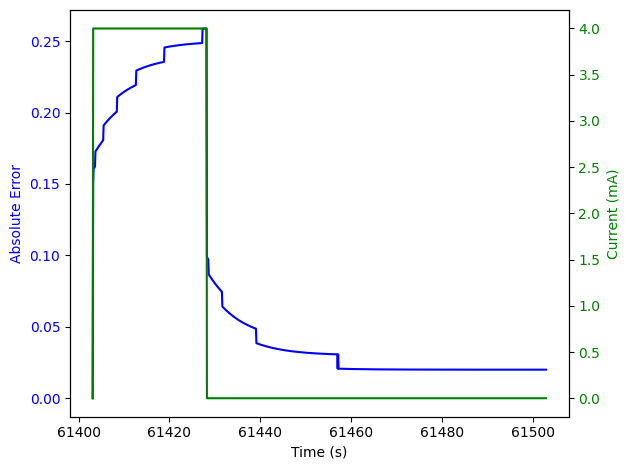

Parameters (First Order ECN): 0.018500000000000006 0.006499999999999995 2813.8461538462902


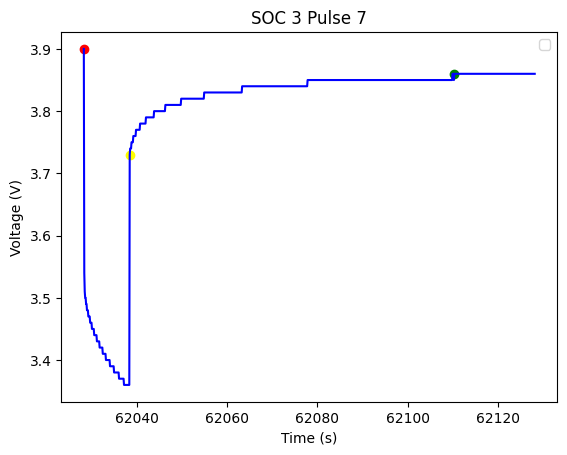

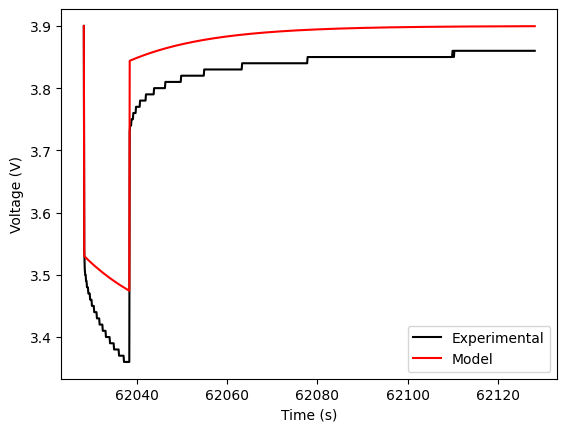

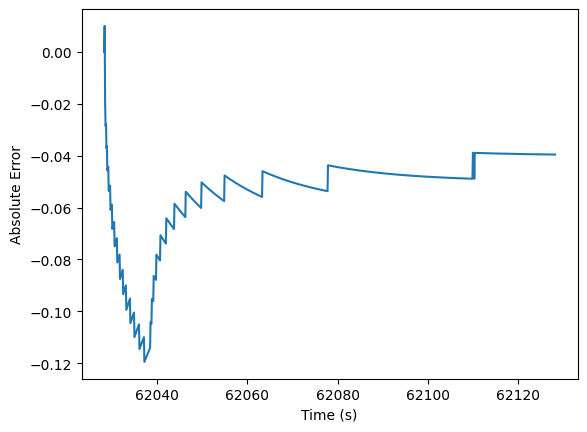

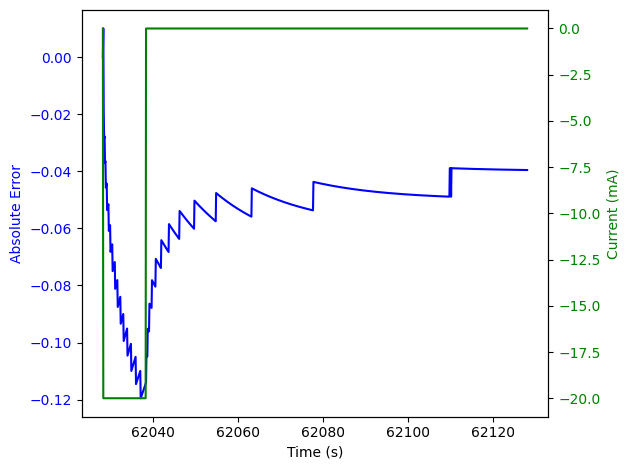

Parameters (First Order ECN): 0.025000000000000022 0.0050000000000000044 1522.800000000278


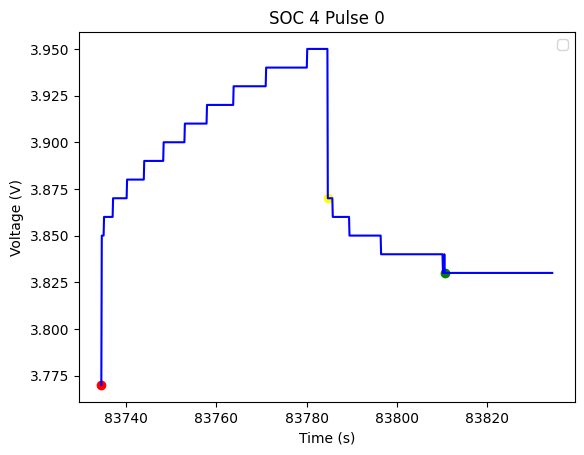

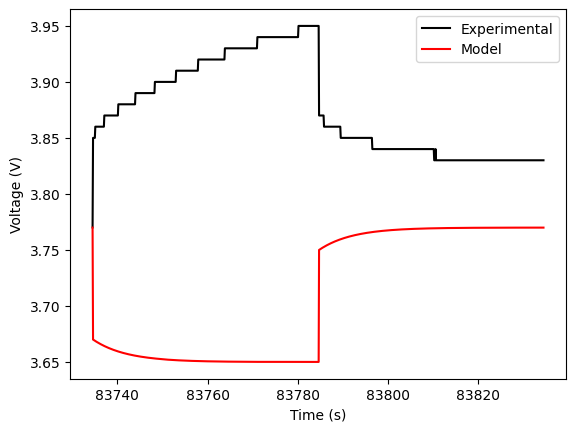

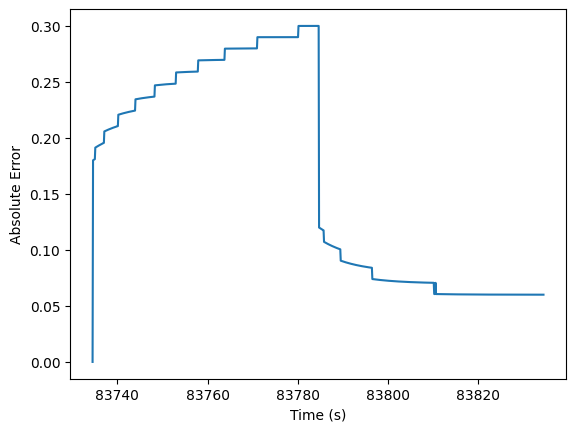

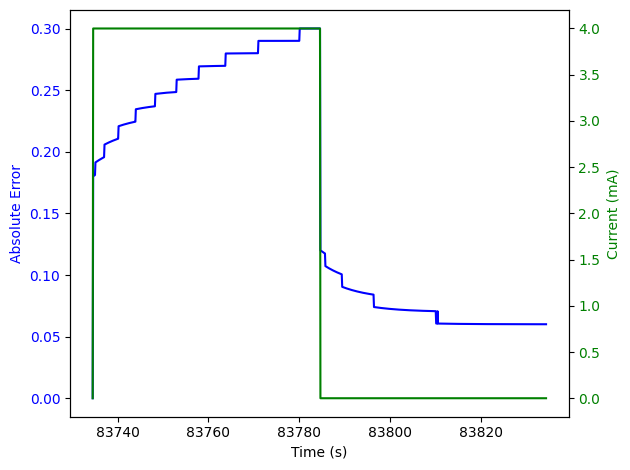

Parameters (First Order ECN): 0.019999999999999928 0.008000000000000007 211.2499999998361


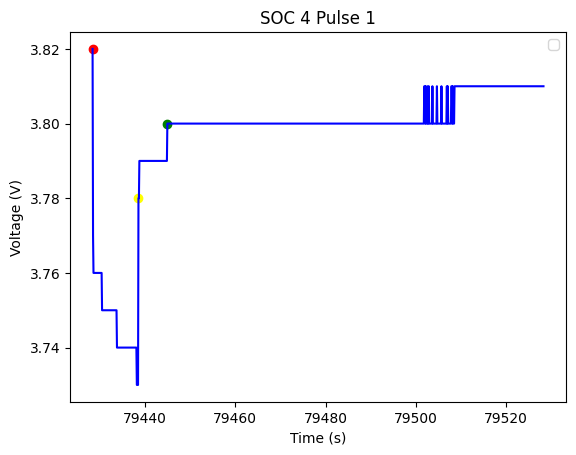

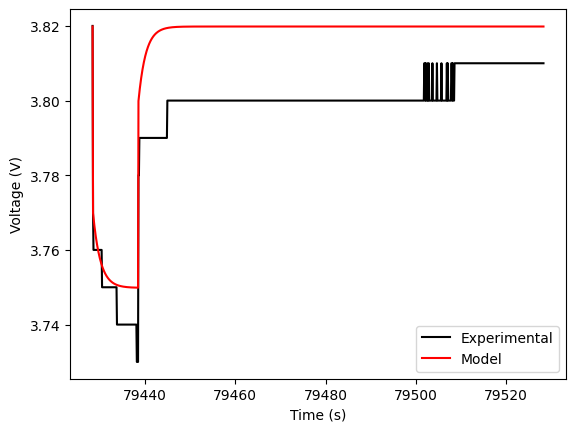

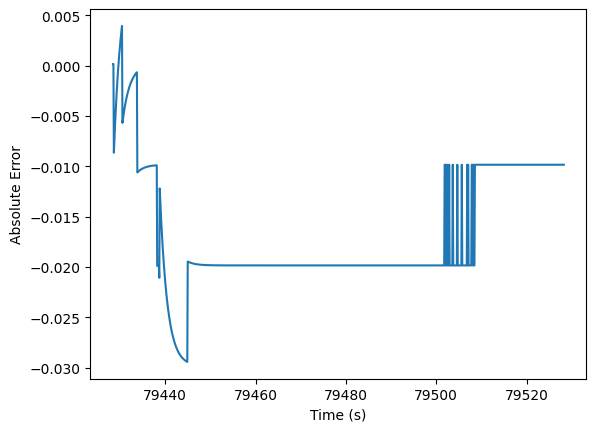

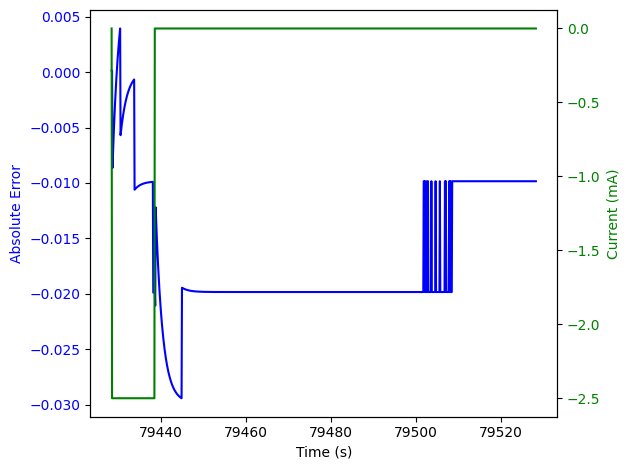

Parameters (First Order ECN): 0.023999999999999844 0.008000000000000184 248.62499999971416


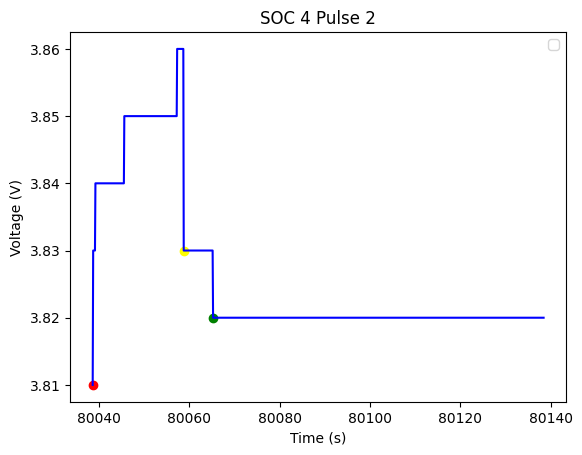

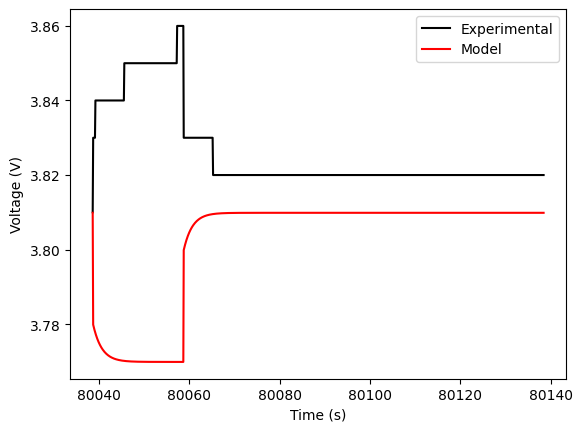

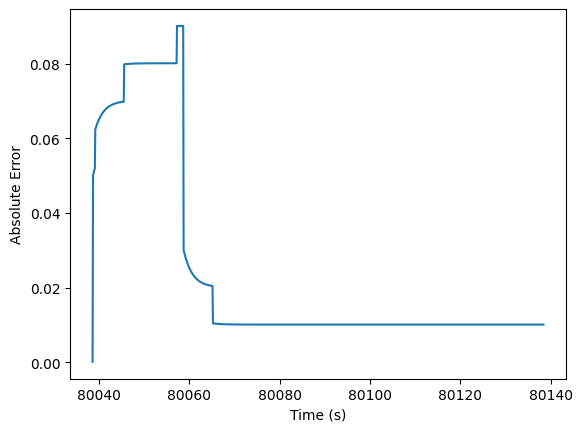

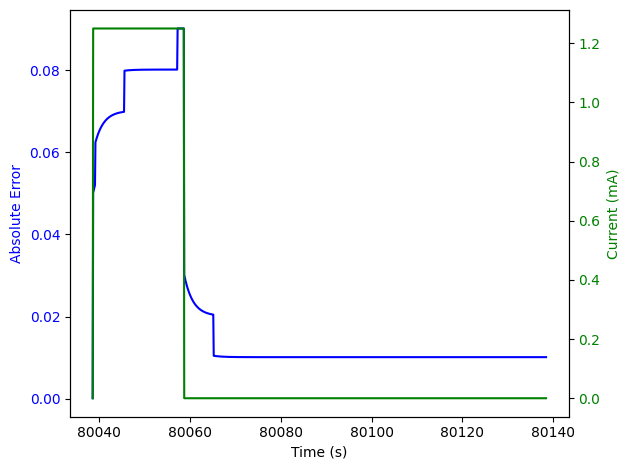

Parameters (First Order ECN): 0.019999999999999928 0.008000000000000007 1551.8750000001078


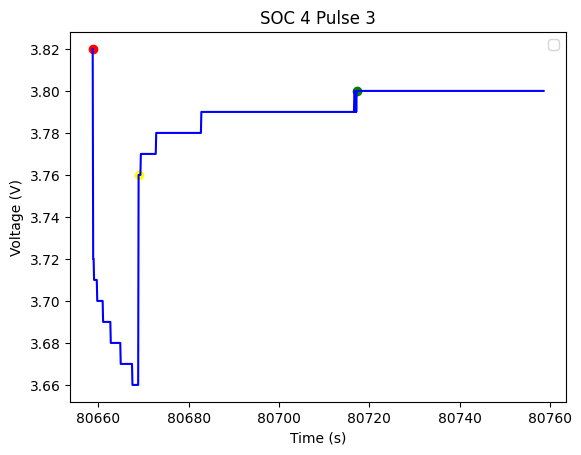

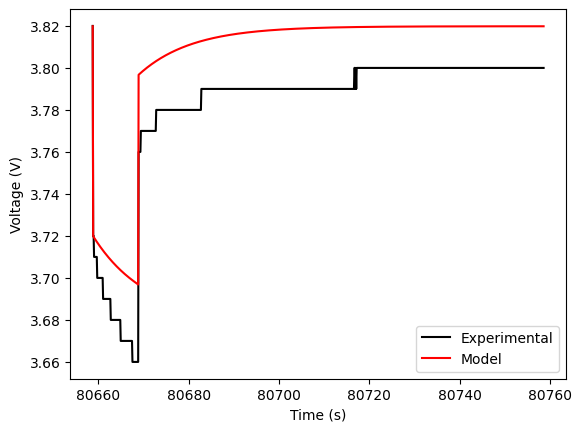

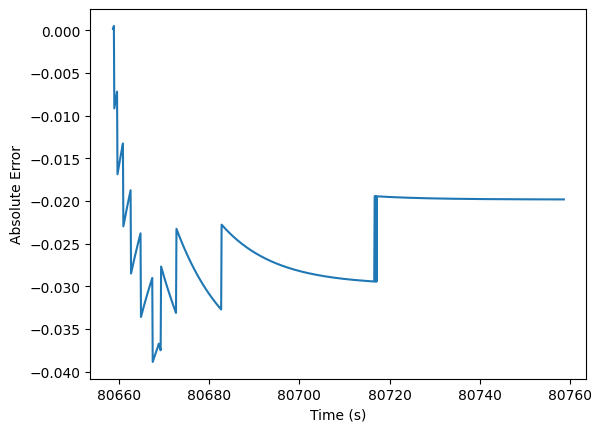

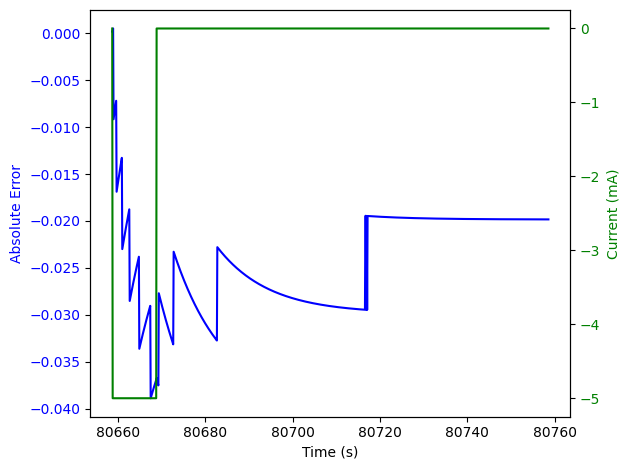

Parameters (First Order ECN): 0.020000000000000108 0.008000000000000007 1045.4374999999336


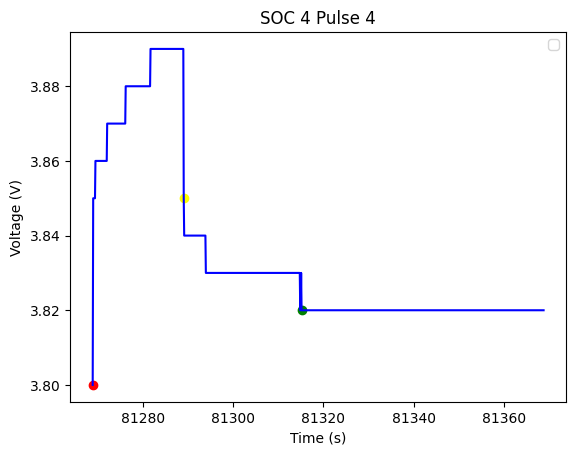

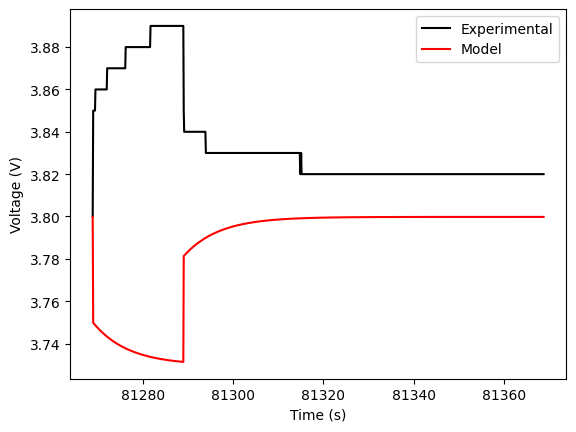

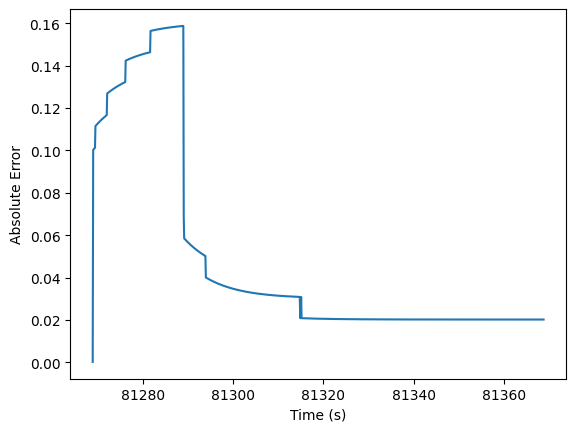

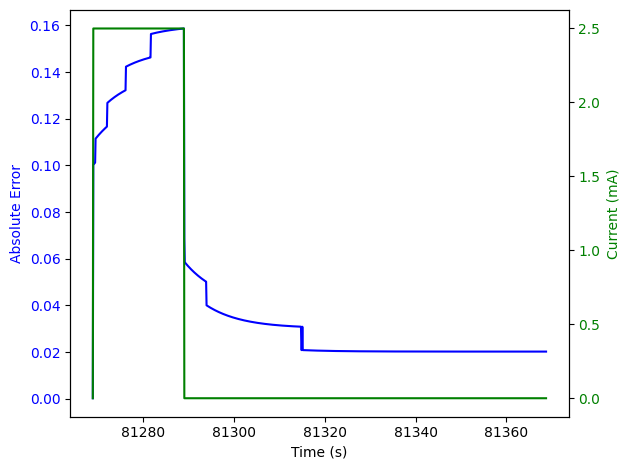

Parameters (First Order ECN): 0.020000000000000018 0.00599999999999996 1310.916666666656


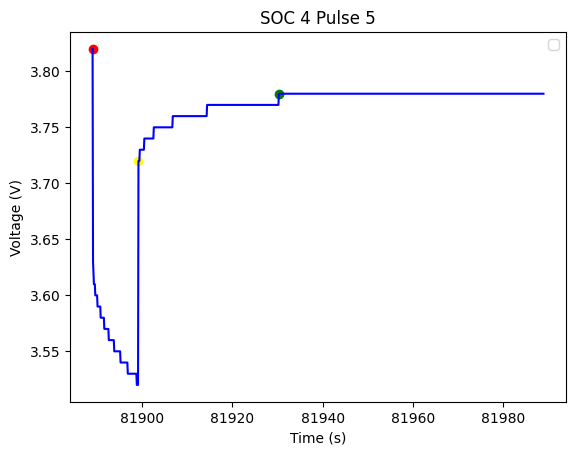

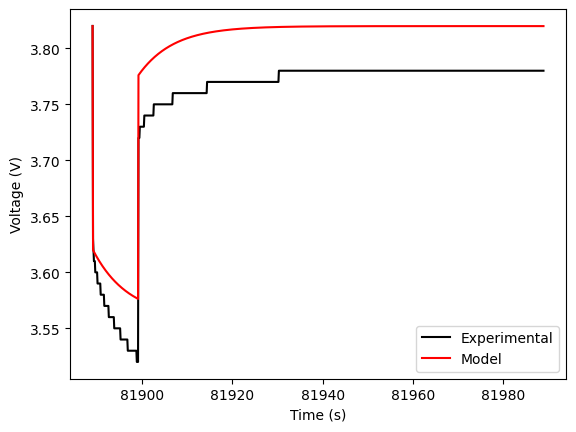

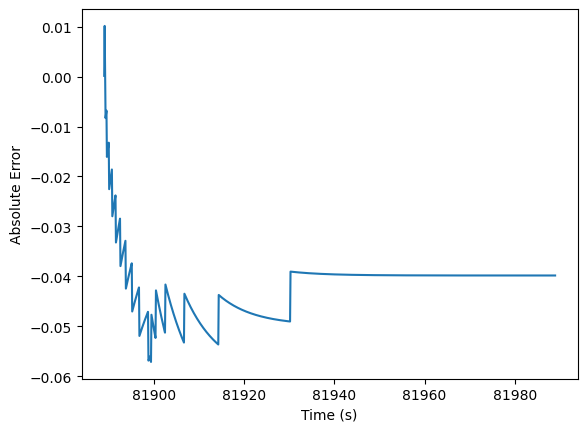

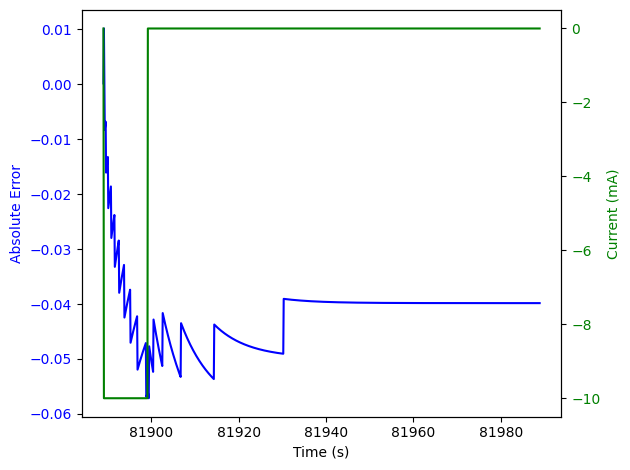

Parameters (First Order ECN): 0.020000000000000018 0.010000000000000009 1318.9502499997604


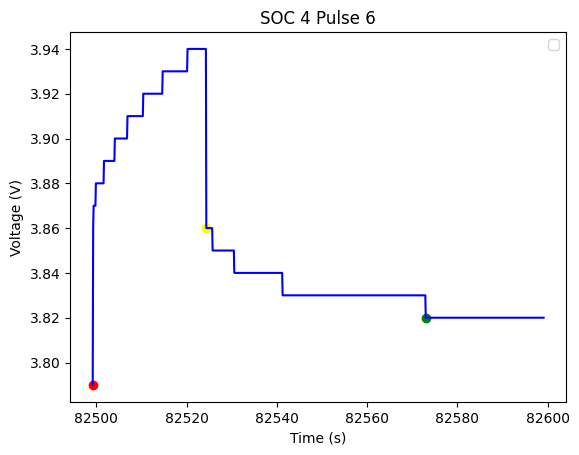

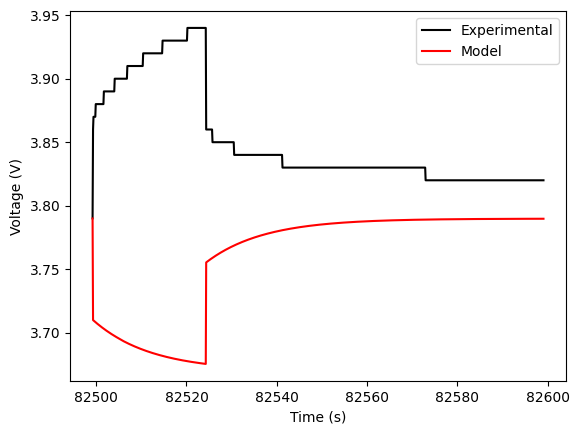

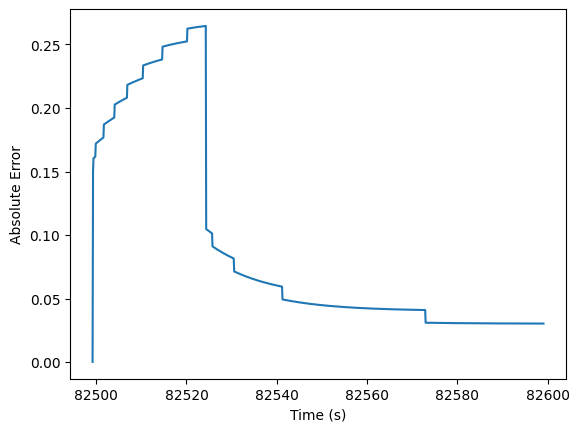

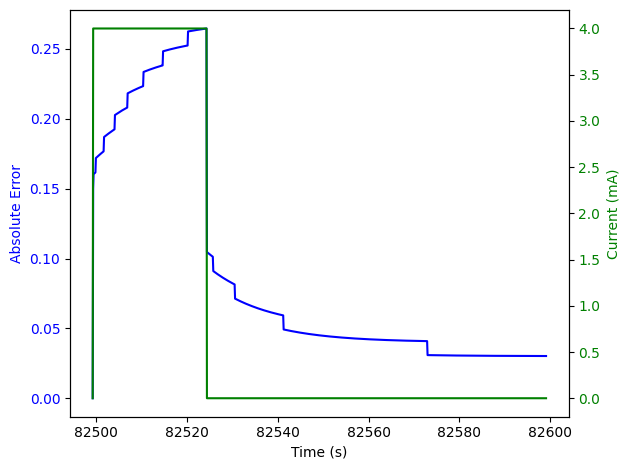

Parameters (First Order ECN): 0.018999999999999996 0.006000000000000005 3227.5000000002638


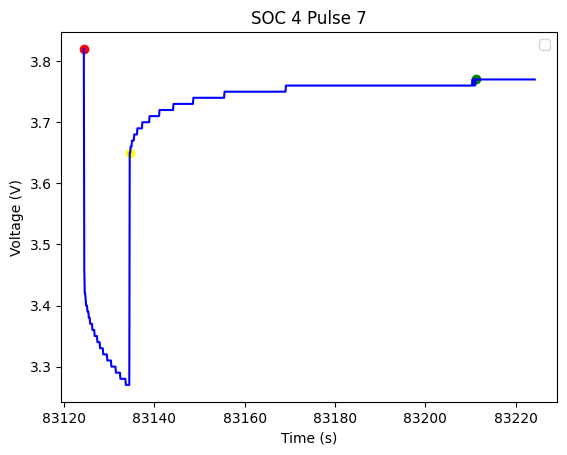

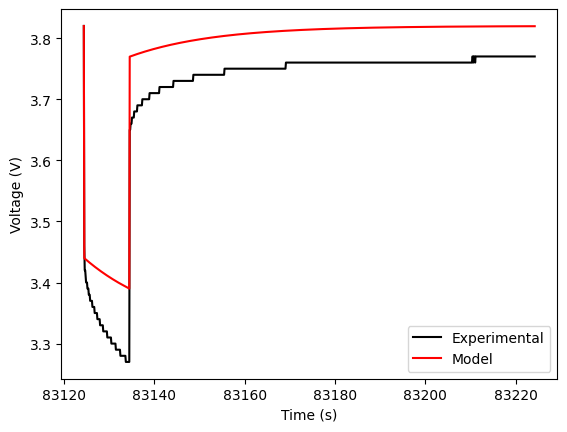

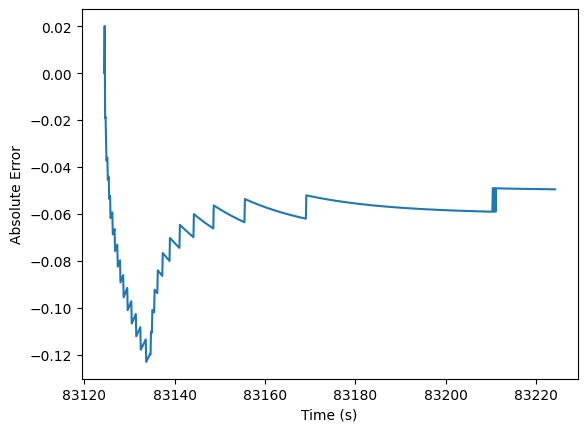

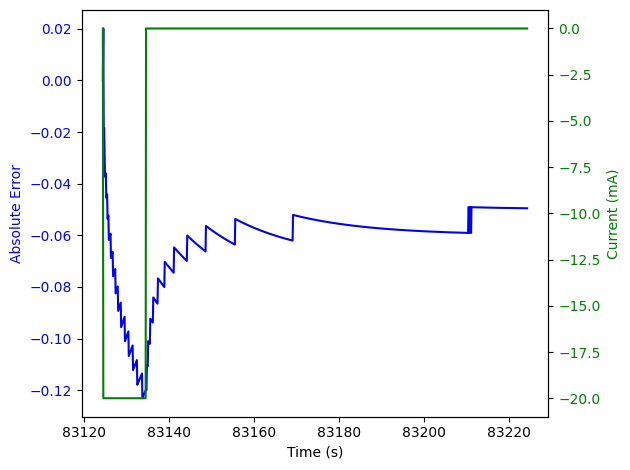

Parameters (First Order ECN): 0.019999999999999907 0.01000000000000012 1251.4500000000985


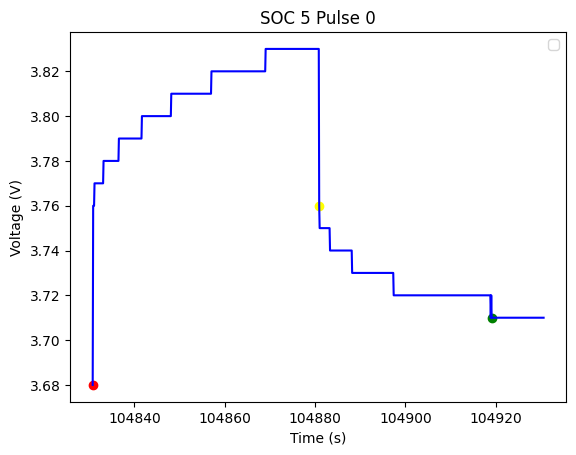

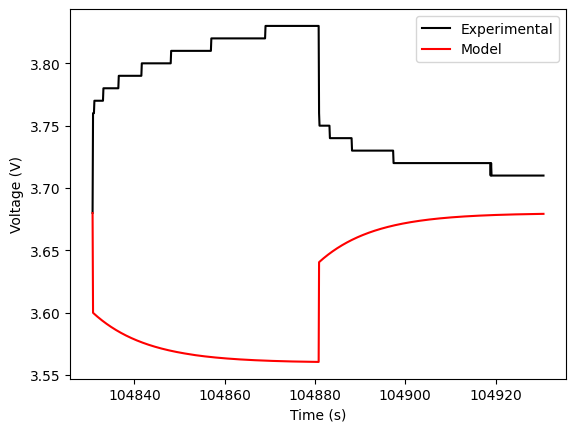

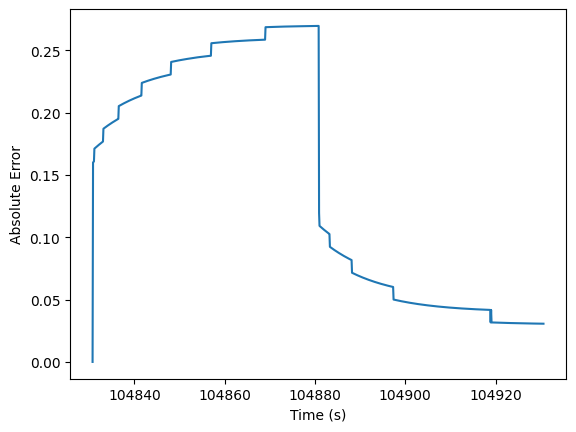

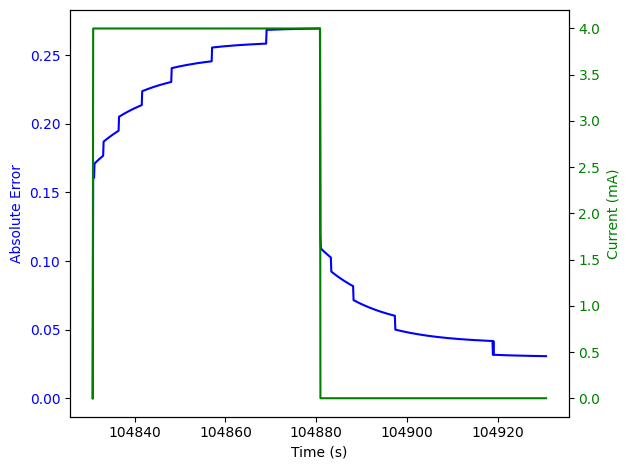

Parameters (First Order ECN): 0.020000000000000108 0.008000000000000007 767.4999999999266


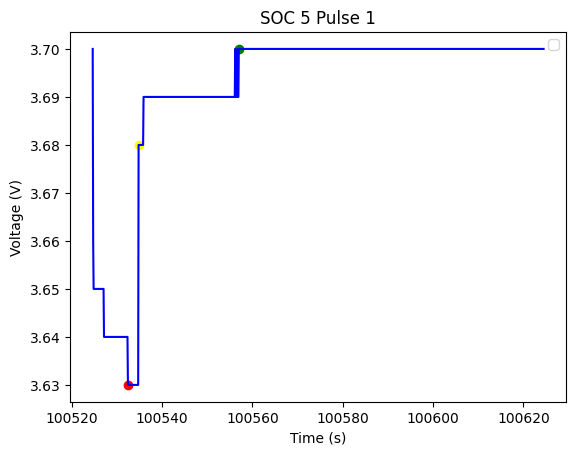

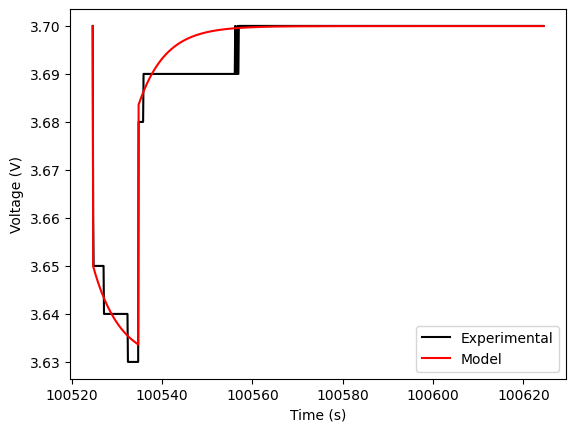

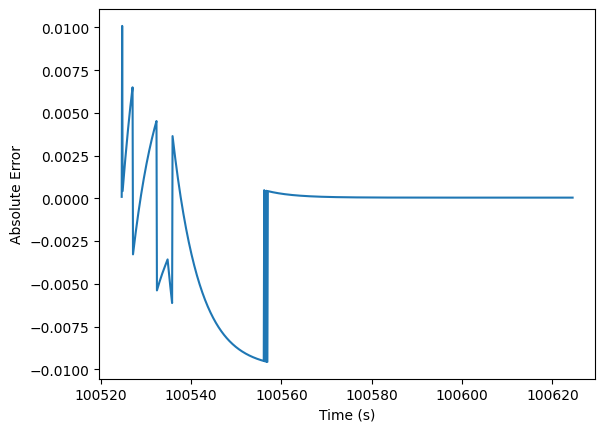

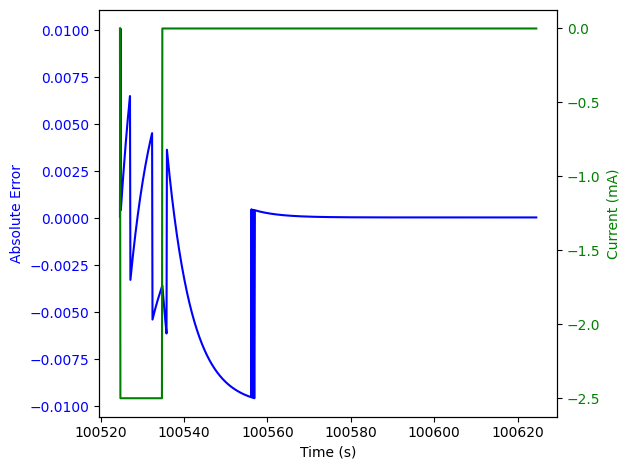

Parameters (First Order ECN): 0.016000000000000014 0.016000000000000014 905.6249999998719


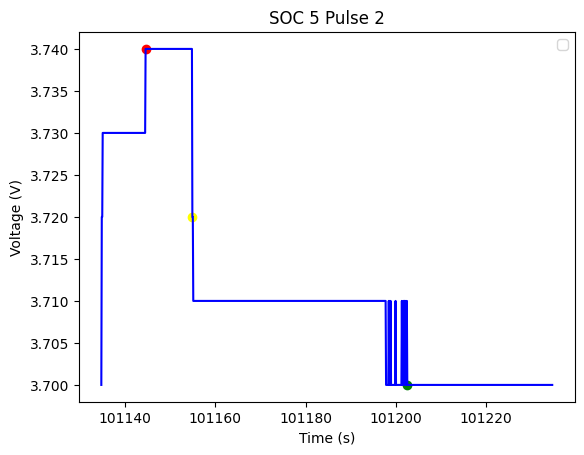

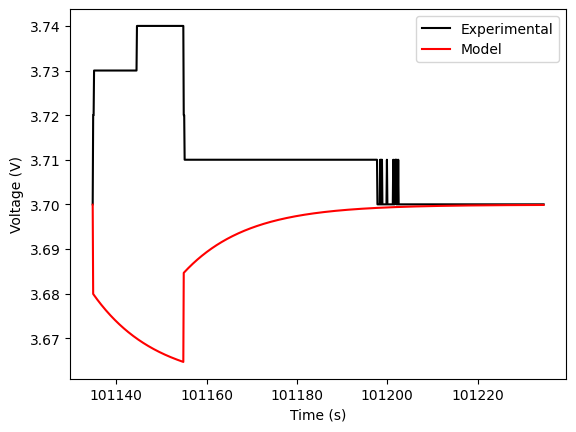

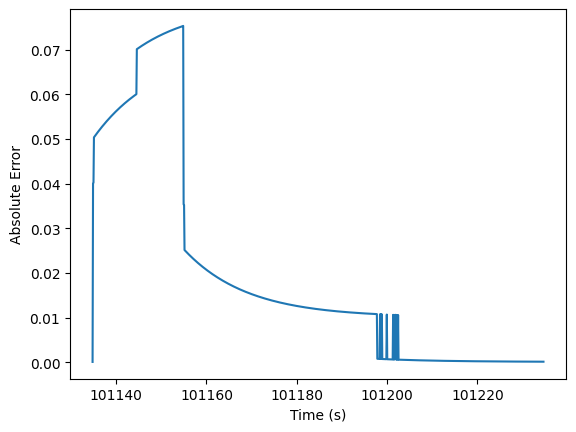

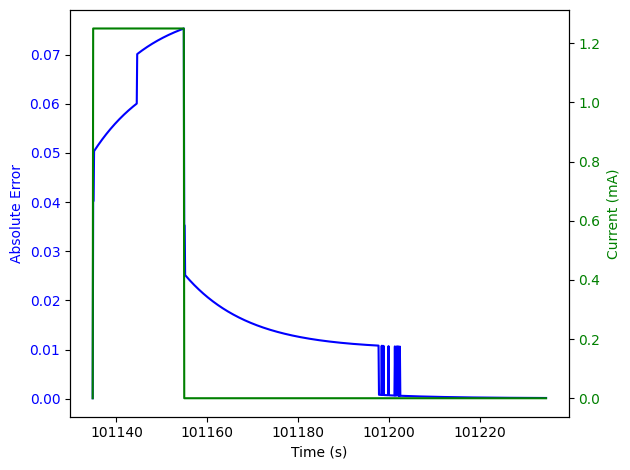

Parameters (First Order ECN): 0.020000000000000018 0.00599999999999996 631.7499999998636


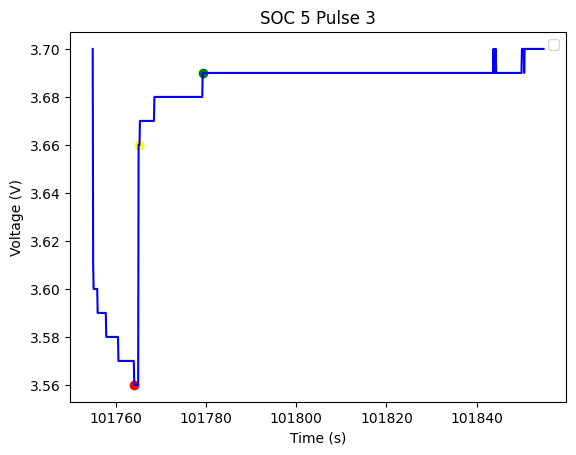

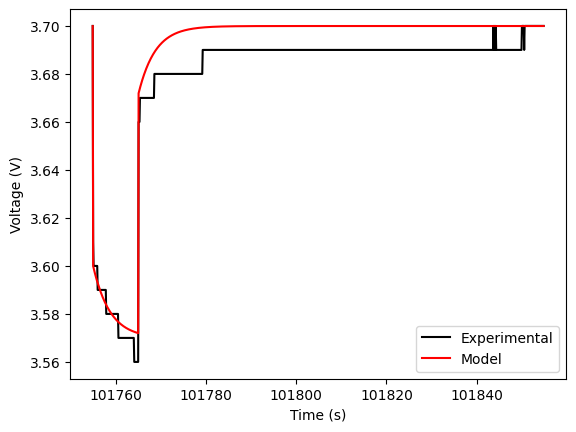

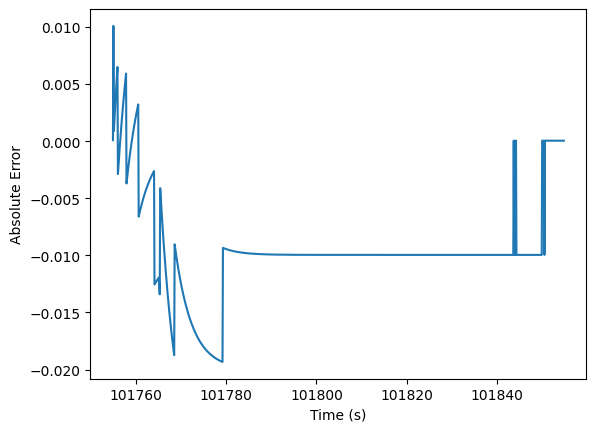

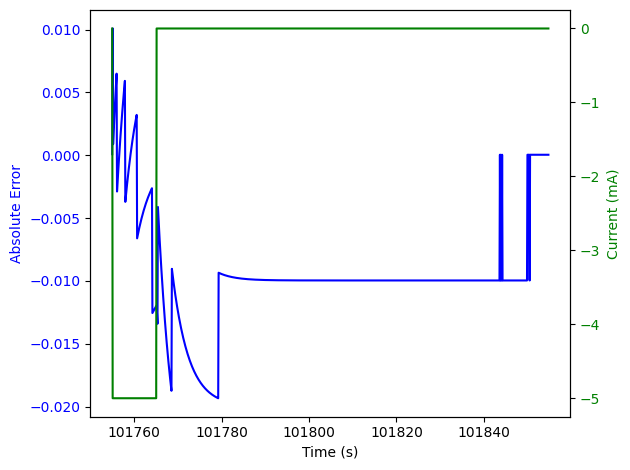

Parameters (First Order ECN): 0.019999999999999928 0.008000000000000007 398.6875000000506


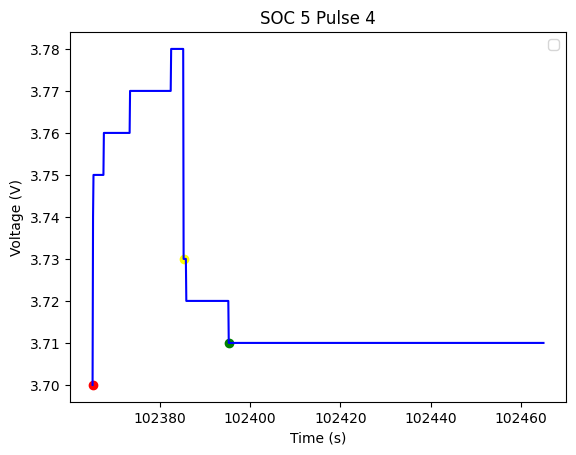

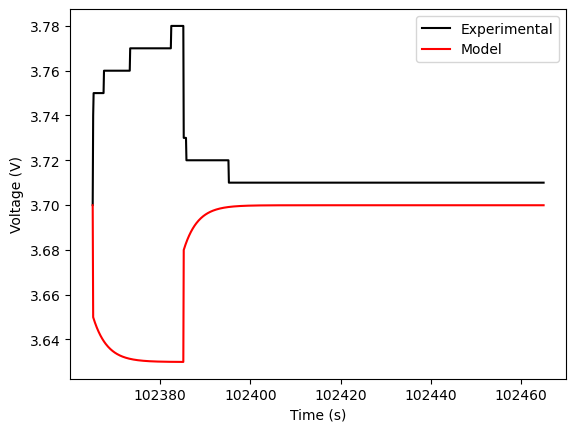

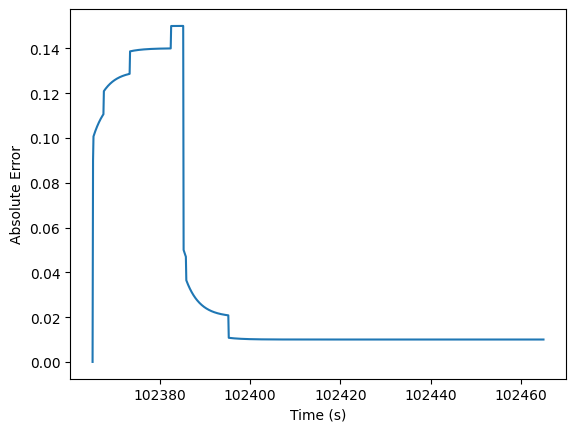

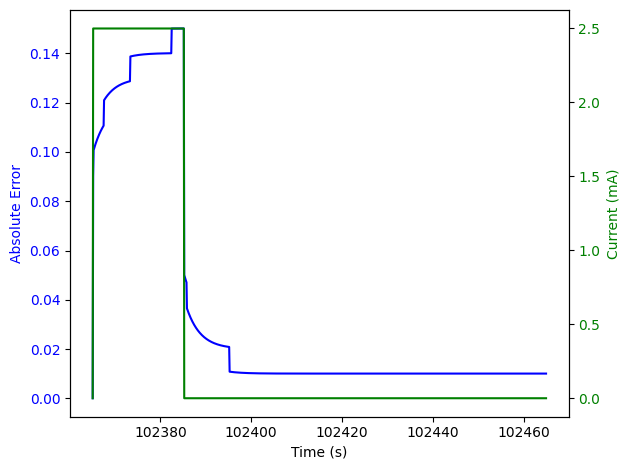

Parameters (First Order ECN): 0.019999999999999973 0.006000000000000005 1952.416666666369


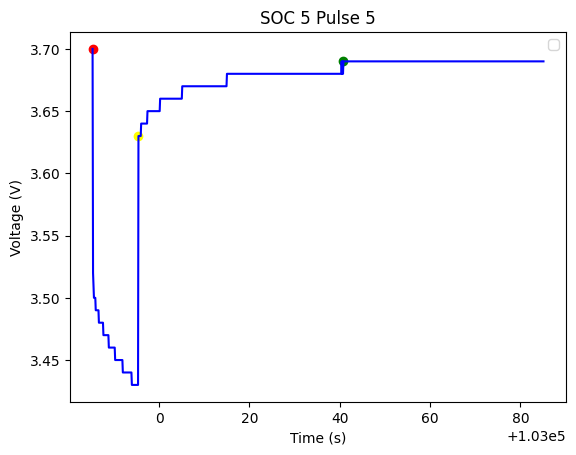

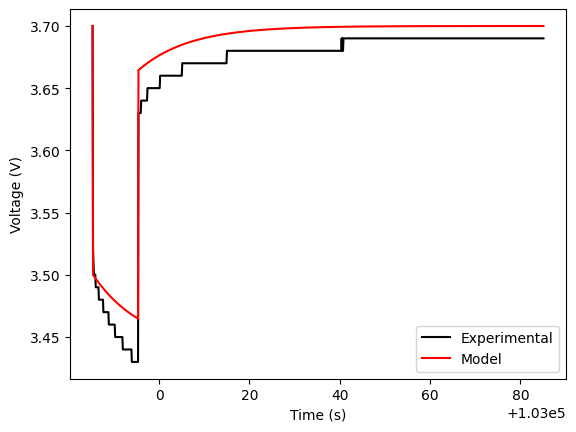

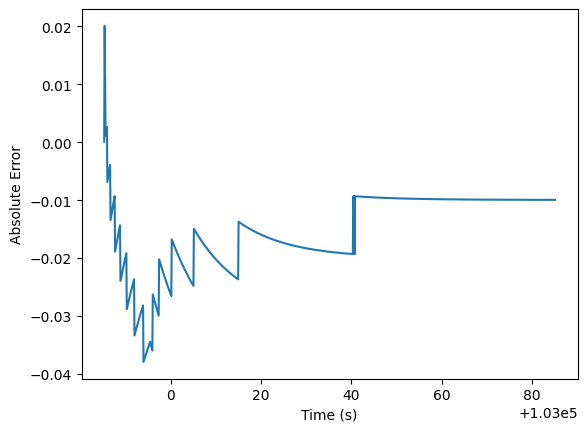

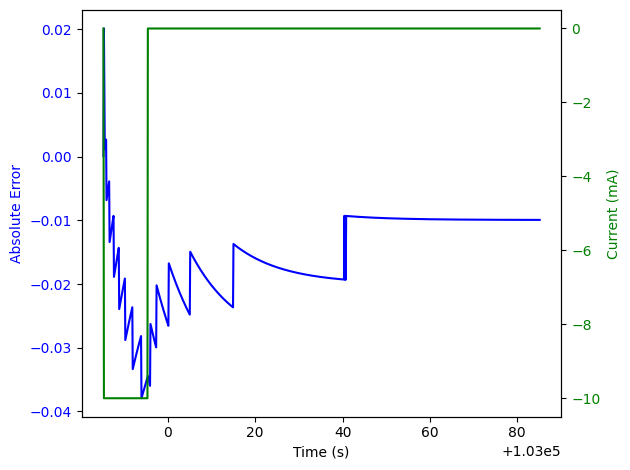

Parameters (First Order ECN): 0.01749999999999996 0.010000000000000009 794.0500000000604


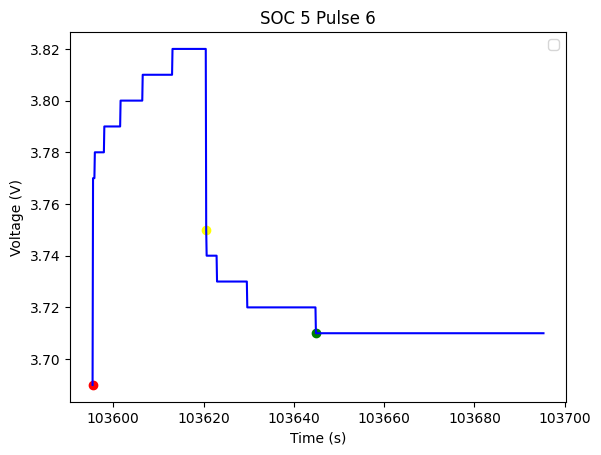

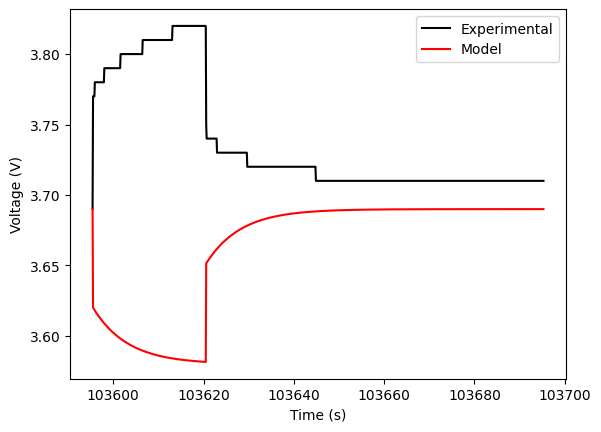

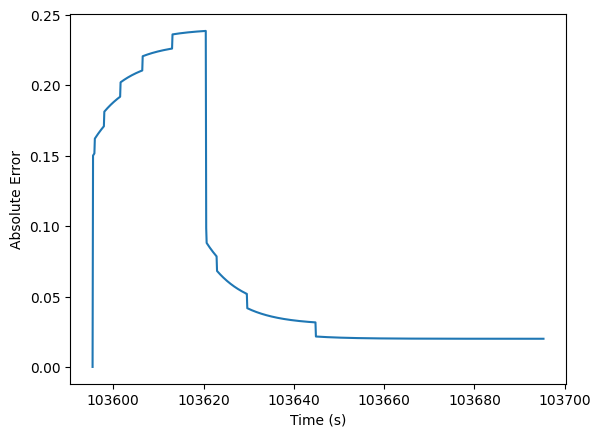

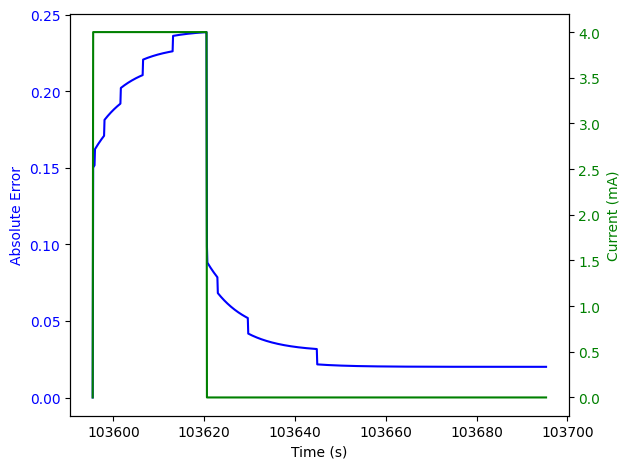

Parameters (First Order ECN): 0.019500000000000007 0.006000000000000005 2398.4166666662813


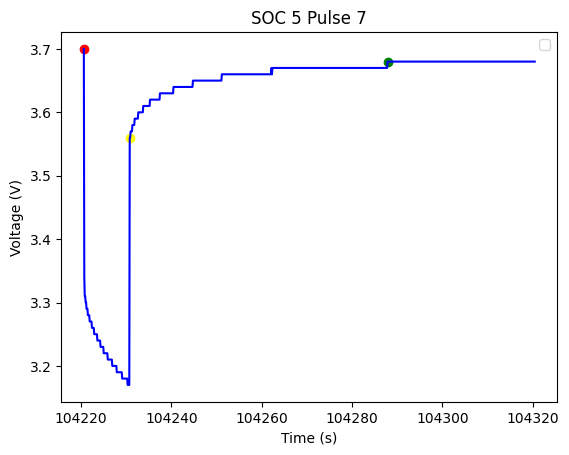

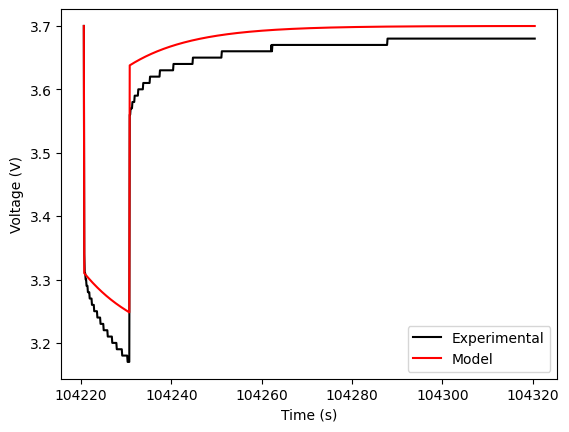

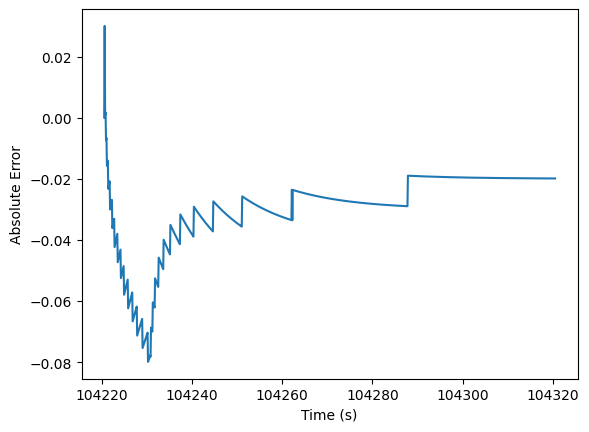

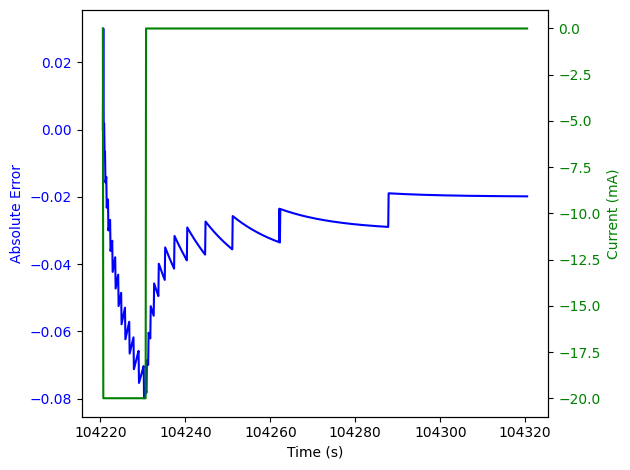

Parameters (First Order ECN): 0.019999999999999907 0.010000000000000009 518.9499999996765


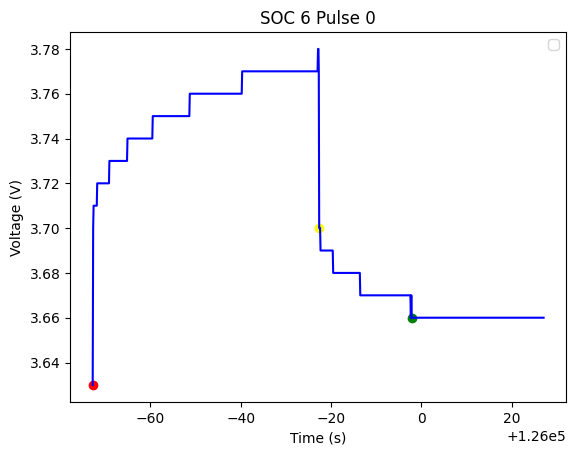

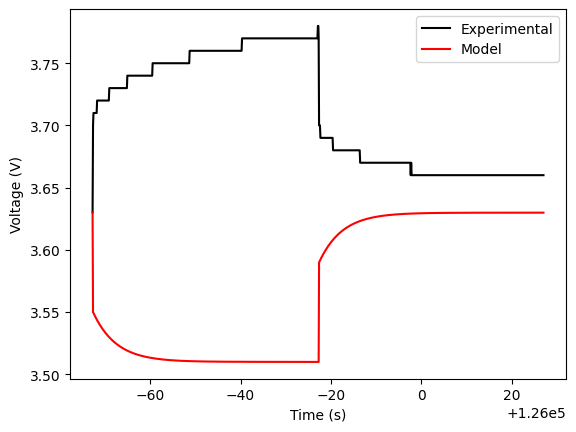

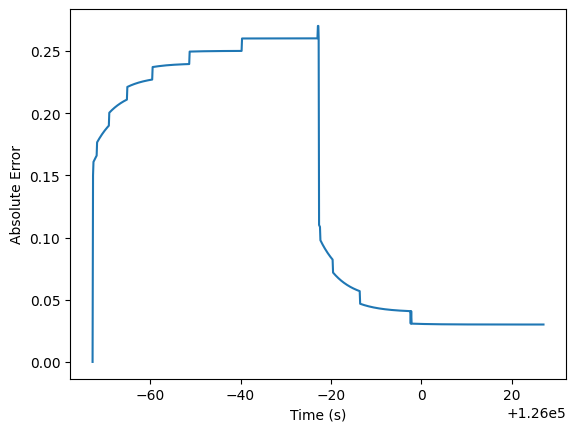

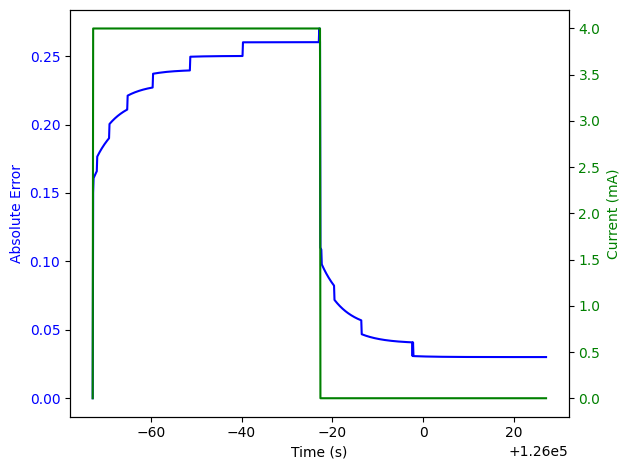

Parameters (First Order ECN): 0.020000000000000108 0.008000000000000007 511.1875000002324


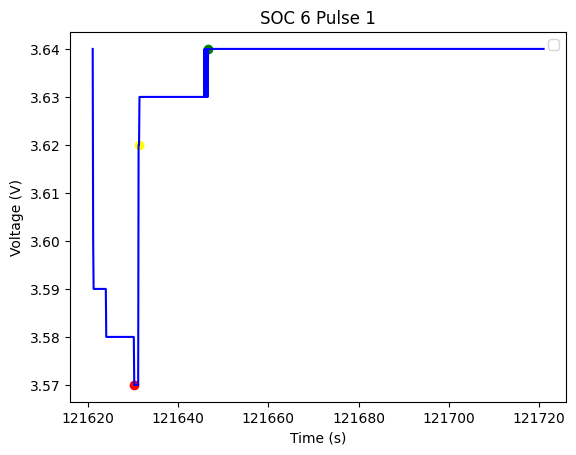

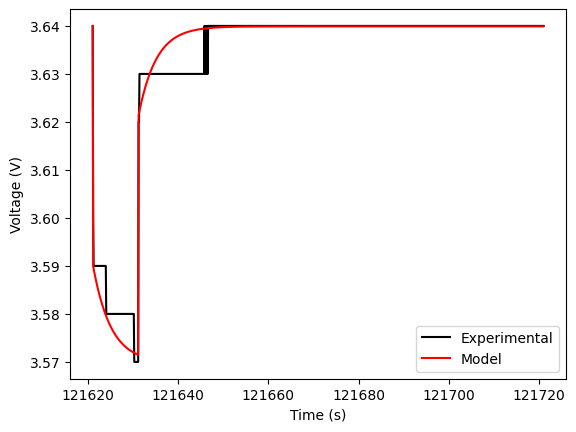

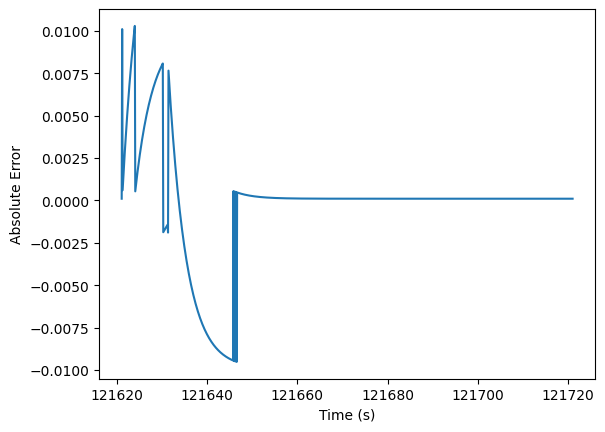

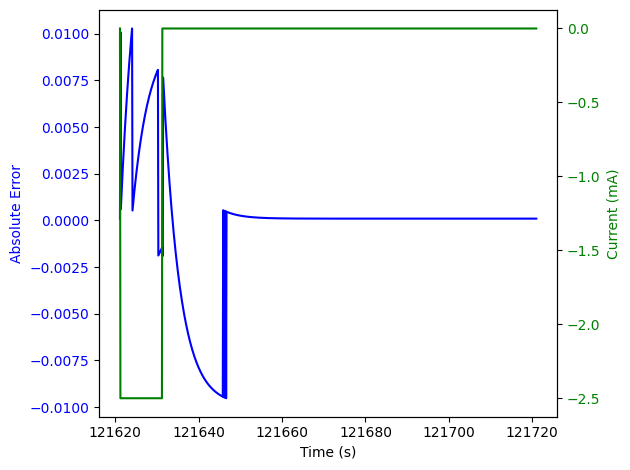

Parameters (First Order ECN): 0.016000000000000014 0.008000000000000184 423.6250000003468


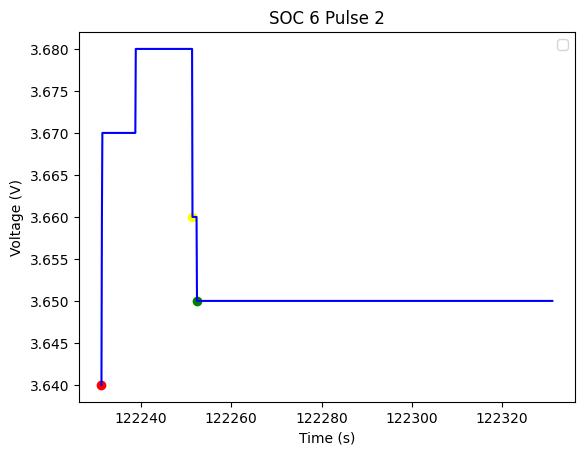

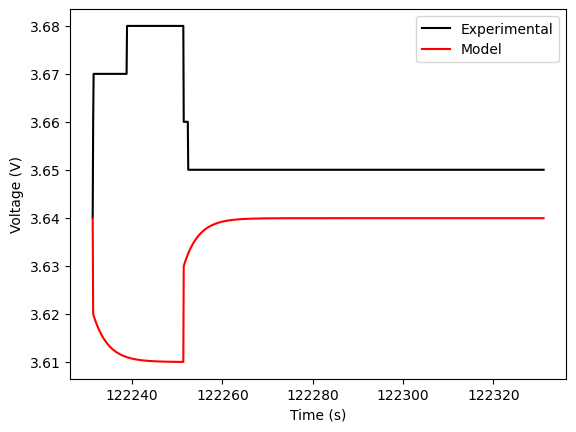

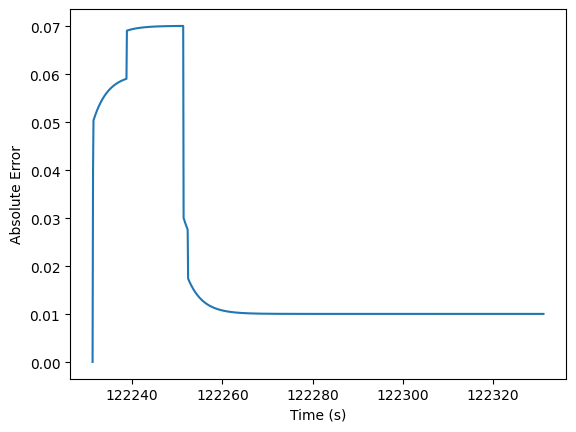

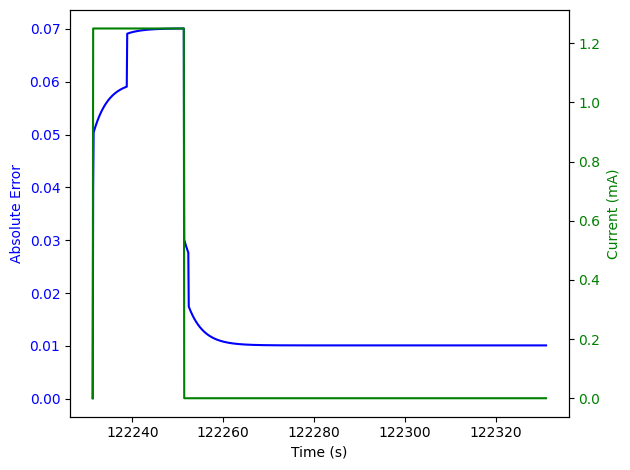

Parameters (First Order ECN): 0.020000000000000018 0.008000000000000007 1745.4999999999911


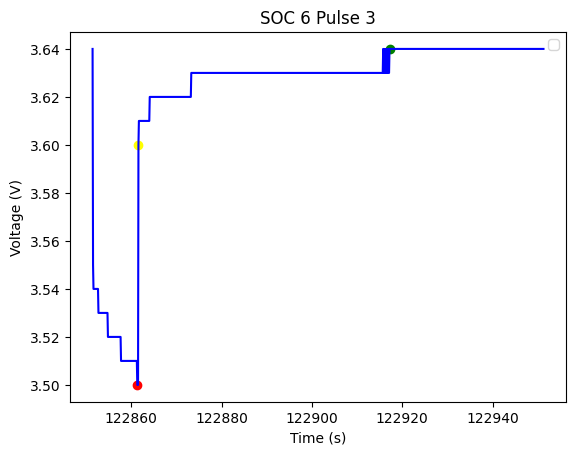

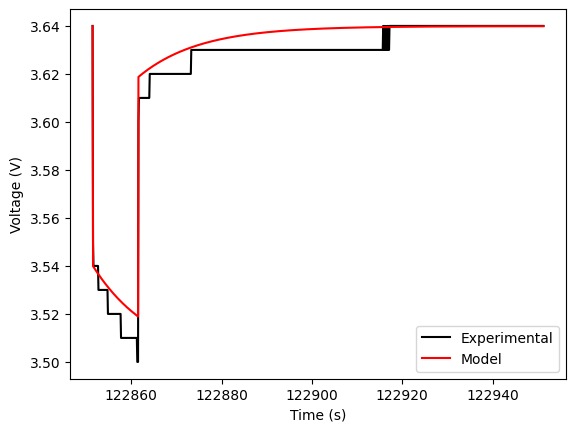

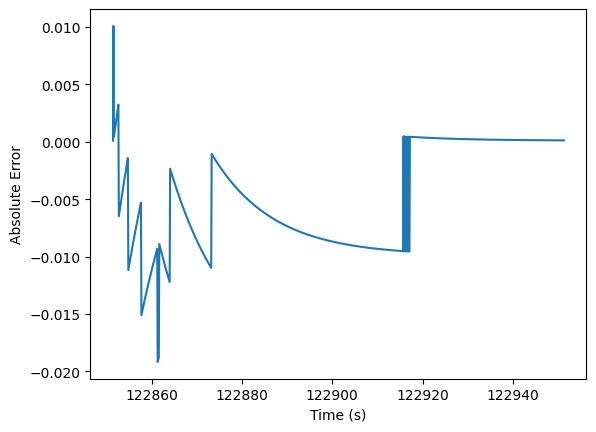

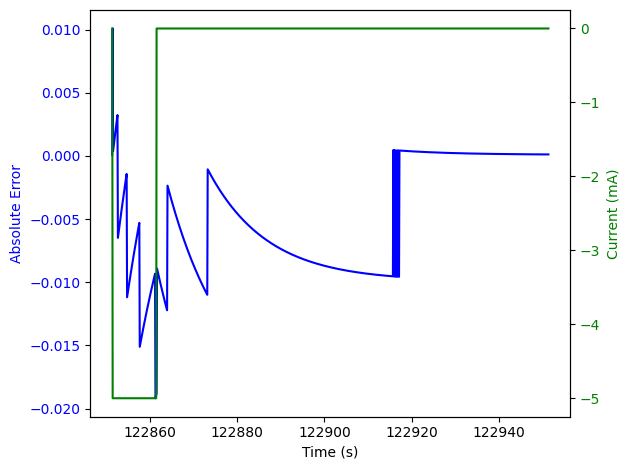

Parameters (First Order ECN): 0.020000000000000108 0.008000000000000007 564.3124999996867


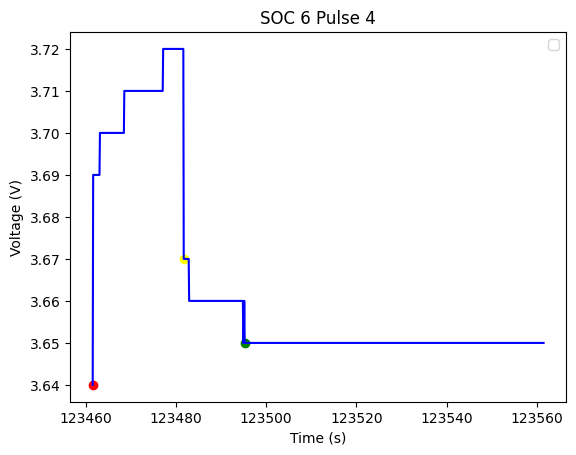

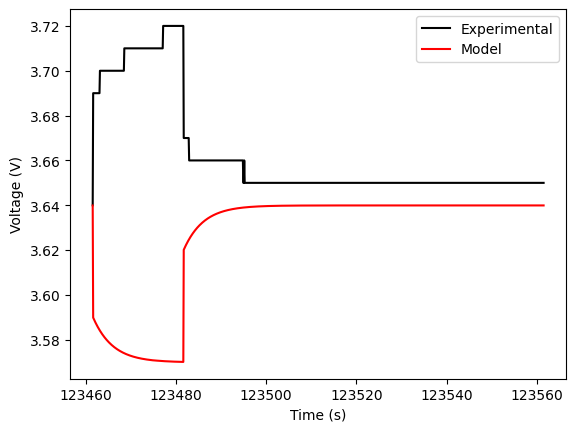

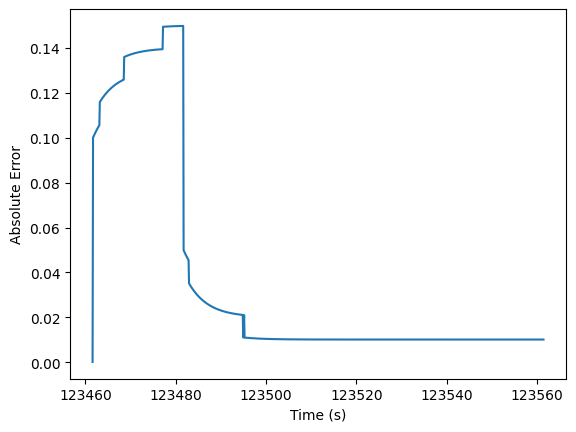

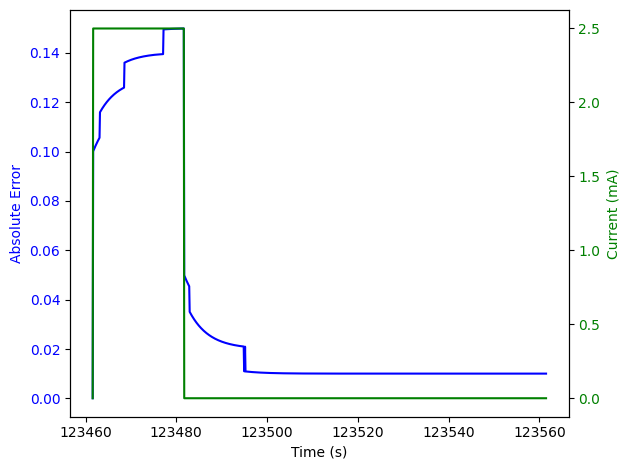

Parameters (First Order ECN): 0.019999999999999973 0.006000000000000005 1719.1666666664469


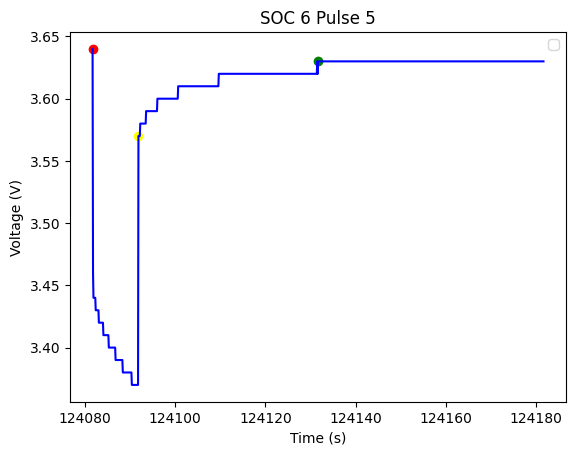

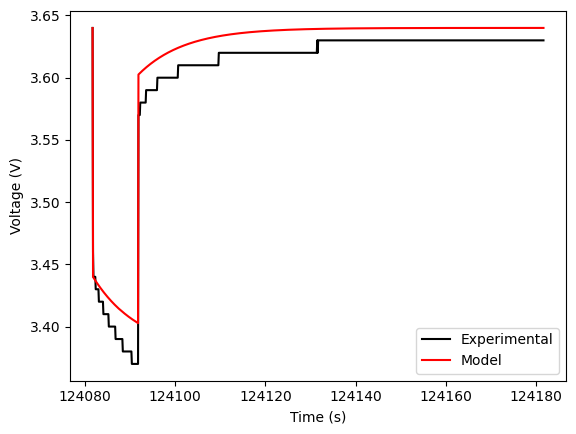

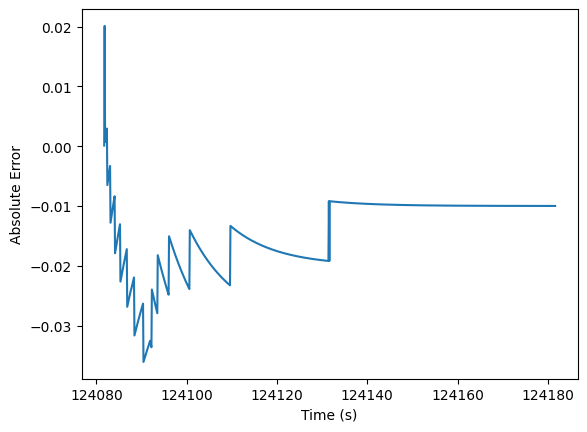

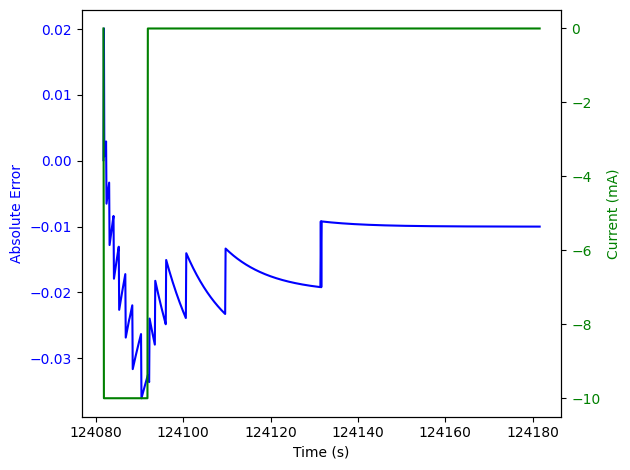

Parameters (First Order ECN): 0.020000000000000018 0.010000000000000009 774.0000000001594


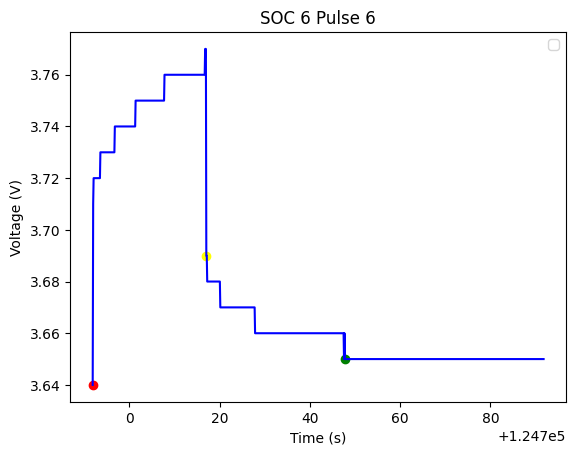

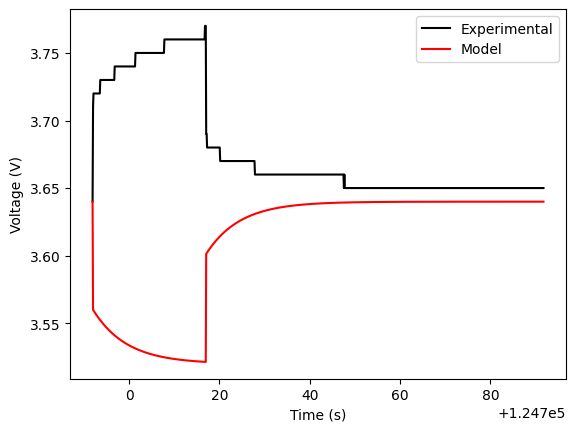

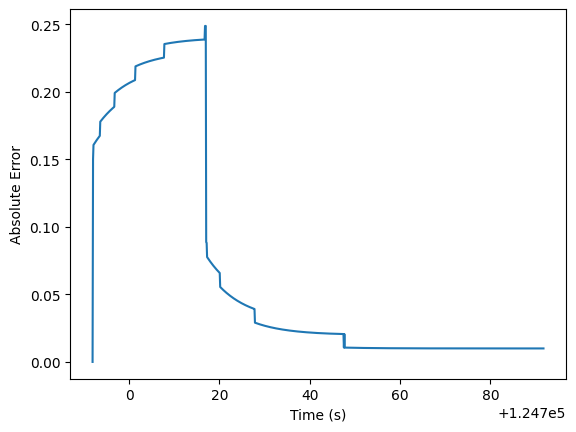

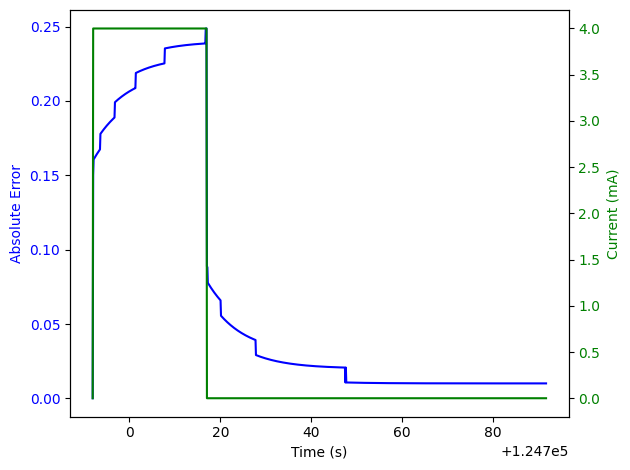

Parameters (First Order ECN): 0.019500000000000007 0.006000000000000005 2218.916666666699


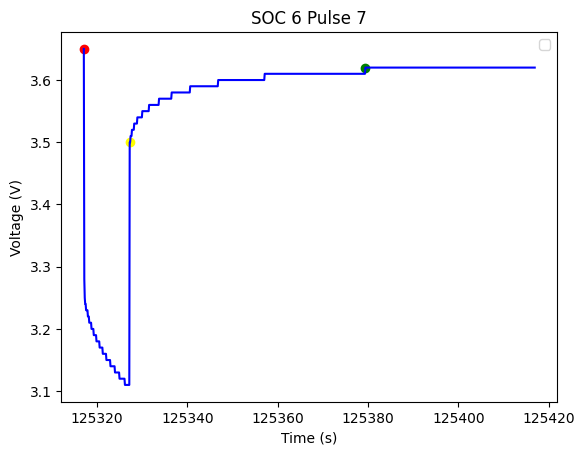

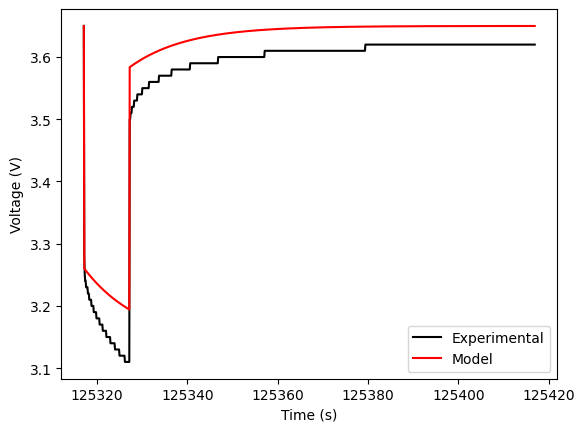

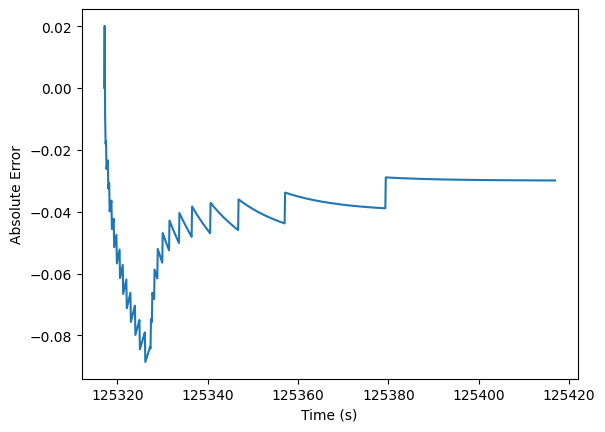

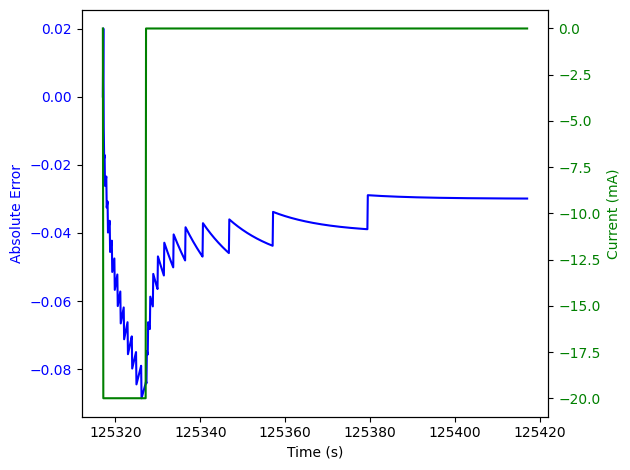

Parameters (First Order ECN): 0.020000000000000018 0.010000000000000009 1146.4500000001854


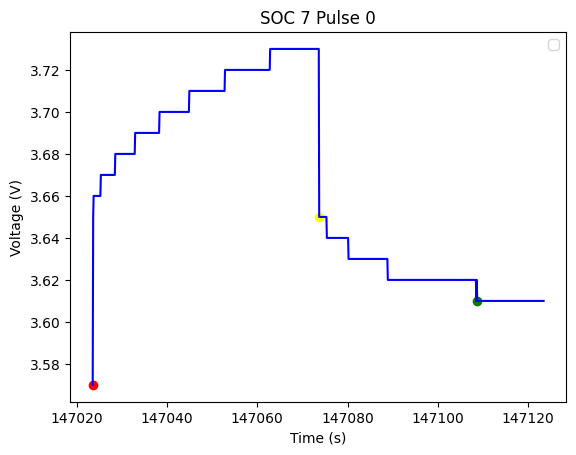

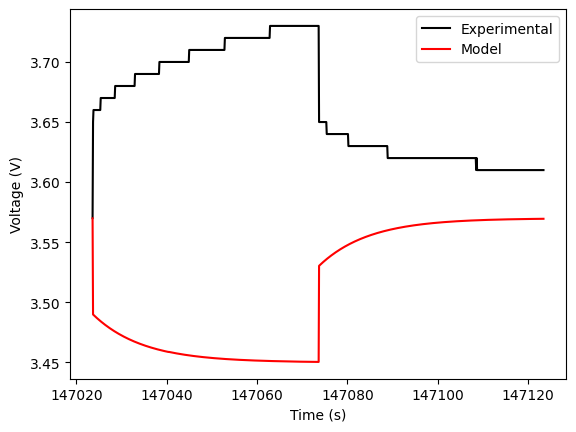

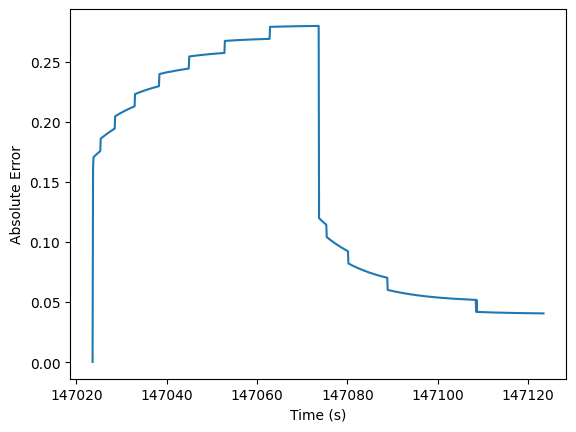

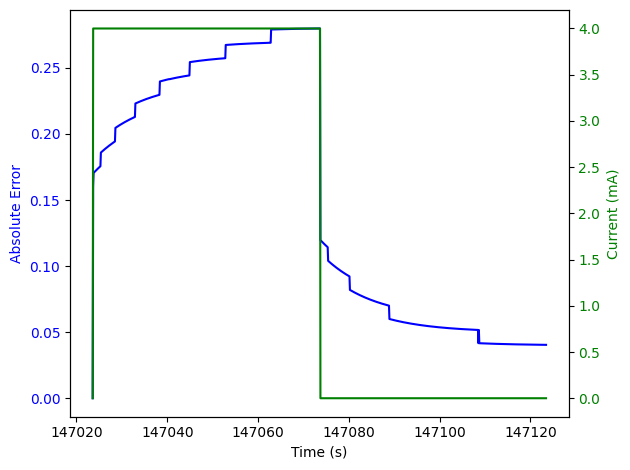

Parameters (First Order ECN): 0.019999999999999928 0.008000000000000007 414.3125000000506


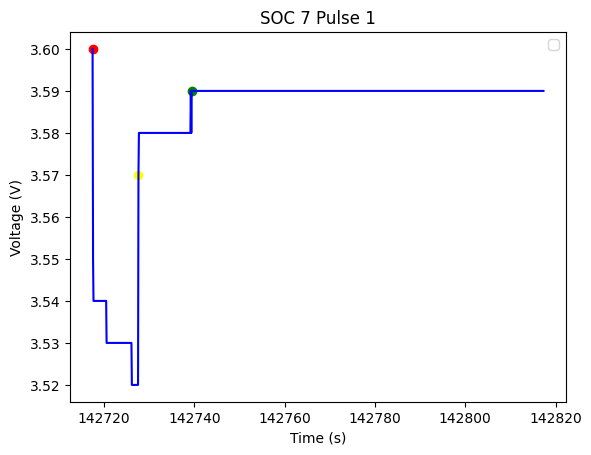

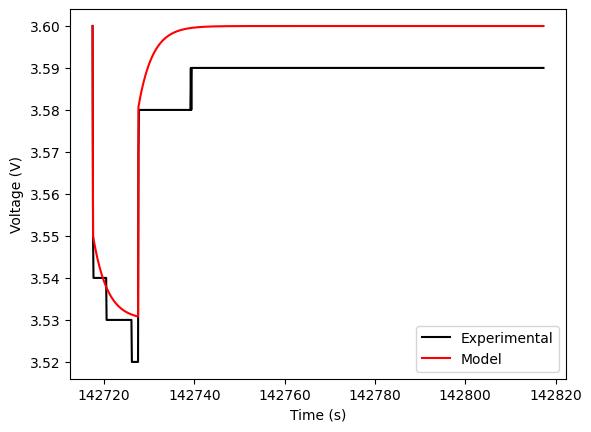

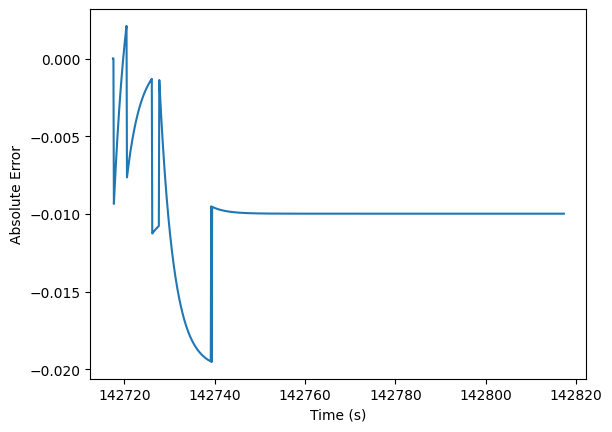

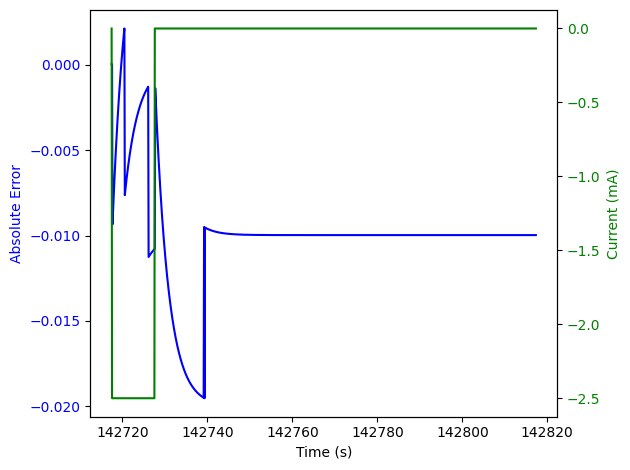

Parameters (First Order ECN): 0.016000000000000014 0.00799999999999983 533.1249999999386


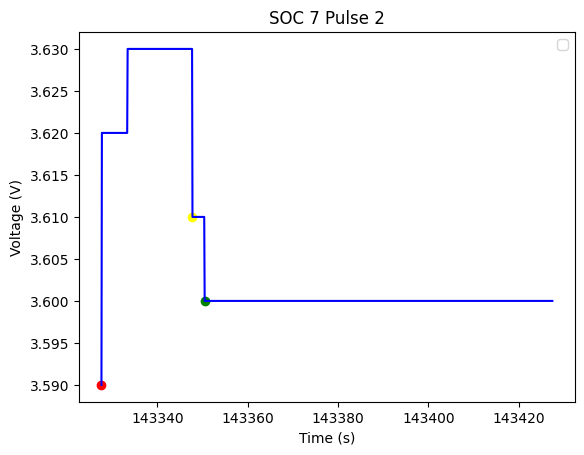

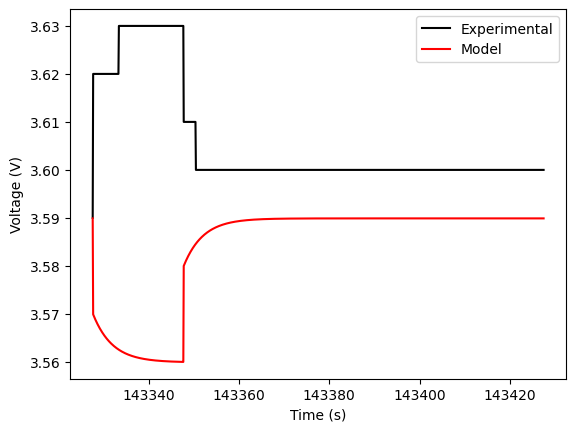

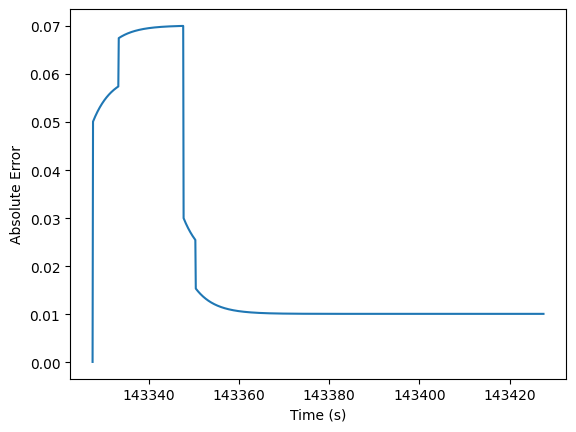

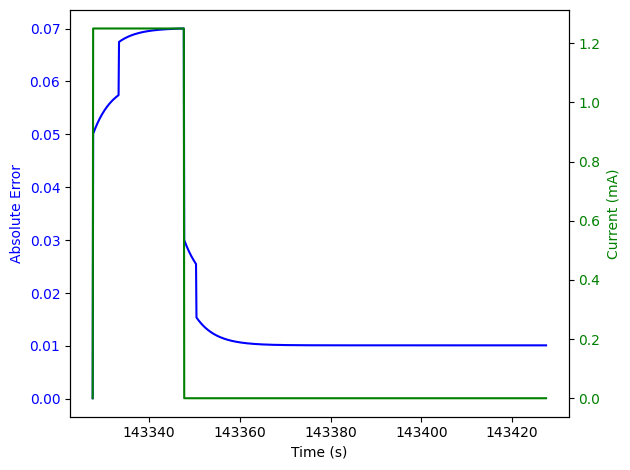

Parameters (First Order ECN): 0.019999999999999928 0.008000000000000007 1901.8125000002312


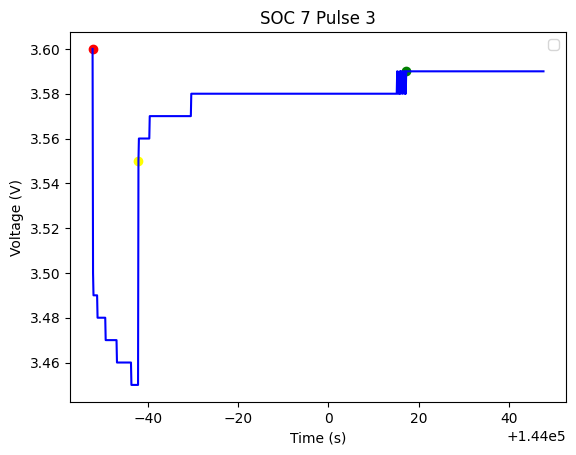

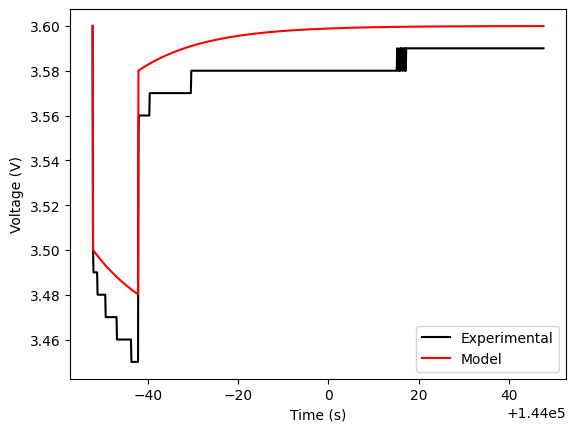

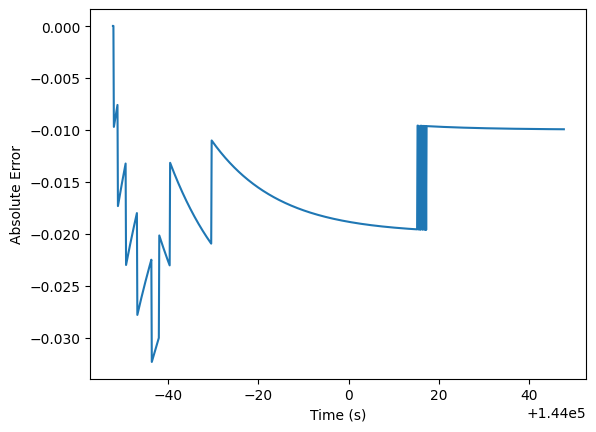

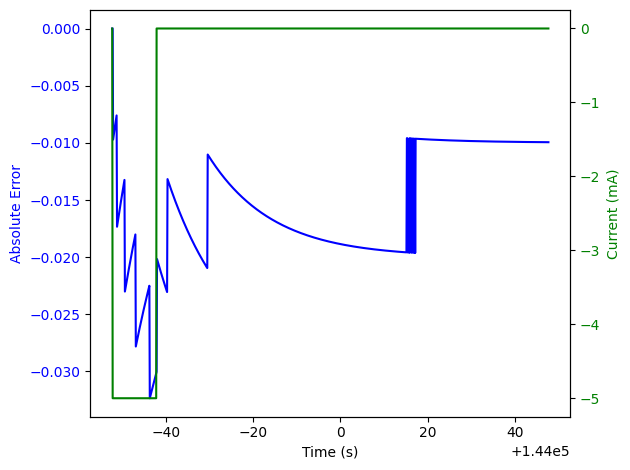

Parameters (First Order ECN): 0.019999999999999928 0.008000000000000007 807.999999999992


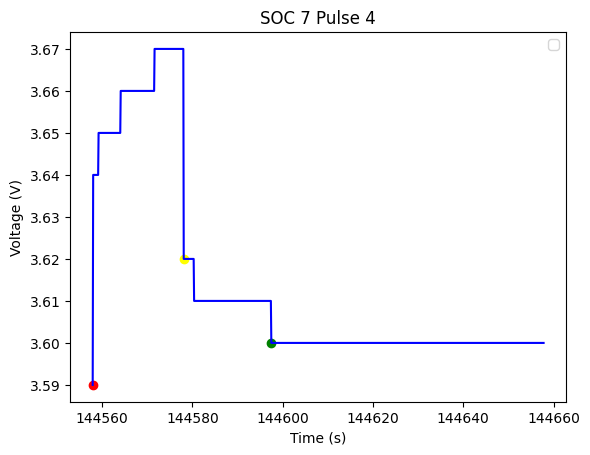

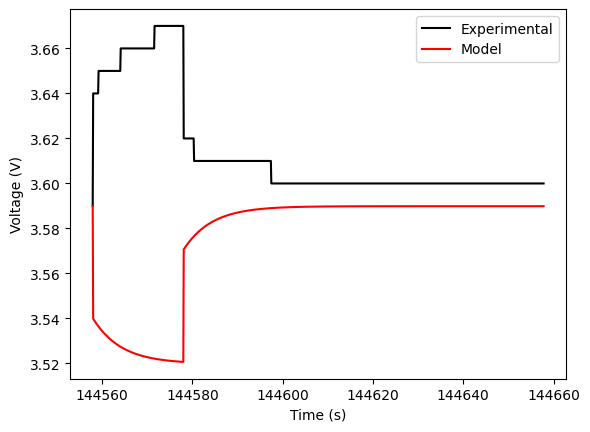

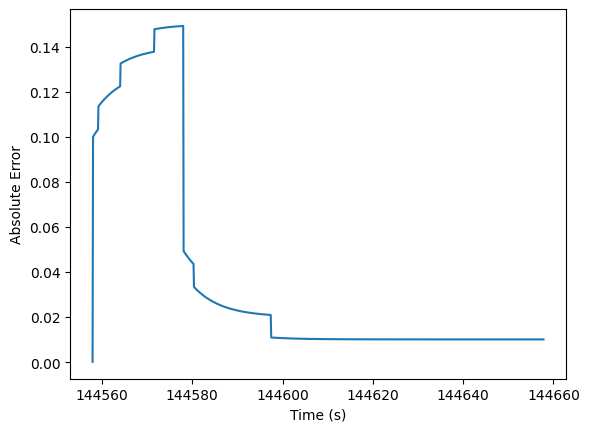

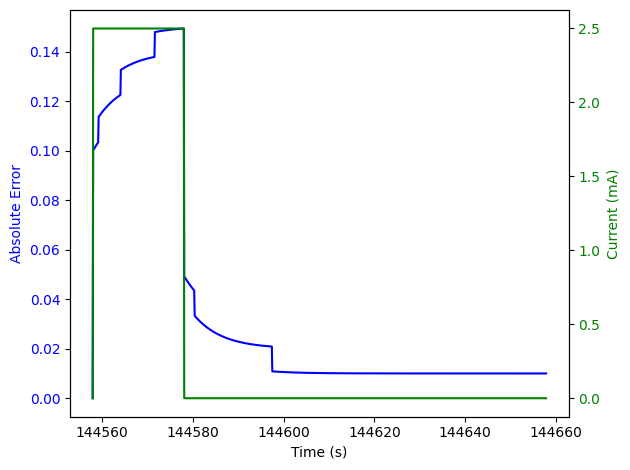

Parameters (First Order ECN): 0.020999999999999998 0.006000000000000005 2106.583333332914


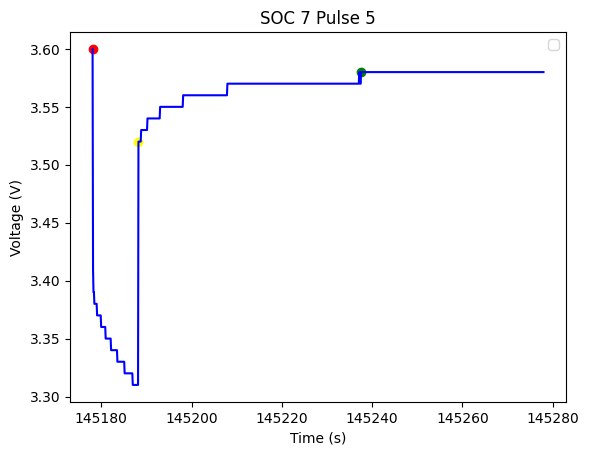

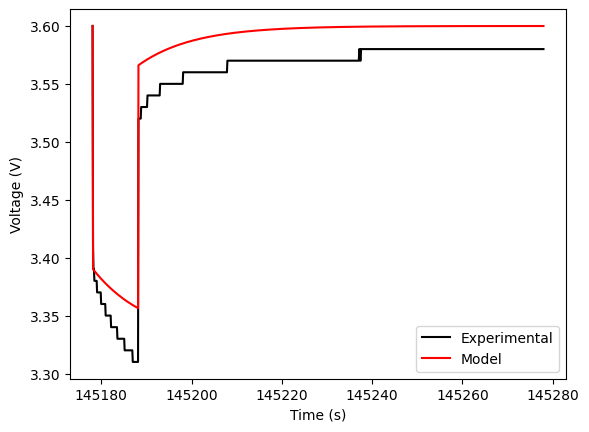

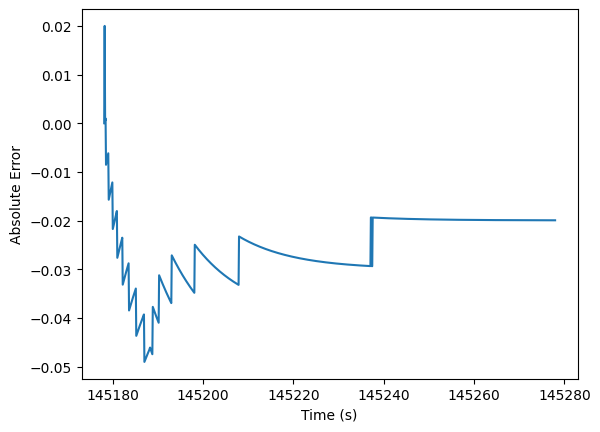

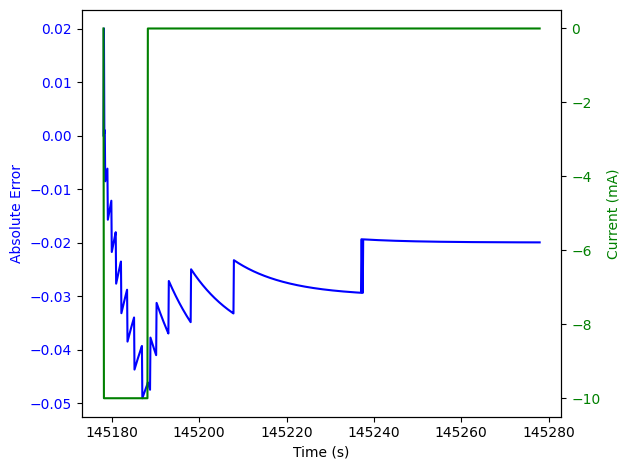

Parameters (First Order ECN): 0.020000000000000018 0.010000000000000009 1316.5000000000862


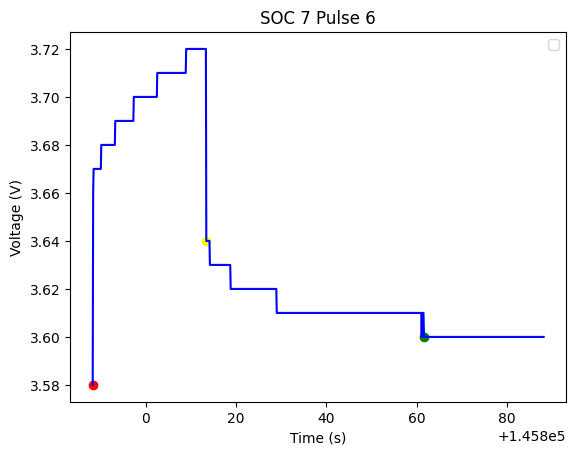

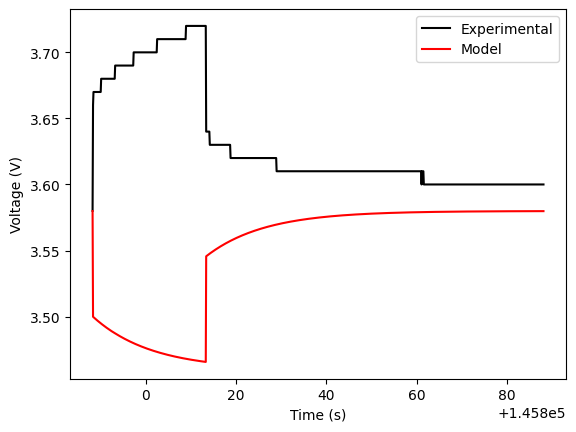

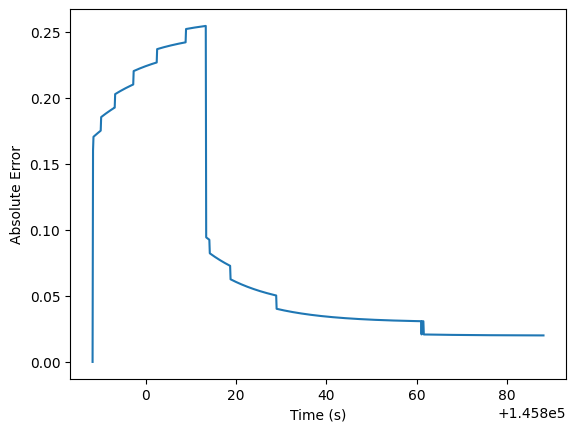

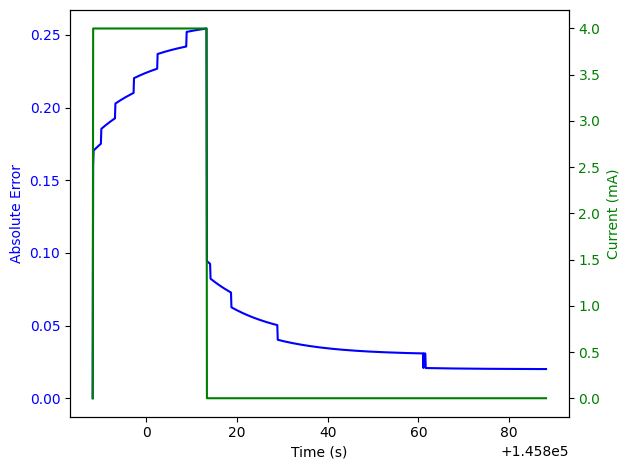

Parameters (First Order ECN): 0.020500000000000008 0.006499999999999995 2956.153846153311


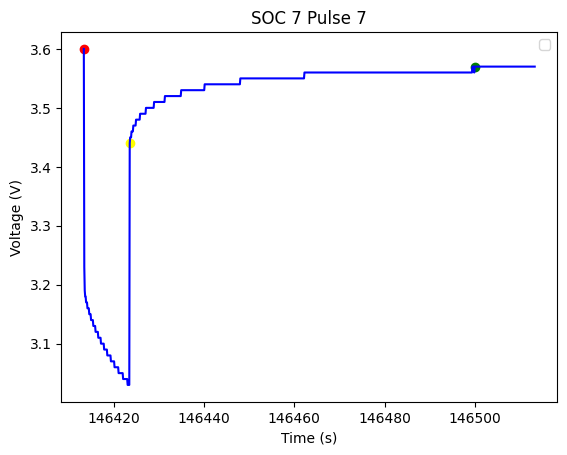

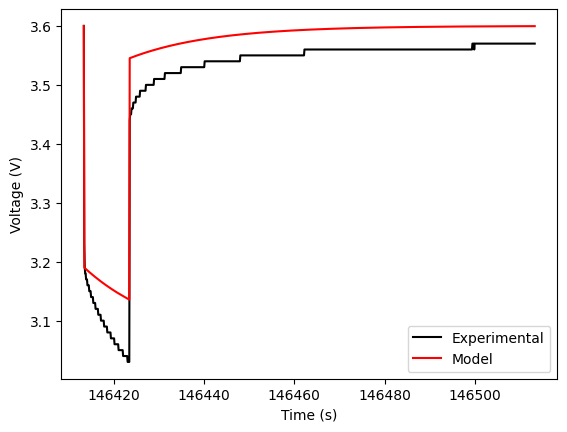

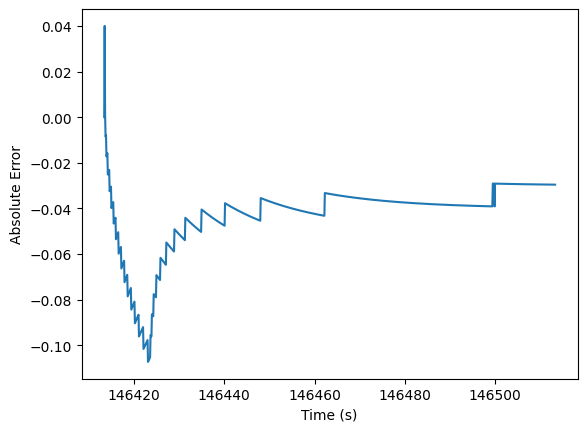

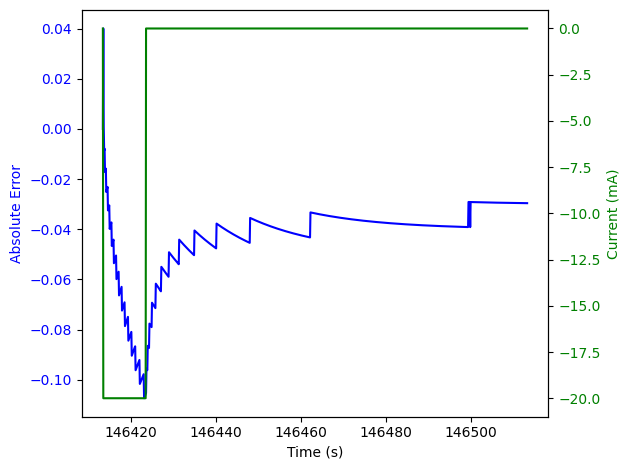

[[[0.020000000000000018, 0.010000000000000009, 966.4000000004298]], [[0.02400000000000002, 0.008000000000000007, 1398.75000000029]], [[0.016000000000000014, 0.01599999999999966, 882.1875000003462]], [[0.022000000000000065, 0.00599999999999996, 914.9999999996666]], [[0.019999999999999928, 0.008000000000000007, 608.1874999999849]], [[0.02200000000000002, 0.006999999999999985, 2034.2142857137246]], [[0.020000000000000018, 0.010000000000000009, 984.0000000003774]], [[0.022499999999999985, 0.0075000000000000205, 1988.7333333337003]], [[0.020000000000000018, 0.012499999999999956, 1067.1600000000074]], [[0.023999999999999844, 0.008000000000000184, 826.8750000000106]], [[0.016000000000000368, 0.01599999999999966, 832.1562499999862]], [[0.019999999999999928, 0.010000000000000144, 1511.5499999999665]], [[0.020000000000000285, 0.00799999999999983, 626.8125000000415]], [[0.020000000000000018, 0.007999999999999962, 1376.9374999999466]], [[0.020000000000000018, 0.010000000000000009, 803.900249999969

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares

def FirstOrderECN(t,R0,R1,C1,I,dt,OCV):
    # Initialize i_R1
    i_R1 = np.zeros(len(t))

    # Simulate i_R1 evolution
    for j in range(1, len(t)):
        i_R1[j] = np.exp(-dt/(R1*C1))*i_R1[j-1] + (1-np.exp(-dt/(R1*C1)))*I[j-1]

    #Calculate cell voltage
    modelvol = OCV-(R1*i_R1)-(R0*I)
    return modelvol

def FitFirstOrderECN(t, I, V, dt, OCV):
    # Objective function to minimize
    def objective_function(t, params, I, V, dt, OCV):
        R0, R1, C1 = params
        predvoltage = FirstOrderECN(t, R0, R1, C1, I, dt, OCV)
        residual = predvoltage - V
        return residual

    # Parameters initial guesses (R0, R1, C1)
    InitialGuess = (1, 1, 1)

    # Define the objective function with fixed dt and OCV
    obj_func = lambda params: objective_function(t, params, I, V, dt, OCV)
    result = least_squares(obj_func, InitialGuess)

    # Extract the optimized parameters
    optimized_params = result.x
    return optimized_params

# Task 1 Model Updated
def ECNModel(npulse, nSOC):

    SOCinddata = SOCind[(nSOC-1)]
    SOCinddata = SOCinddata[(npulse-1)]
    t = SOCinddata[1]
    I = SOCinddata[2]
    V = SOCinddata[3]

    # Read the CSV file with space and tab-separated values
    df_soc = pd.read_csv('SOC_OCV_MFCTT_2019.csv', delimiter='\t')

    # Extract SOC and OCV data
    SOC_raw = df_soc['SOC\tEcell/V'].str.split('\t', expand=True)[0].astype(float).values
    OCV_raw = df_soc['SOC\tEcell/V'].str.split('\t', expand=True)[1].astype(float).values

    dSOC = SOC_raw[0]-SOC_raw[1] # SOC step
    dt = t[1]-t[0] # time step

    # Immediate voltage jump in current pulse application
    # Find the maximum/minimum voltage during the pulse
    V_max = max(V)
    V_min = min(V)

    # Find voltage at the moment when current switched to zero
    for i in range(1, len(I)):
        if I[i] == 0 and I[i-1] != 0:
          V_switch = V[i]
          t_switch = t[i]
          break
        else:
          # If loop doesn't find zero current, use first voltage
          V_switch = V[0]
          t_switch = t[0]

    dv0 = abs(V_max-V_switch) if abs(V_max-V_switch) > abs(V_min-V_switch) else abs(V_min-V_switch)

    # Calculate current difference
    di = abs(max(I)-min(I))
    R0 = dv0 / di

    # Find index corresponding to t_switch
    idx_switch = next(i for i, t_val in enumerate(t) if t_val >= t_switch)

    # Find the index of the first voltage value after the current is switched off
    idx_steady_state = None
    steady_state_duration_threshold = 50
    for i in range(idx_switch, len(V)-1):
        if all(abs(V[j] - V[j+1]) < 0.001 for j in range(i, min(i + int(steady_state_duration_threshold / dt), len(V)-1))):
        #if abs(V[i] - V[i+1]) < 0.001:
            idx_steady_state = i
            break
    if idx_steady_state is not None:
        V_steady_state = V[idx_steady_state]
    else:
        # Handle the case where steady state is not found
        V_steady_state = None

    dvinf = abs(V_steady_state-V_max) if abs(V_steady_state-V_max) > abs(V_steady_state-V_min) else abs(V_steady_state-V_min)
    R1 = (dvinf / di) - R0

    # Time to settle after pulse application
    Vmax = V[V==V_max]
    tmax = t[V==Vmax[0]]
    Vmin = V[V==V_min]
    tmin = t[V==Vmin[0]]
    dt_steady_state = t[idx_steady_state]-tmax[0] if abs(V_steady_state-V_max) > abs(V_steady_state-V_min) else t[idx_steady_state]-tmin[0]
    C1 = dt_steady_state / (4 * R1)

    Parameters = [R0,R1,C1]

    plt.figure()
    plt.plot(t, V, color='blue')
    plt.scatter(t_switch, V_switch, color='yellow')
    if len(V[V==V_max])<len(V[V==V_min]):
      plt.scatter(tmax[0], V_max, color='red')
    else:
      plt.scatter(tmin[0], V_min, color='red')
    plt.scatter(t[idx_steady_state], V_steady_state, color='green')
    plt.title(f'SOC {nSOC} Pulse {npulse}')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.legend()

    print("Parameters (First Order ECN):", R0, R1, C1)

    Qn = 2500 # nominal capacity in mAh

    SOC = np.zeros(np.shape(t)) # SOC at each time step in discharge

    # calculating initial SOC - will match OCV due to long hold
    found = 0
    i = 0
    while not found:
        if V[0] > OCV_raw[i]:
            if abs(V[0] - OCV_raw[i]) < abs(V[0] - OCV_raw[i-1]):
                SOC[0] = SOC_raw[i]
            else:
                SOC[0] = SOC_raw[i-1]
            found = 1
        else:
            i += 1

    for j in range(1,len(t)):
        SOC[j] = SOC[j-1] - 100*(I[j]*dt/3600)/Qn # SOC as percentage

    SOC_ind = ((SOC_raw[0]-SOC)/dSOC-3).astype(int) # array with index corresponding to current SOC value
    OCV = OCV_raw[SOC_ind] # OCV at each time step in discharge

    # Calculate model voltage
    V_model = FirstOrderECN(t, R0, R1, C1, I, dt, OCV) if abs(V_steady_state-V_max) > abs(V_steady_state-V_min) else FirstOrderECN(t, -R0, -R1, -C1, I, dt, OCV)

    fig, ax = plt.subplots()
    plt.plot(t,V,'k')
    plt.plot(t,V_model,'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.legend(['Experimental','Model'])
    plt.show()

    err = V-V_model # Error between experimental and model voltage
    plt.plot(t,err)
    plt.xlabel('Time (s)')
    plt.ylabel('Absolute Error')
    plt.show()

    # Overlaying current
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Absolute Error', c='b')
    ax1.plot(t,err,'b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Current (mA)', c='g')
    ax2.plot(t,I,'g')
    ax2.tick_params(axis='y', labelcolor='g')

    fig.tight_layout()
    plt.show()

    return Parameters

AllSOCParam = []
AverageParam = []
for i in range(8):
  for j in range(8):
    Parameters = ECNModel(j,i)
    AllSOCParam.append([Parameters])
print(AllSOCParam)

**Part A: *Fitting* Pulse Voltage Variables (R0, R1, C1)**

Optimized Parameters (First Order ECN): [-2.78856318e-02 -2.32867139e+01  4.00032590e+04]


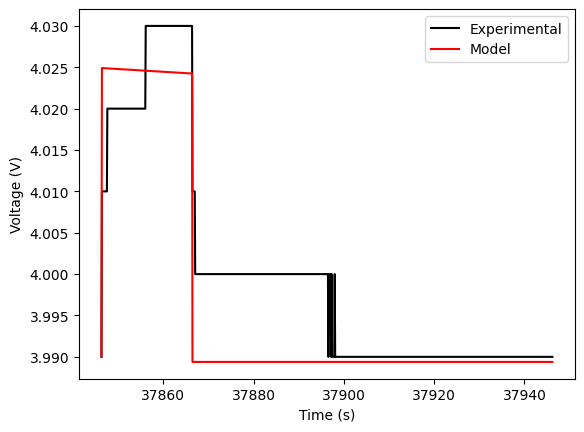

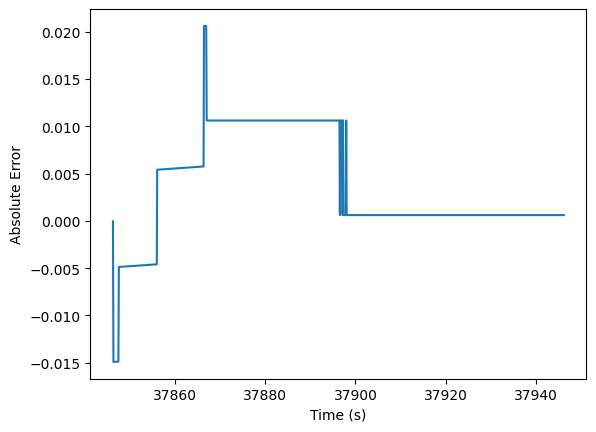

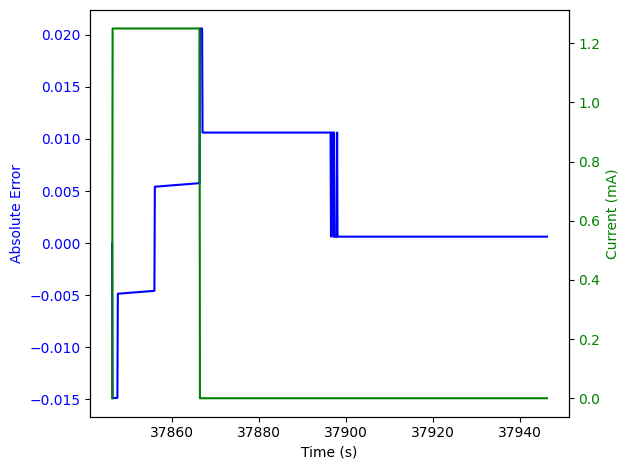

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares

def FirstOrderECN(t,R0,R1,C1,I,dt,OCV):
    # Initialize i_R1
    i_R1 = np.zeros(len(t))

    # Simulate i_R1 evolution
    for j in range(1, len(t)):
        i_R1[j] = np.exp(-dt/(R1*C1))*i_R1[j-1] + (1-np.exp(-dt/(R1*C1)))*I[j-1]

    #Calculate cell voltage
    modelvol = OCV-(R1*i_R1)-(R0*I)
    return modelvol

def FitFirstOrderECN(t, I, V, dt, OCV):
    # Objective function to minimize
    def objective_function(t, params, I, V, dt, OCV):
        R0, R1, C1 = params
        predvoltage = FirstOrderECN(t, R0, R1, C1, I, dt, OCV)
        residual = predvoltage - V
        return residual

    # Parameters initial guesses (R0, R1, C1)
    InitialGuess = (0.04, 0.005, 5000)

    # Define the objective function with fixed dt and OCV
    obj_func = lambda params: objective_function(t, params, I, V, dt, OCV)
    result = least_squares(obj_func, InitialGuess)

    # Extract the optimized parameters
    optimized_params = result.x
    return optimized_params

# Task 1 Model Updated
def Model(npulse, nSOC):
    SOCinddata1 = SOCind[(nSOC-1)]
    SOCinddata = SOCinddata1[(npulse-1)]
    t = SOCinddata[1]
    I = SOCinddata[2]
    V = SOCinddata[3]

    # Read the CSV file with space and tab-separated values
    df_soc = pd.read_csv('SOC_OCV_MFCTT_2019.csv', delimiter='\t')

    # Extract SOC and OCV data
    SOC_raw = df_soc['SOC\tEcell/V'].str.split('\t', expand=True)[0].astype(float).values
    OCV_raw = df_soc['SOC\tEcell/V'].str.split('\t', expand=True)[1].astype(float).values

    dSOC = SOC_raw[0]-SOC_raw[1] # SOC step
    dt = t[1]-t[0] # time step

    Qn = 2500 # nominal capacity in mAh

    SOC = np.zeros(np.shape(t)) # SOC at each time step in discharge

    # calculating initial SOC - will match OCV due to long hold
    found = 0
    i = 0
    while not found:
        if V[0] > OCV_raw[i]:
            if abs(V[0] - OCV_raw[i]) < abs(V[0] - OCV_raw[i-1]):
                SOC[0] = SOC_raw[i]
            else:
                SOC[0] = SOC_raw[i-1]
            found = 1
        else:
            i += 1

    for j in range(1,len(t)):
        SOC[j] = SOC[j-1] - 100*(I[j]*dt/3600)/Qn # SOC as percentage

    SOC_ind = ((SOC_raw[0]-SOC)/dSOC-3).astype(int) # array with index corresponding to current SOC value
    OCV = OCV_raw[SOC_ind] # OCV at each time step in discharge

    # Perform optimization
    optimized_params = FitFirstOrderECN(t, I, V, dt, OCV)
    print("Optimized Parameters (First Order ECN):", optimized_params)

    # In-series resistor 1
    R0 = optimized_params[0] # Resistance 1
    # Parallel resistor 2-capacitor
    R1 = optimized_params[1] # Resistance 2
    C1 = optimized_params[2] # Capacitor 2

    # Calculate model voltage
    V_model = FirstOrderECN(t, R0, R1, C1, I, dt, OCV)

    plt.plot(t,V,'k')
    plt.plot(t,V_model,'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.legend(['Experimental','Model'])
    plt.show()

    err = V-V_model # Error between experimental and model voltage
    plt.plot(t,err)
    plt.xlabel('Time (s)')
    plt.ylabel('Absolute Error')
    plt.show()

    # Overlaying current
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Absolute Error', c='b')
    ax1.plot(t,err,'b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Current (mA)', c='g')
    ax2.plot(t,I,'g')
    ax2.tick_params(axis='y', labelcolor='g')

    fig.tight_layout()
    plt.show()

Model(2,2)